/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:155: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


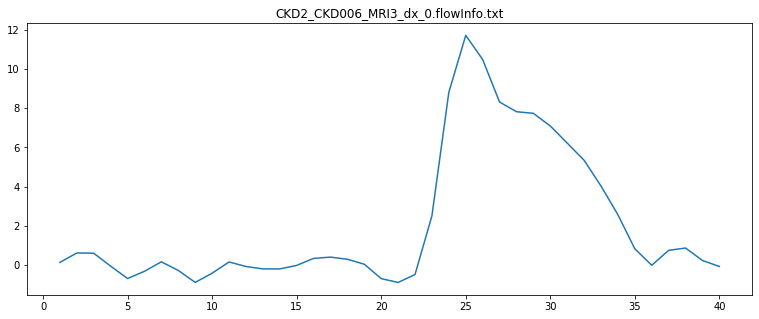

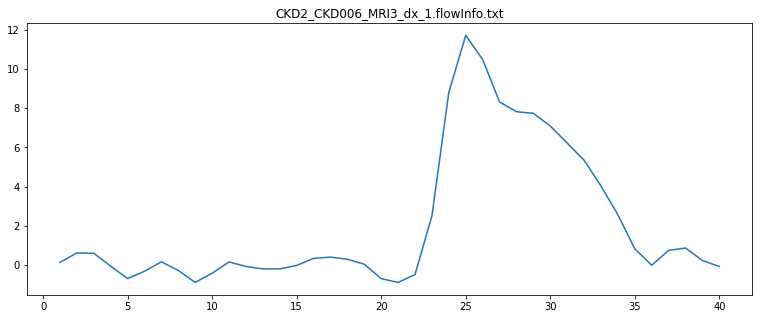

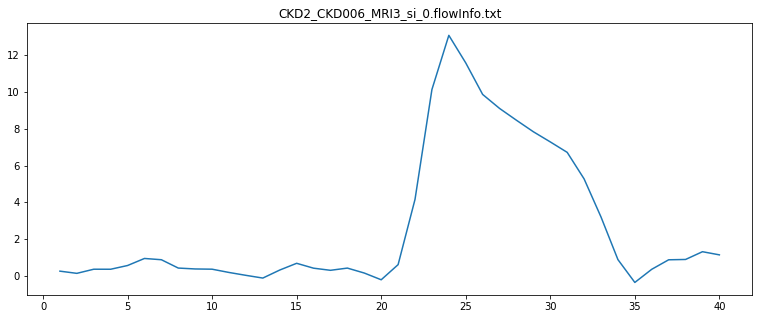

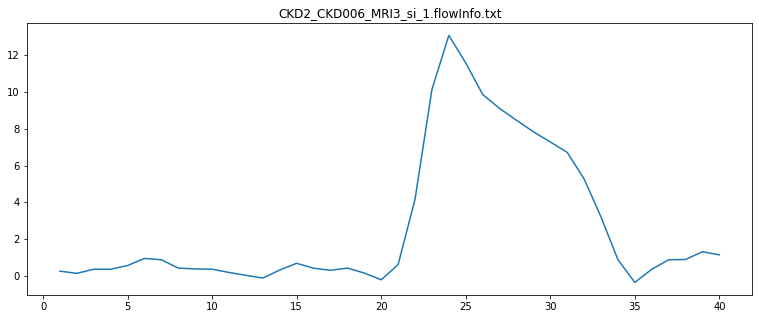

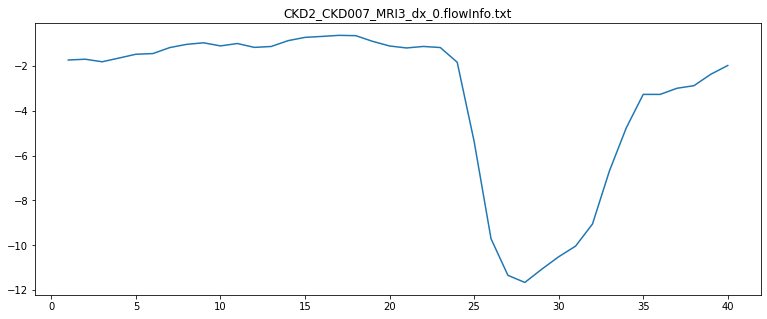

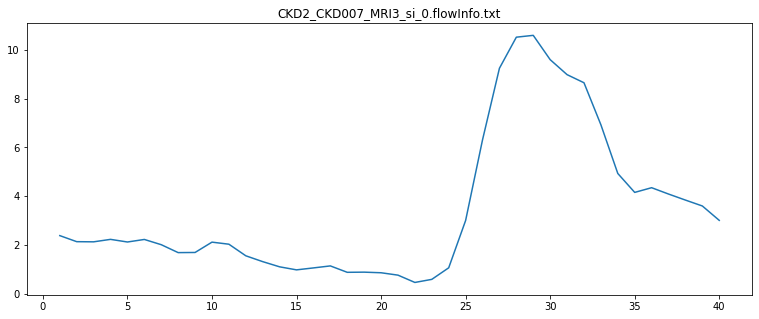

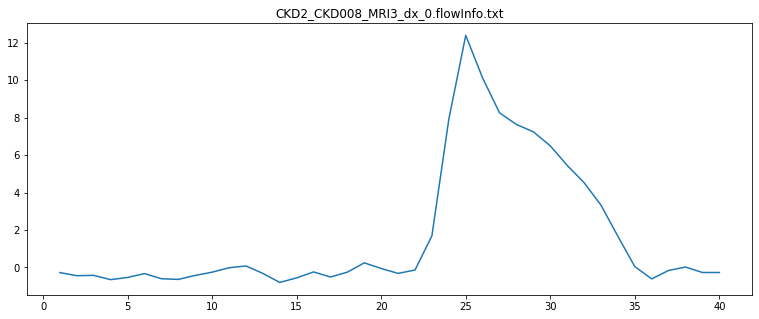

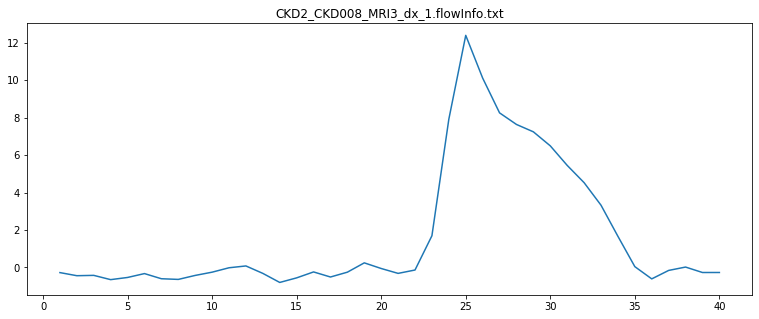

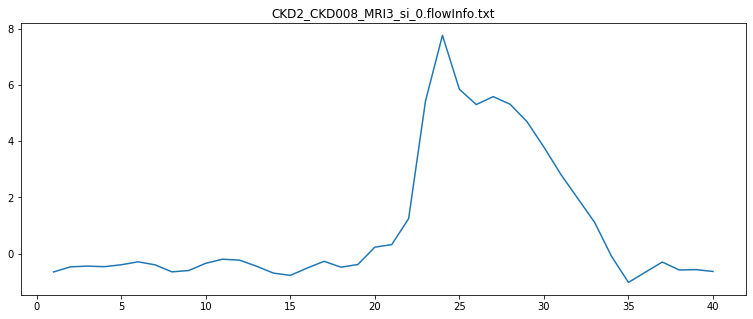

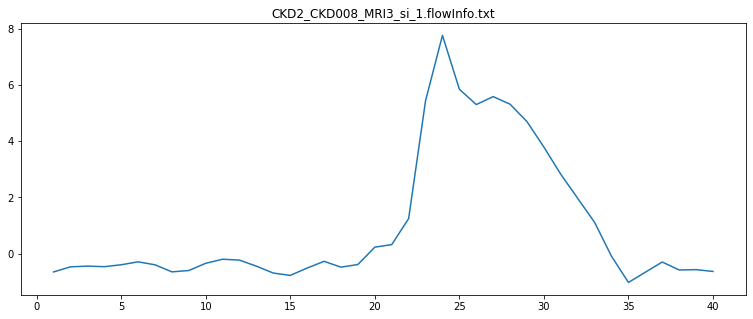

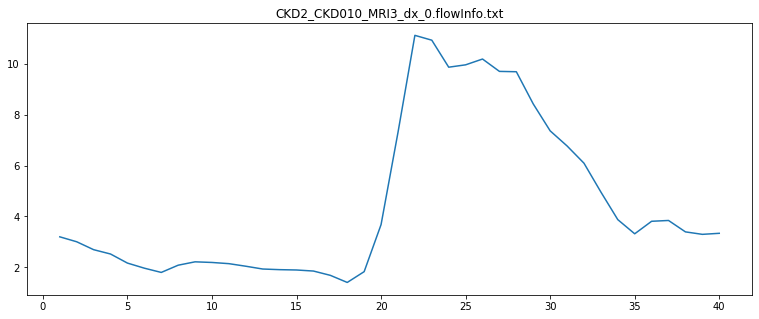

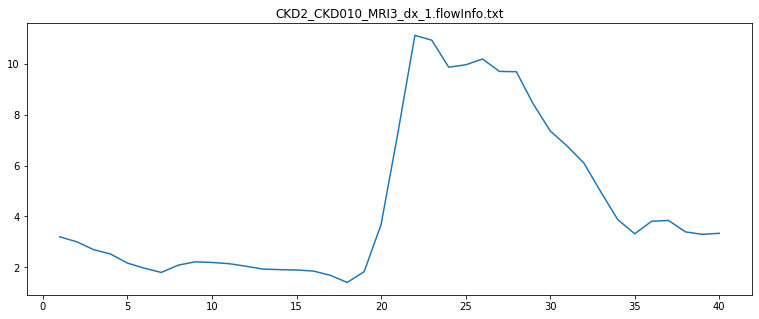

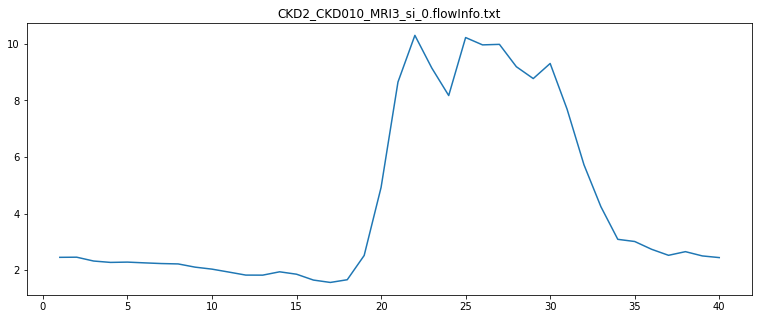

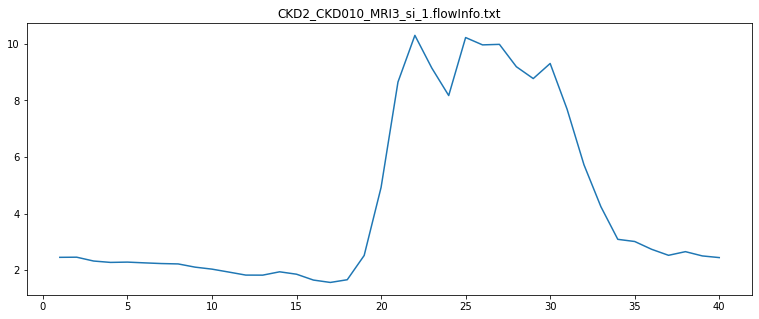

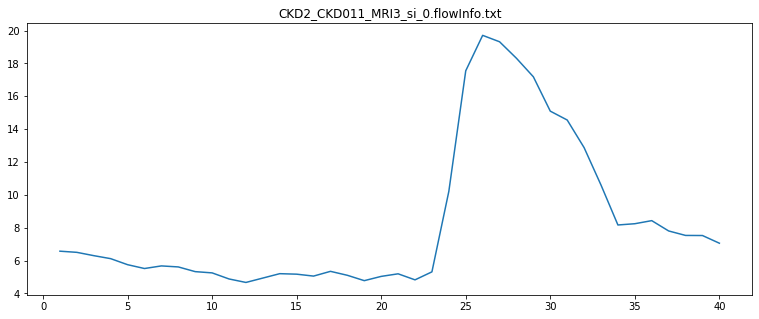

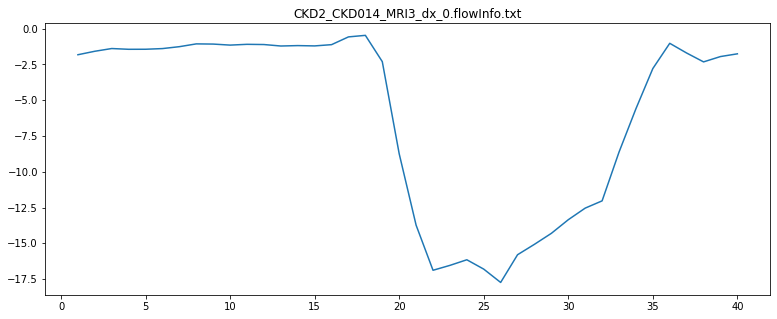

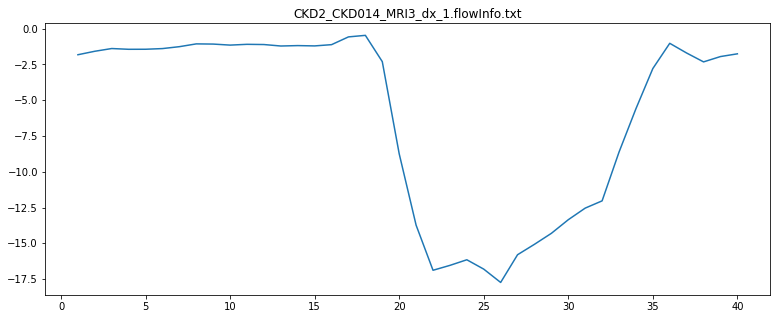

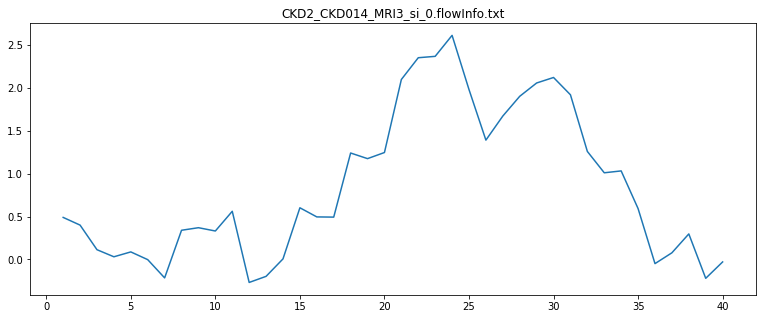

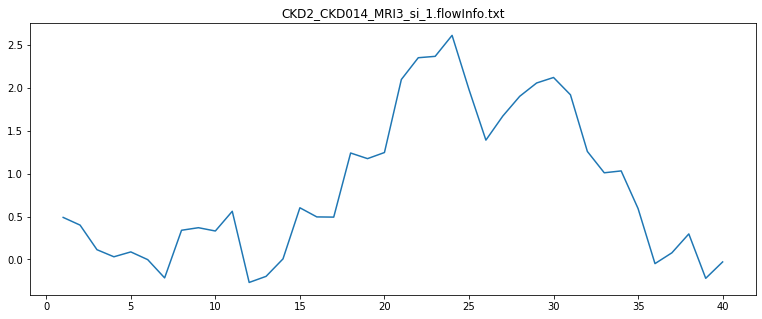

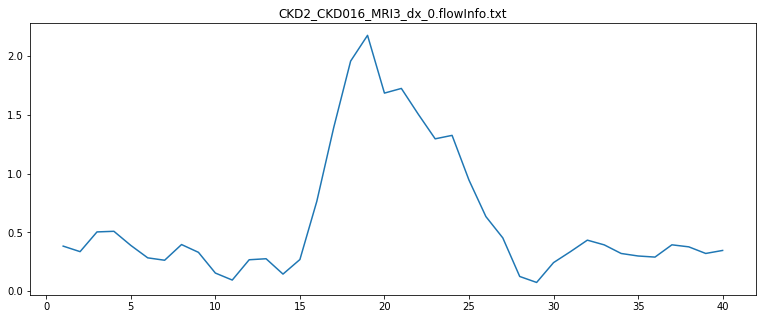

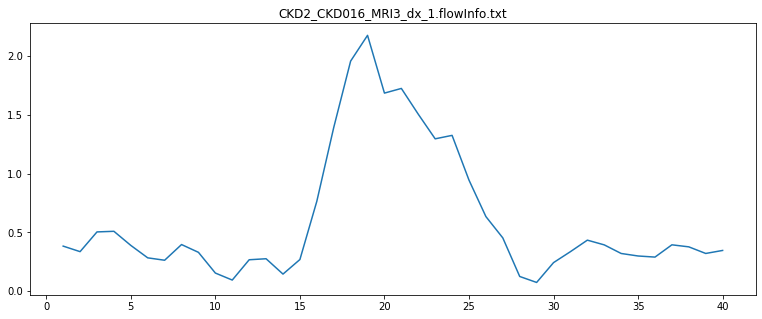

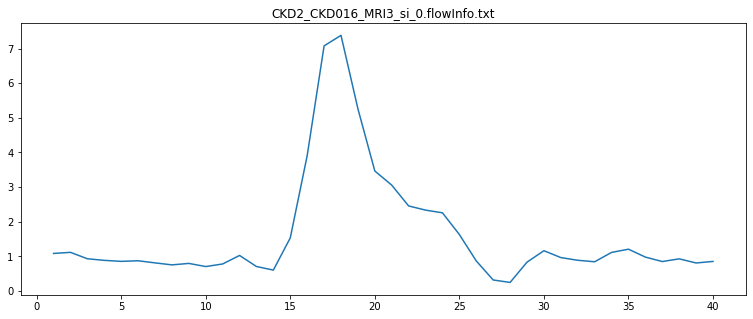

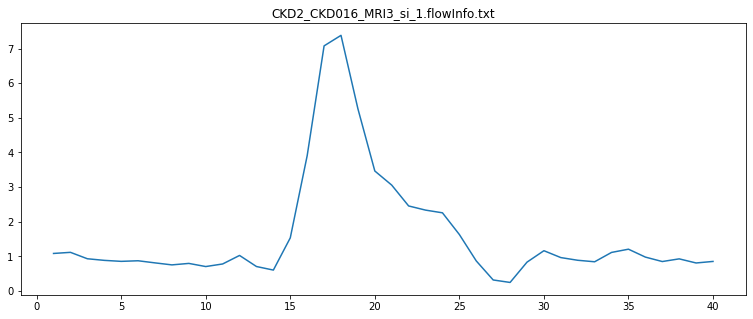

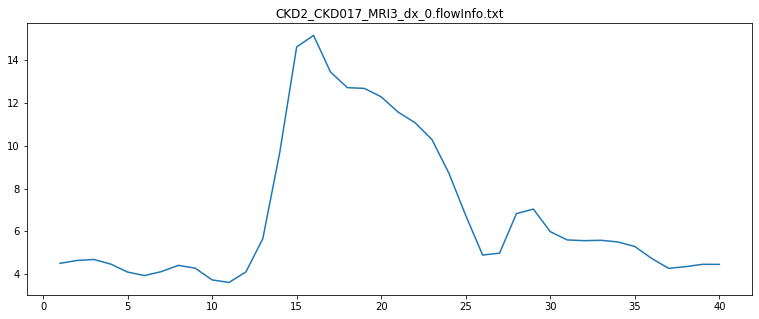

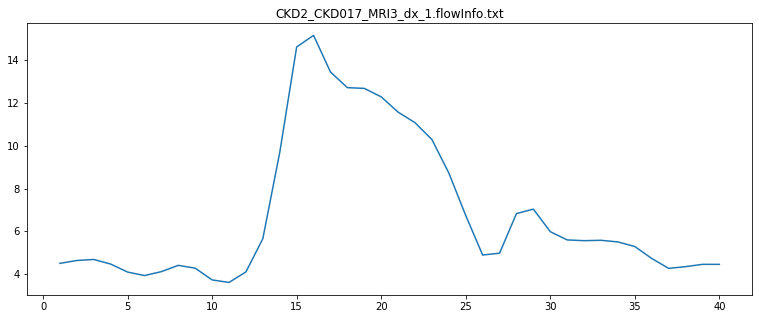

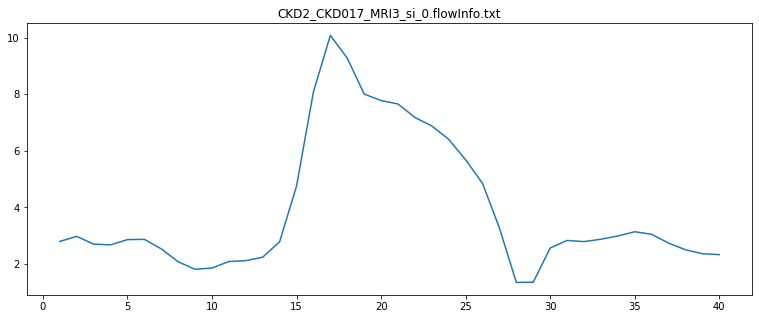

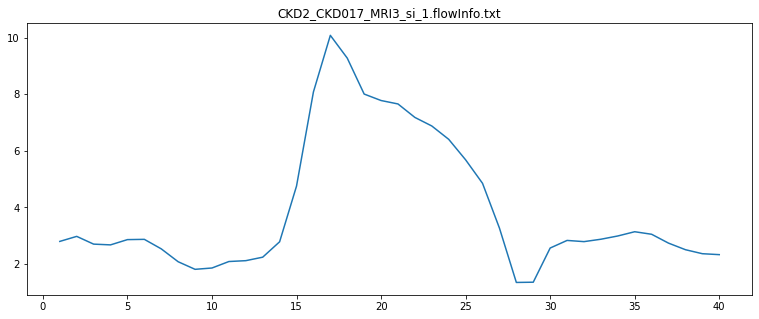

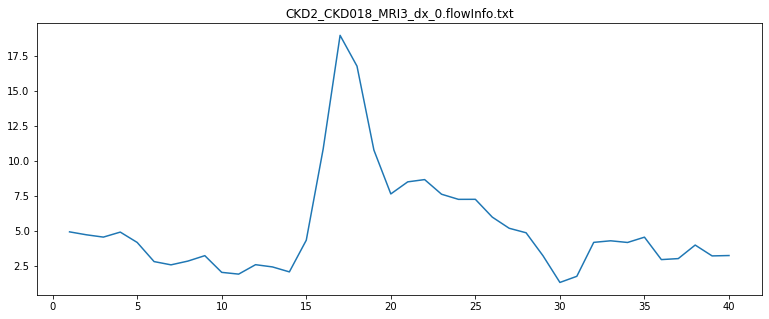

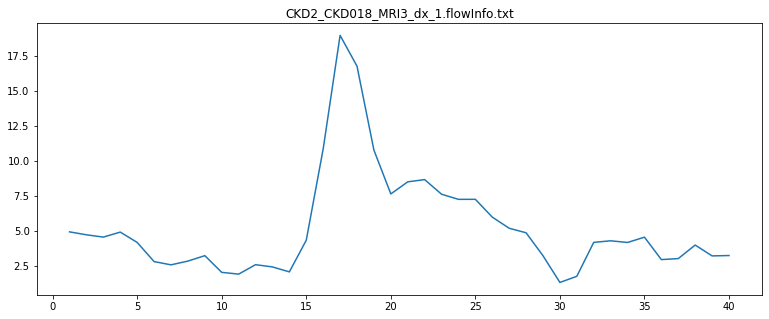

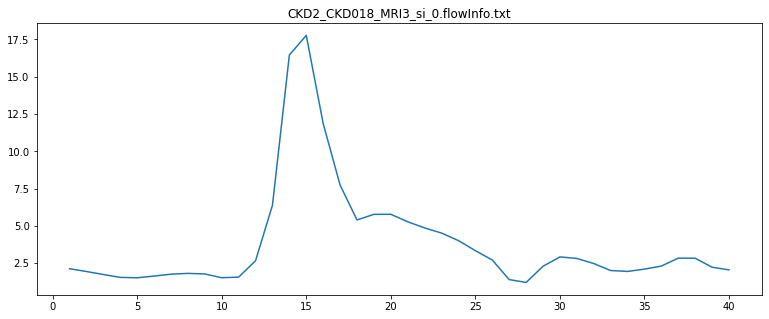

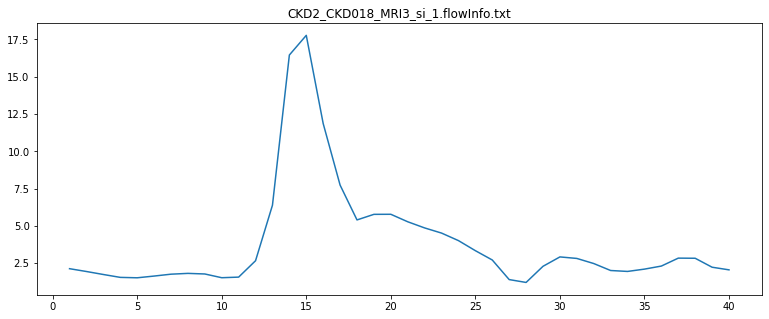

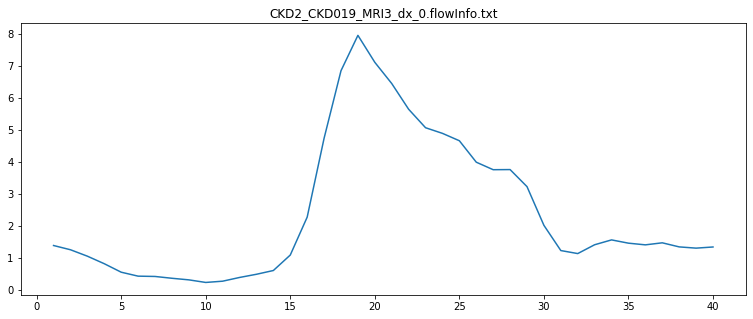

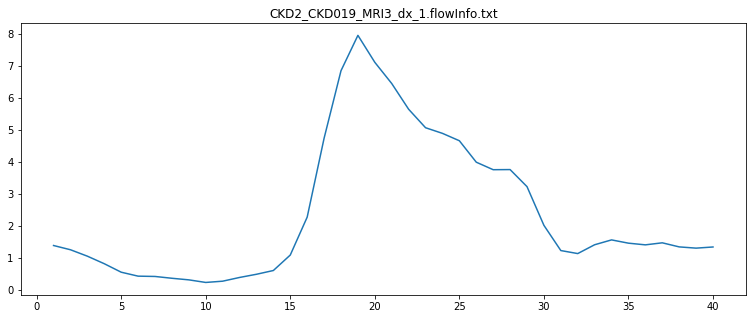

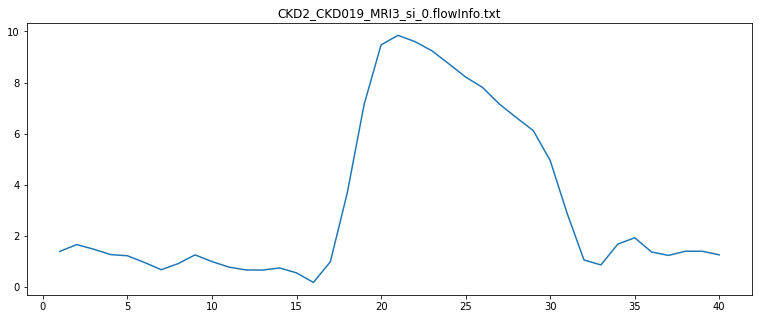

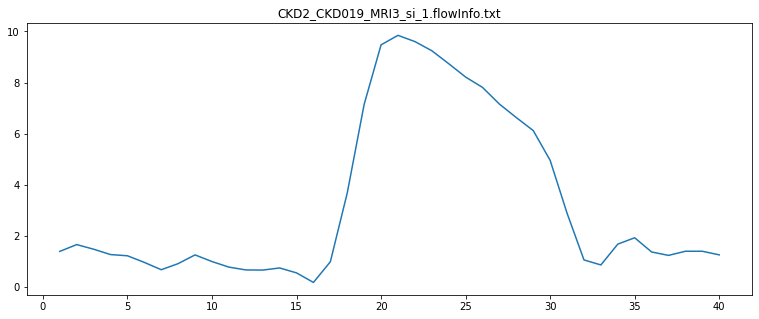

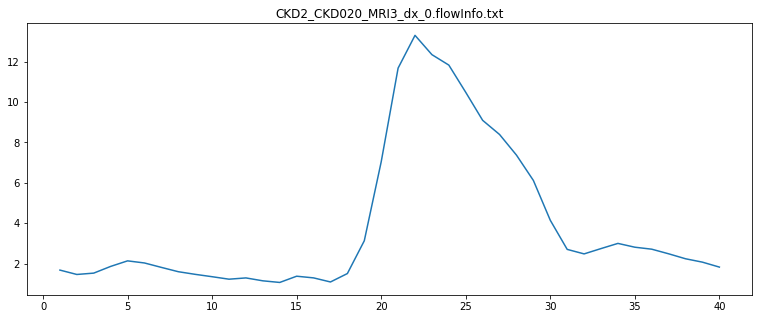

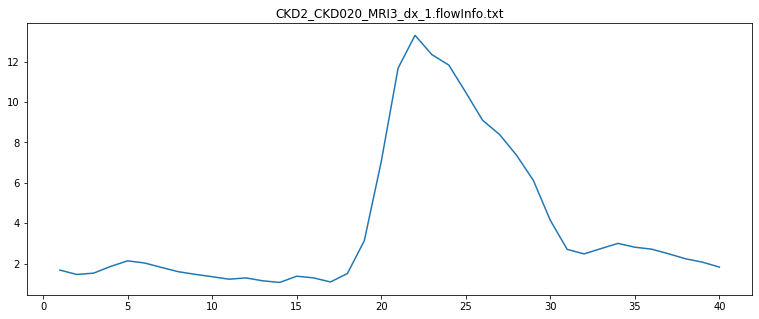

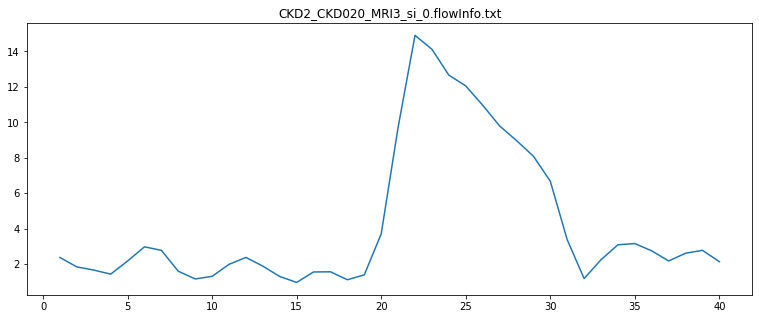

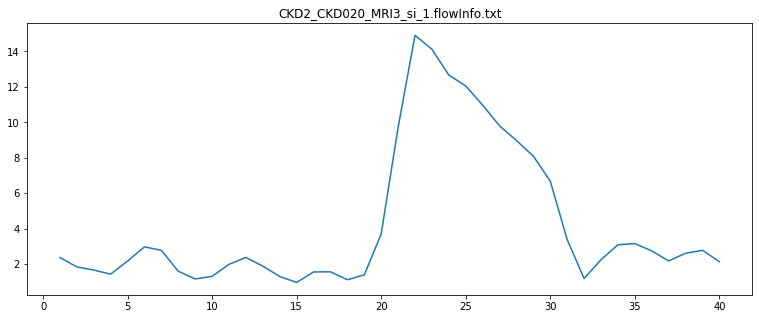

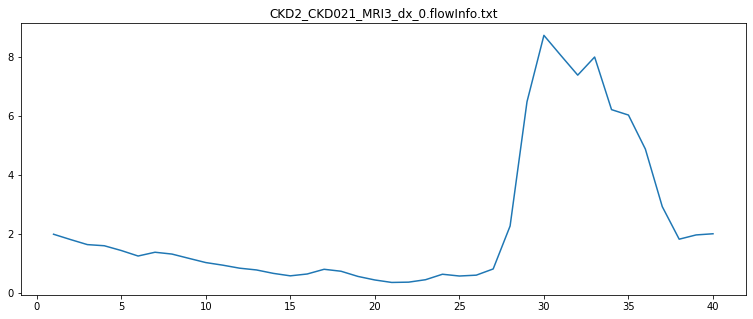

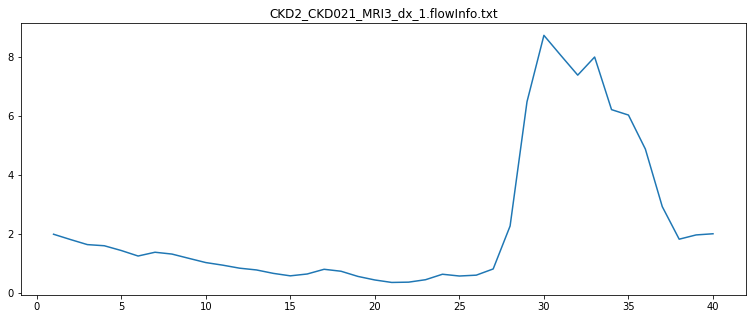

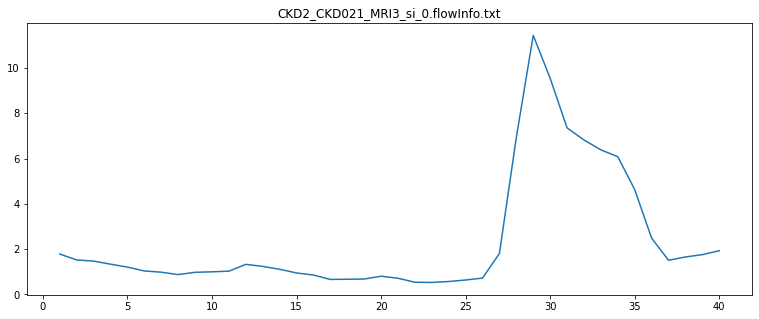

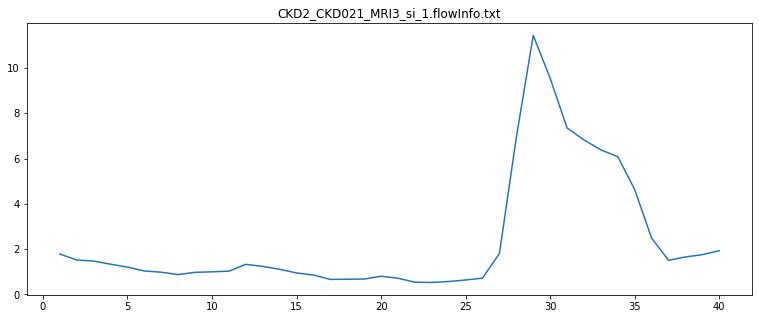

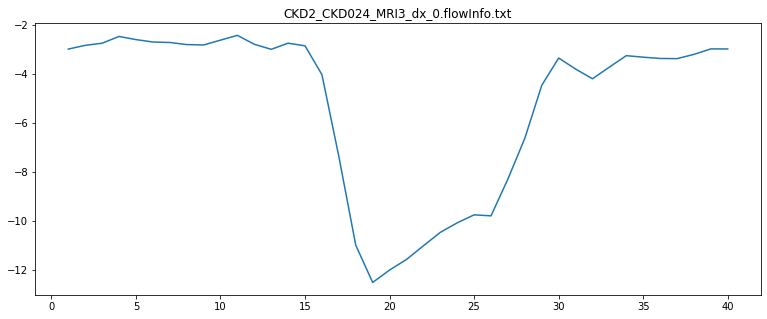

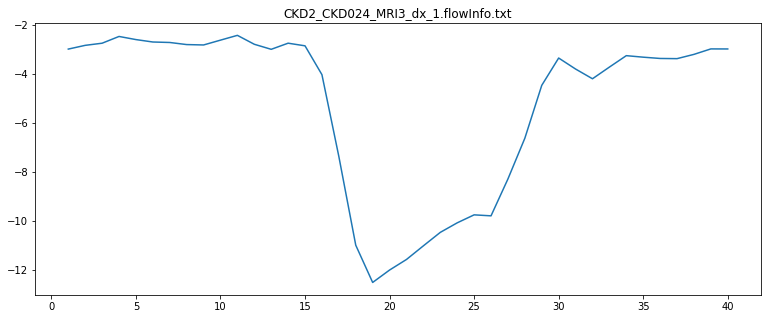

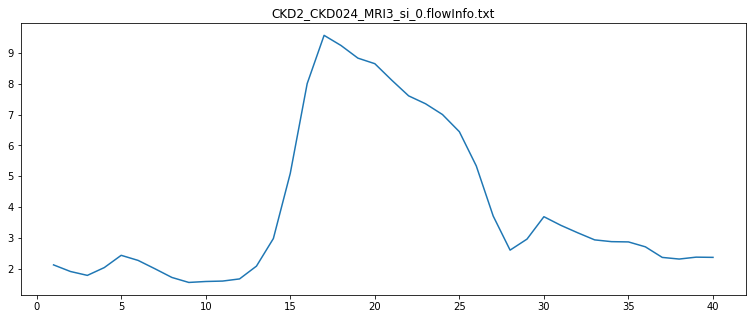

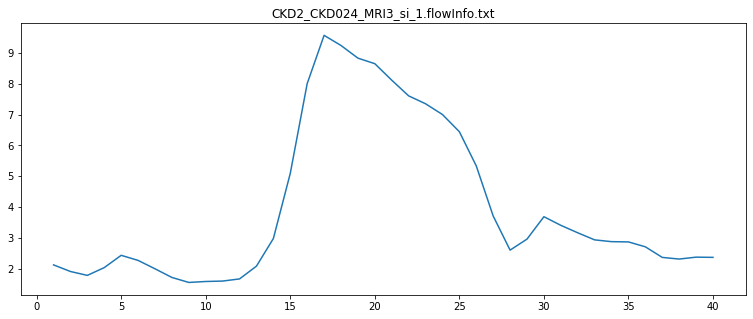

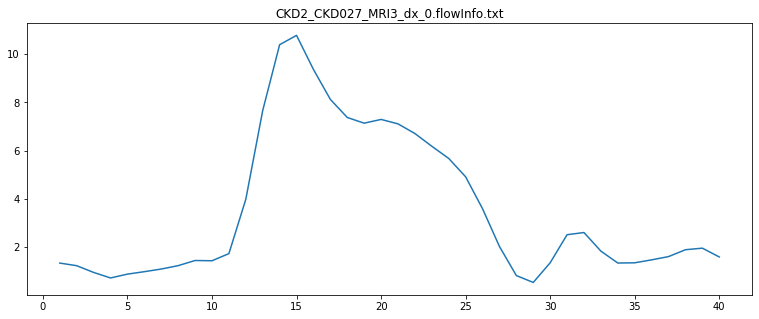

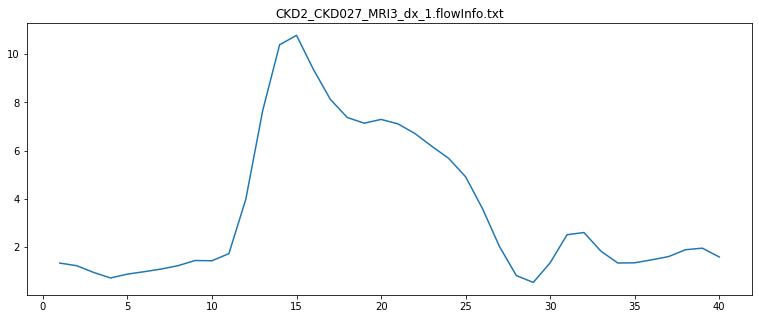

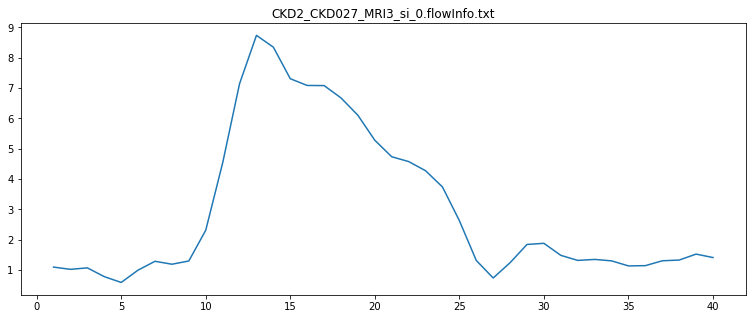

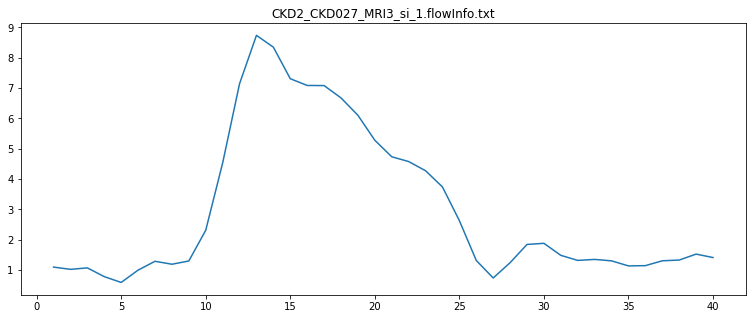

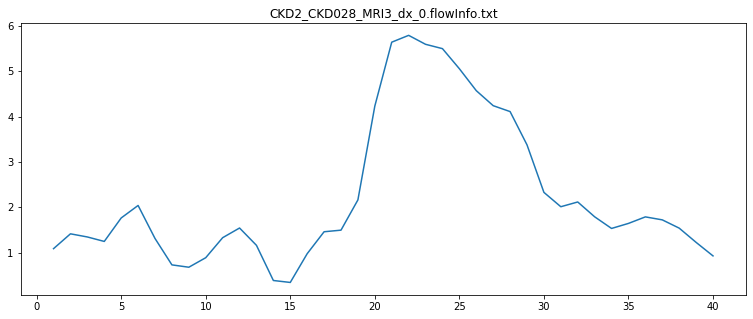

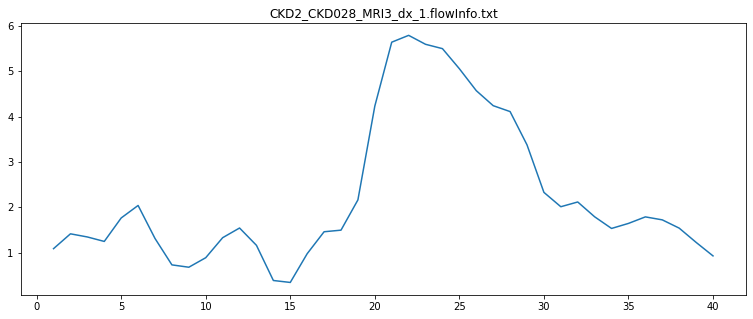

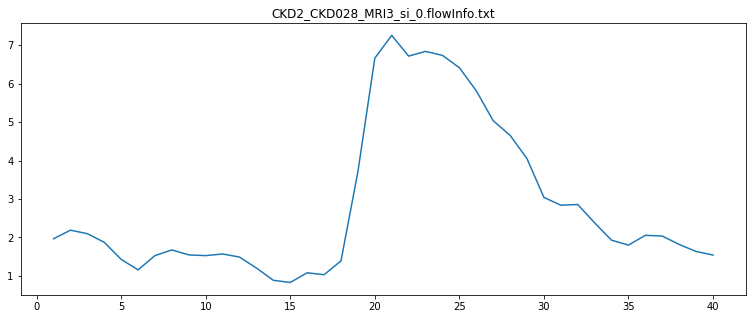

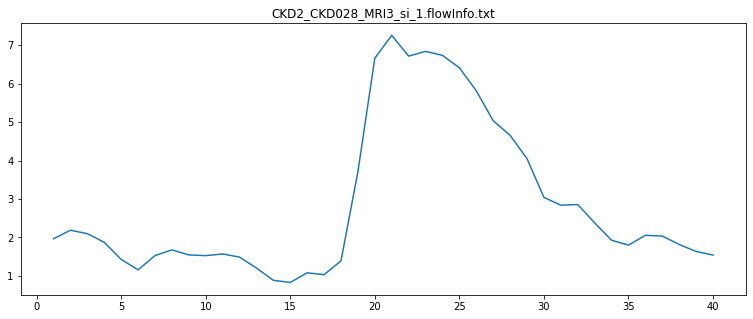

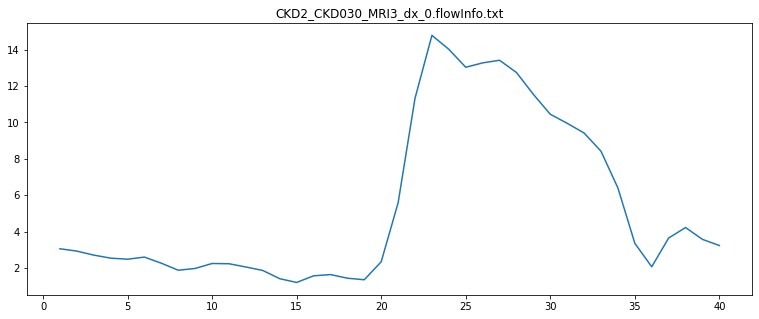

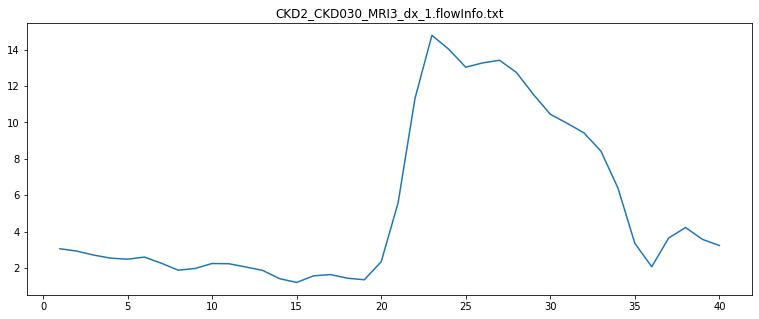

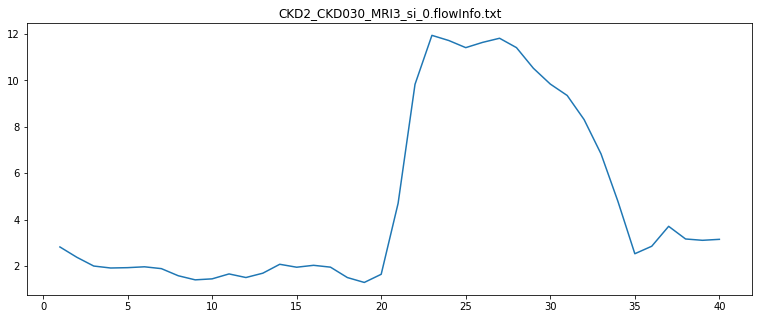

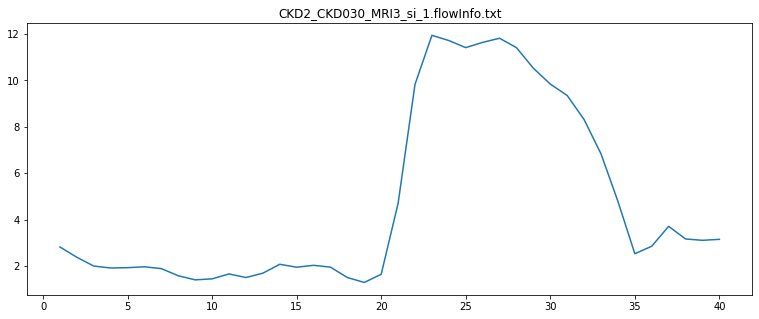

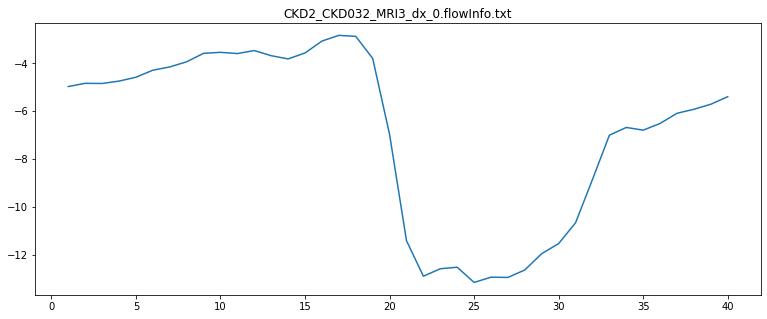

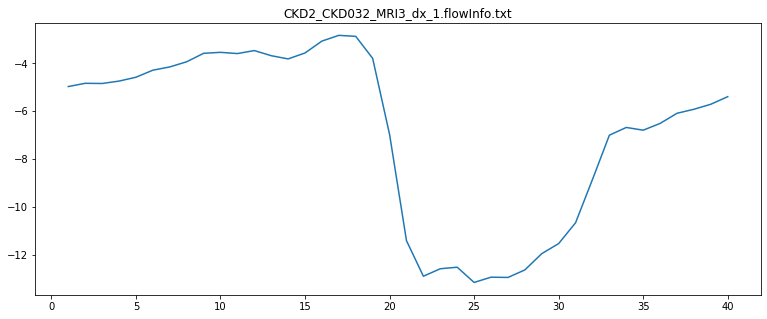

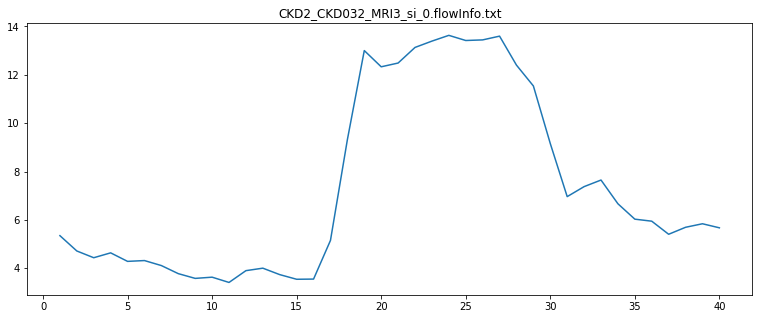

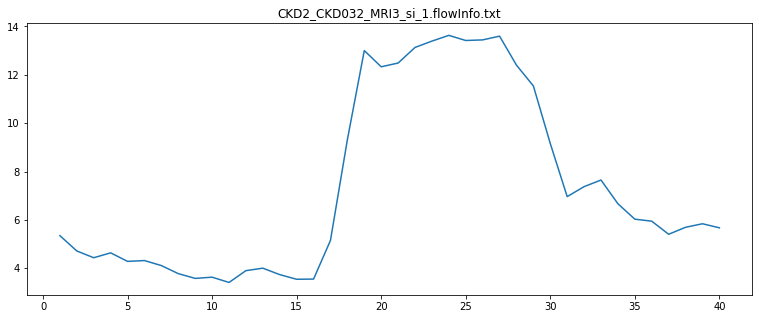

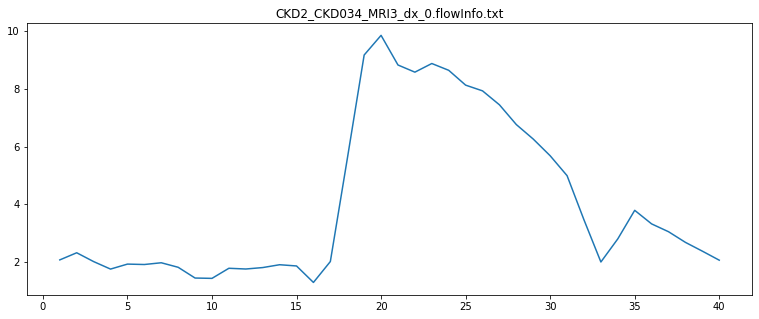

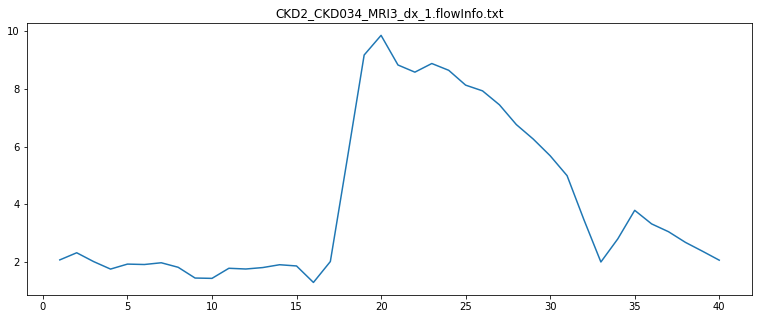

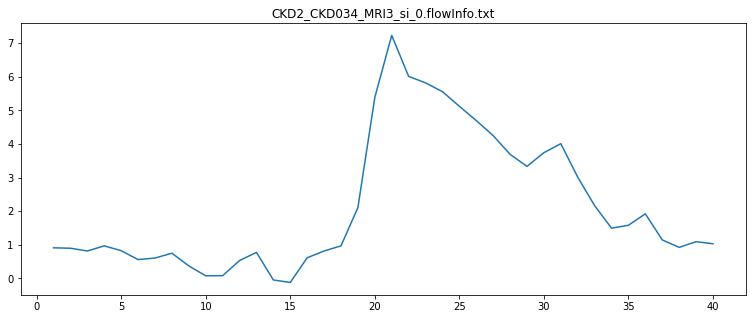

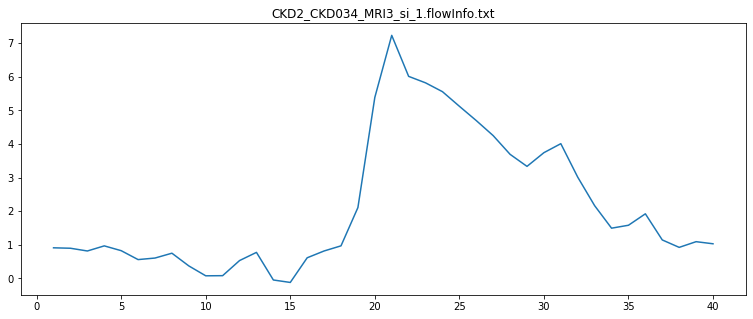

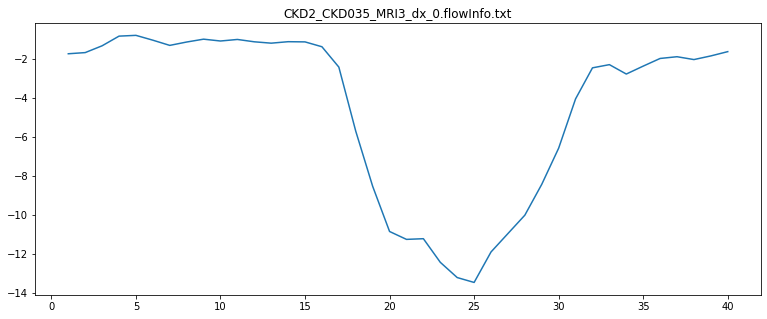

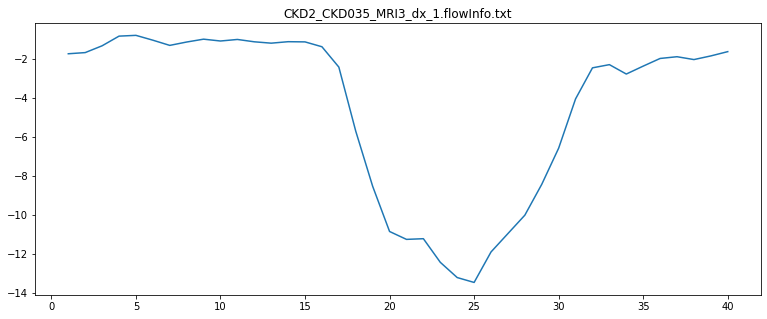

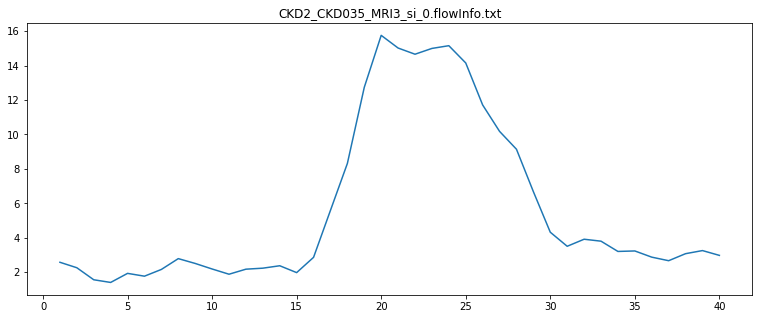

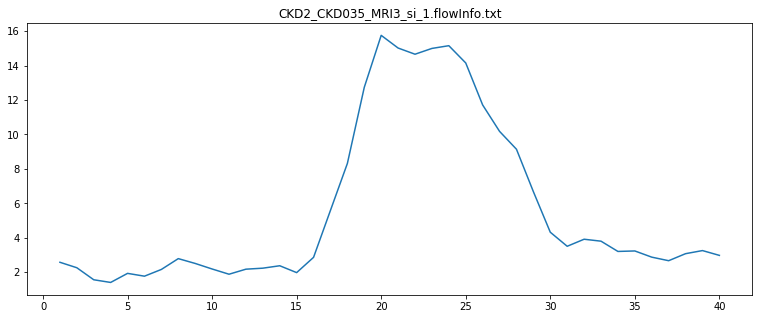

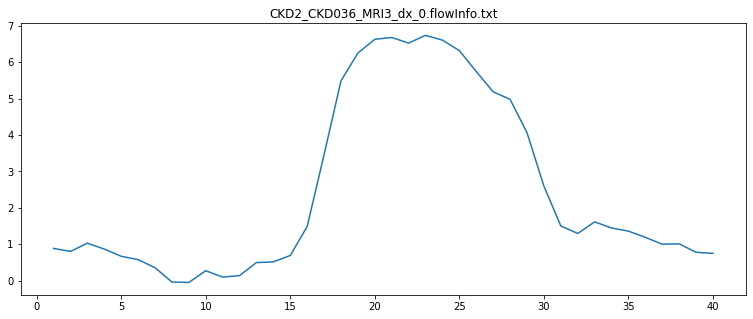

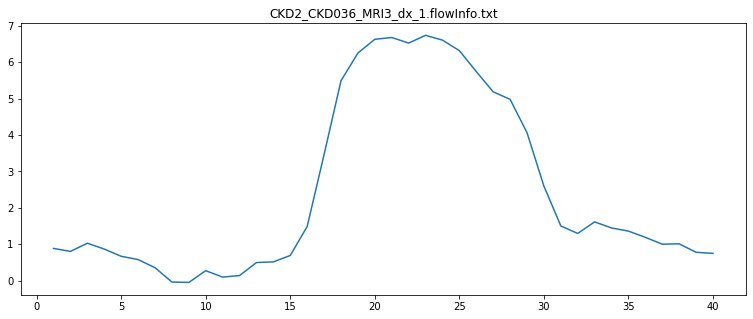

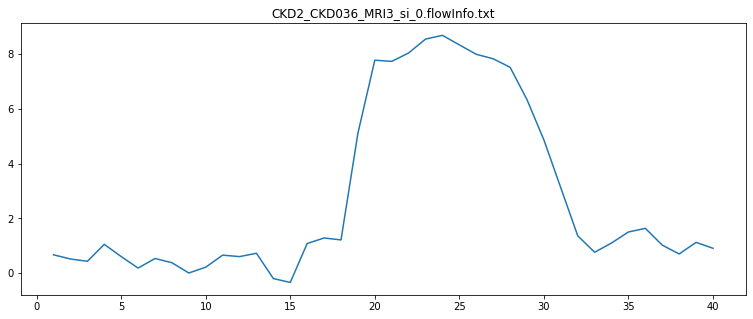

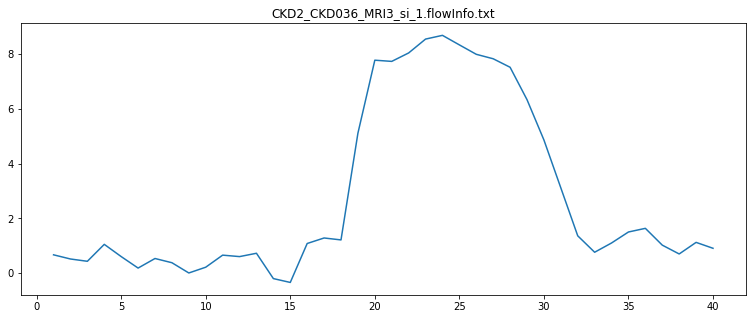

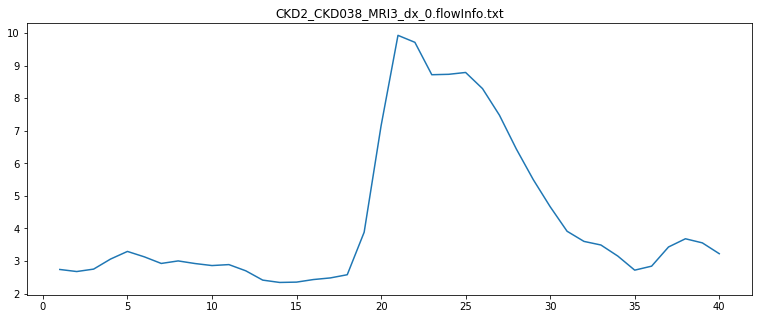

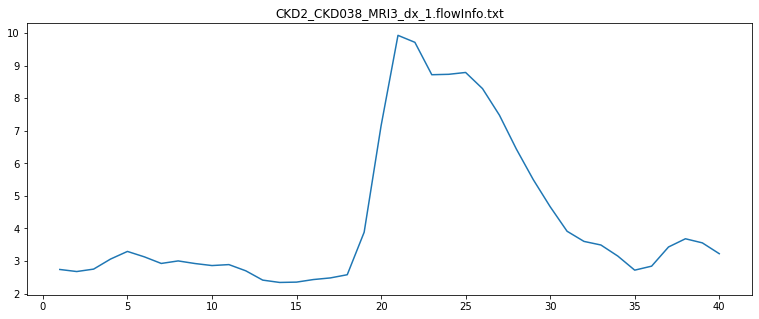

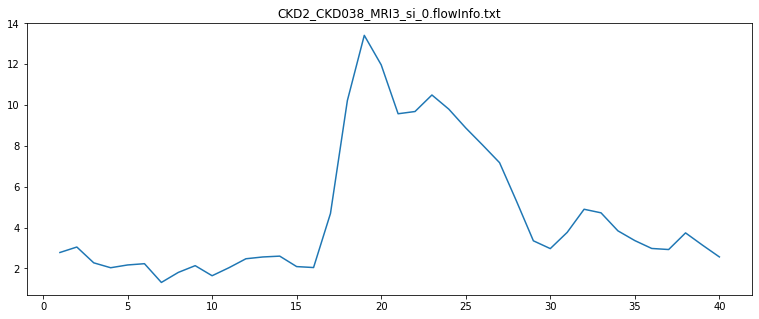

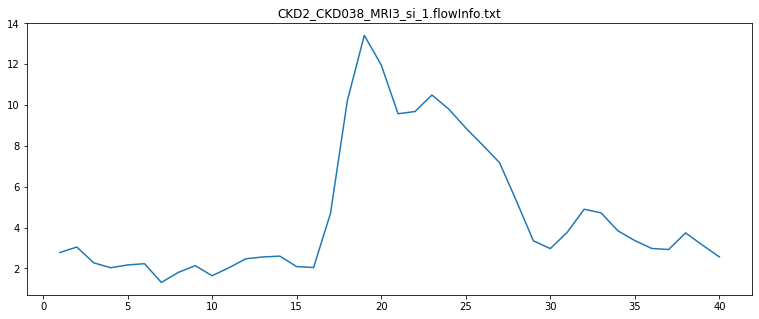

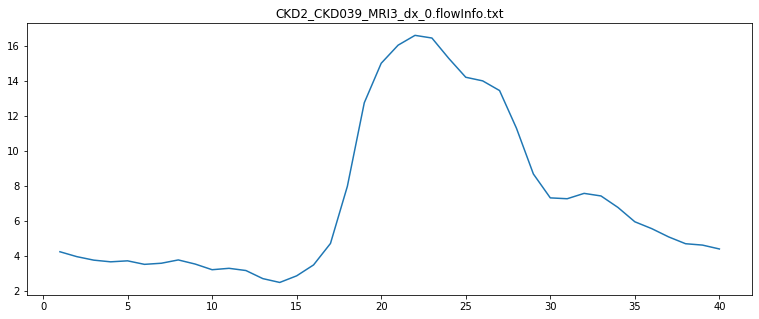

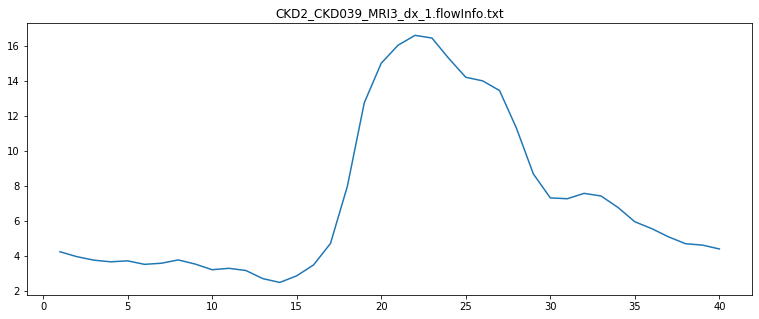

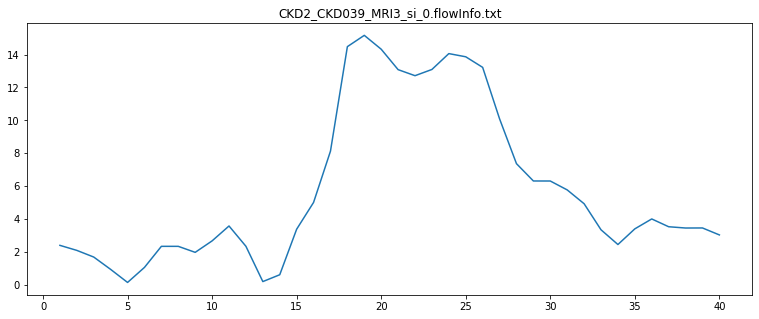

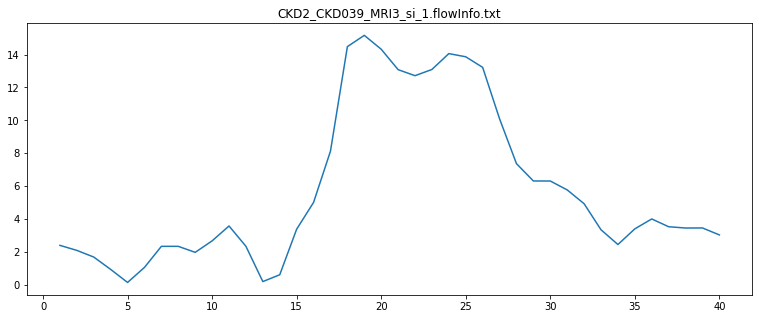

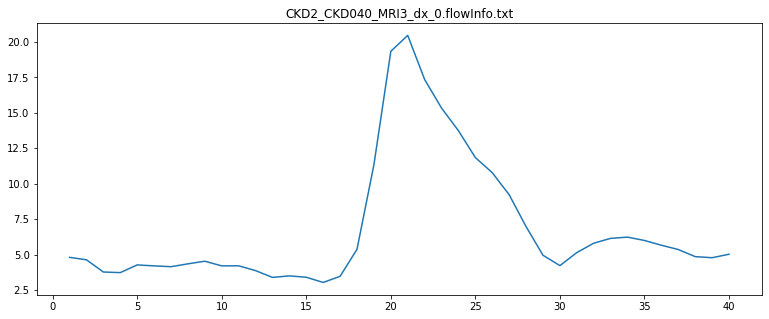

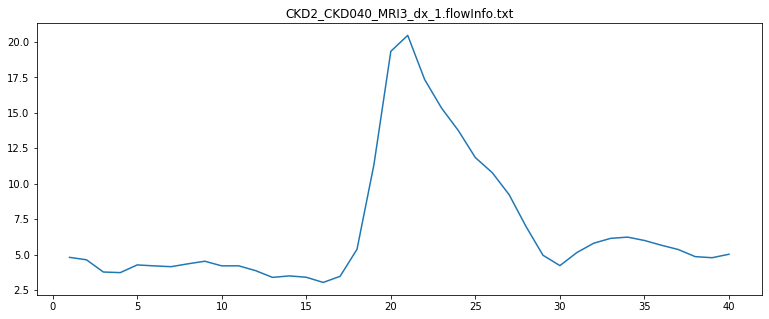

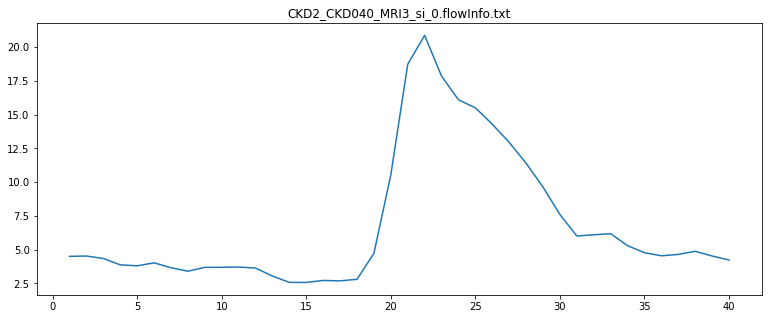

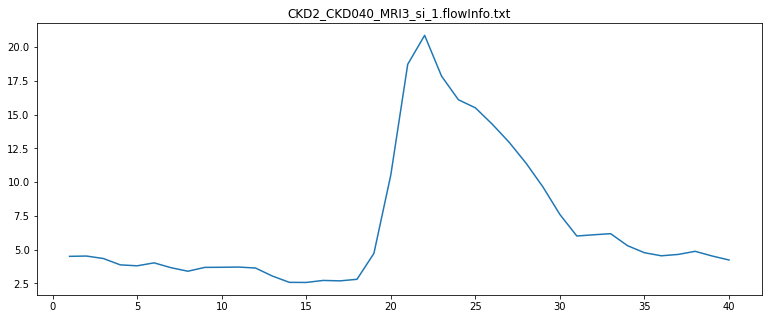

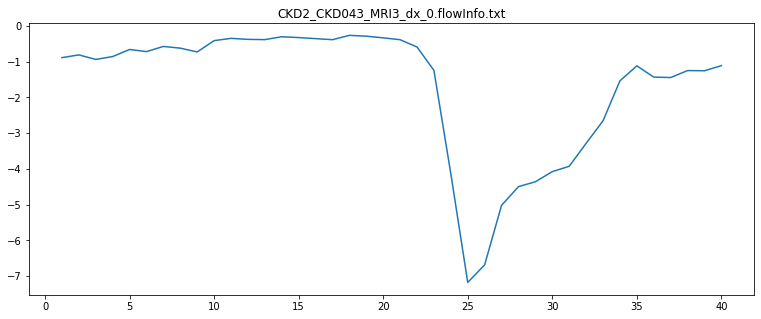

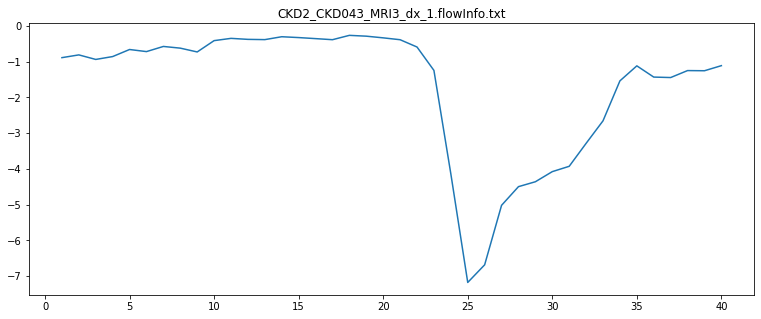

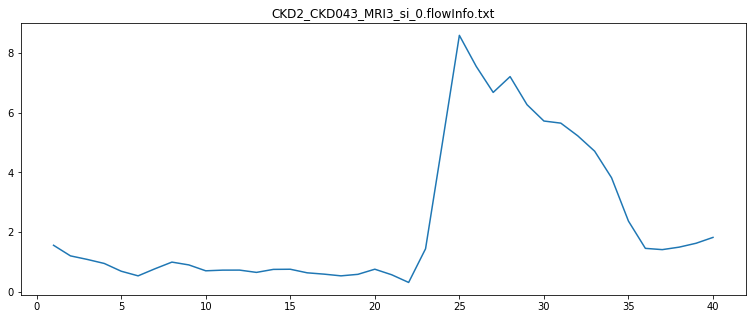

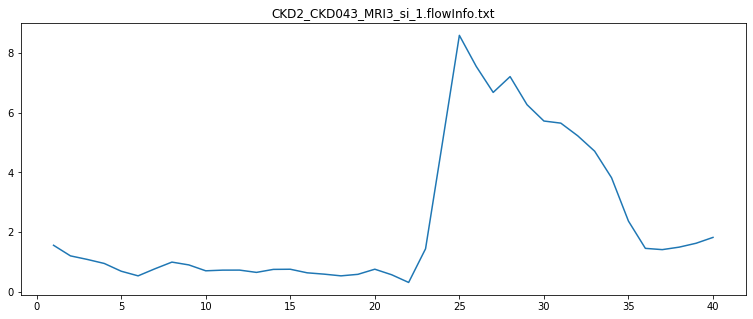

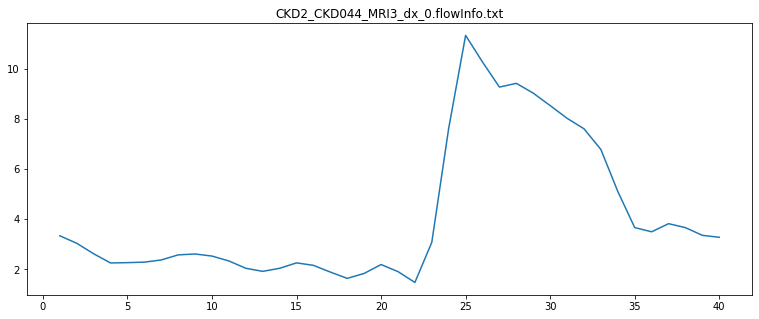

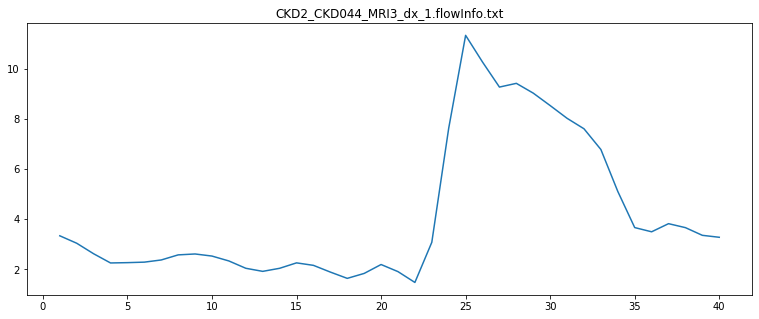

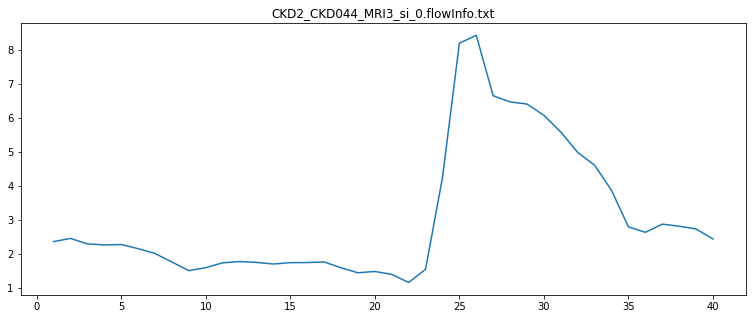

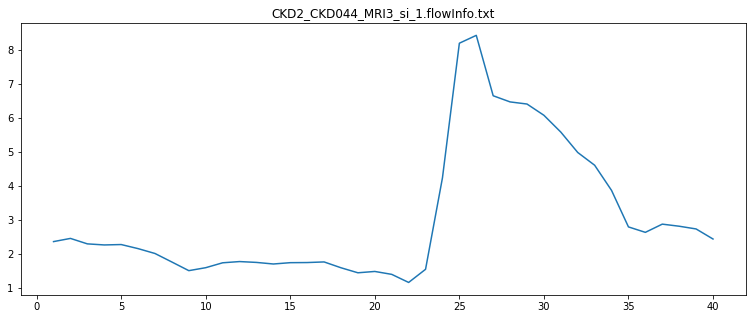

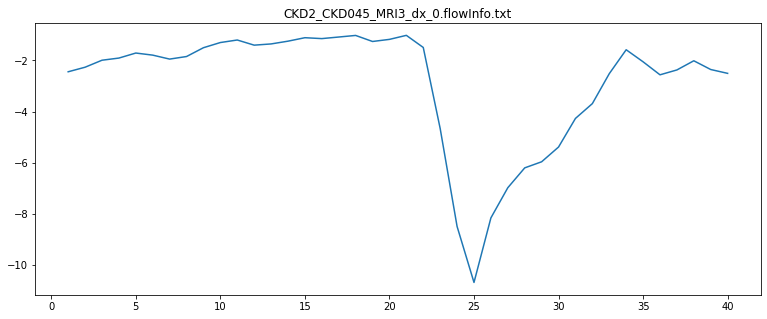

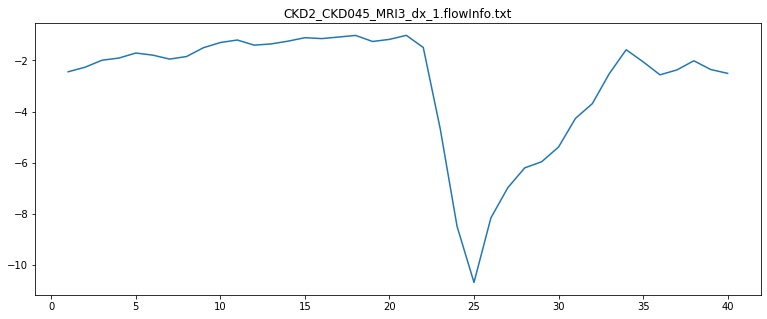

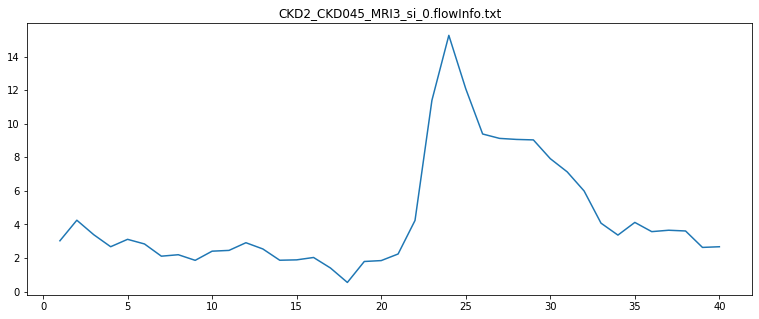

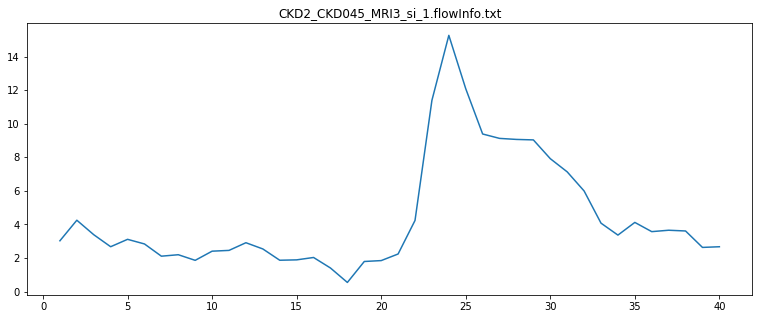

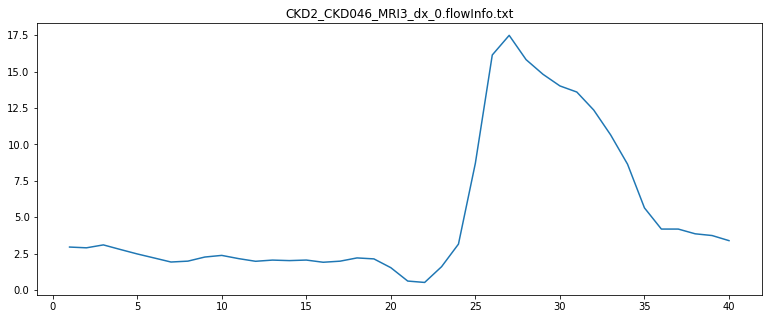

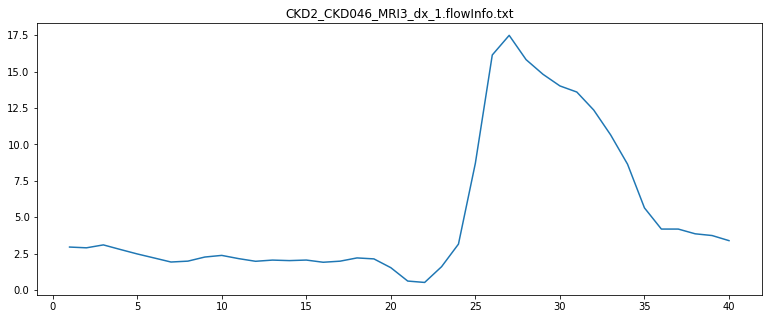

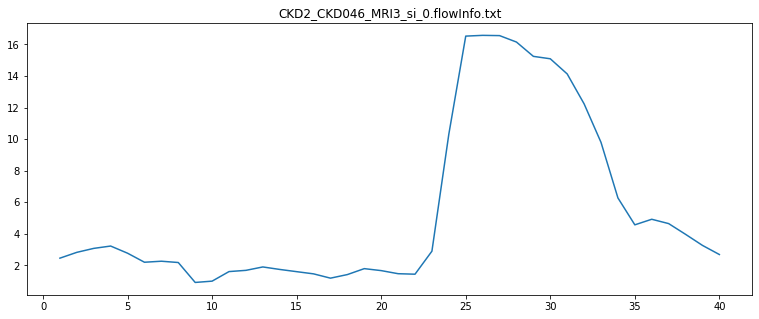

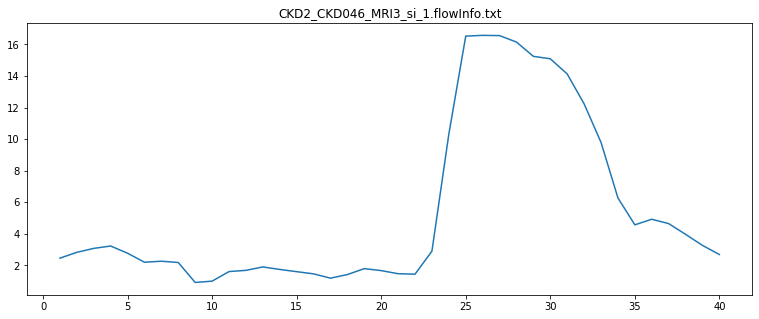

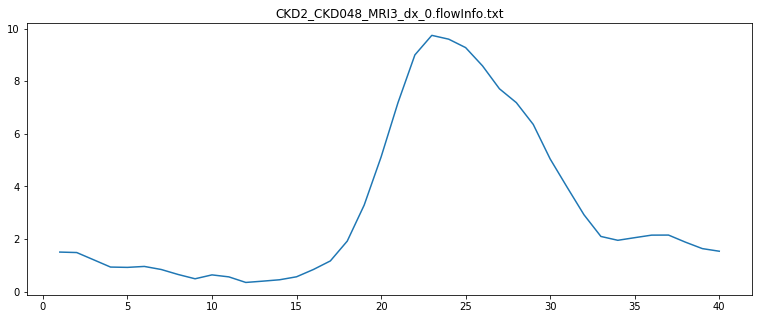

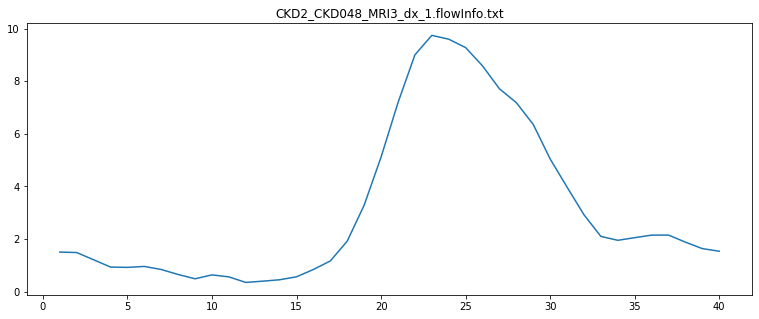

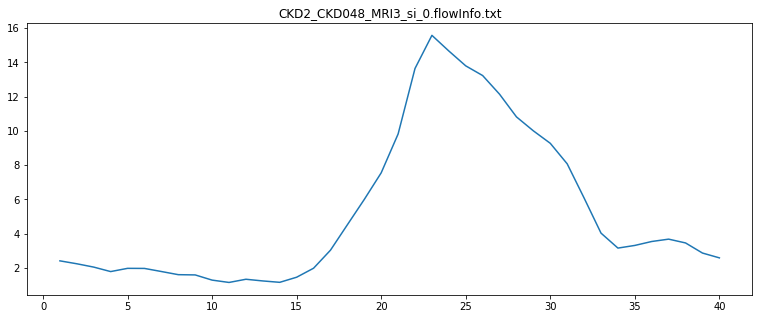

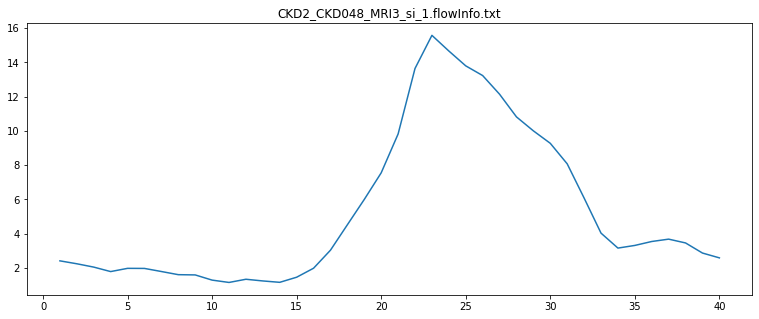

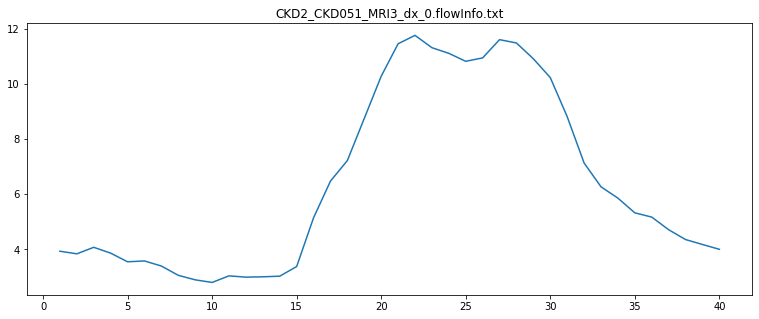

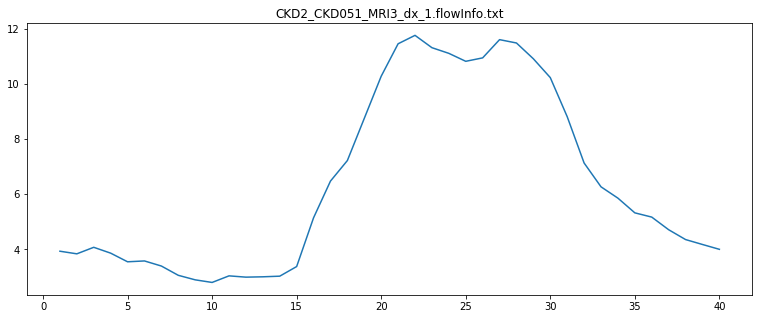

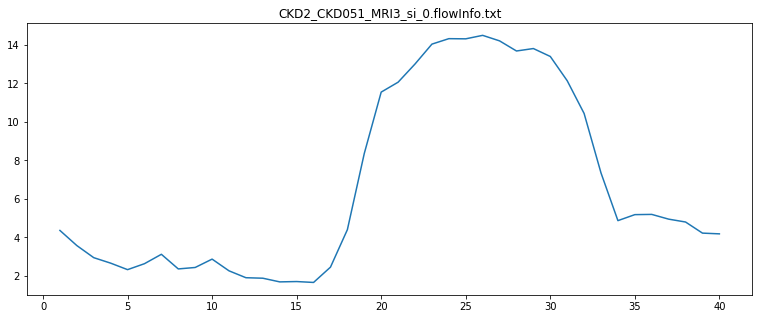

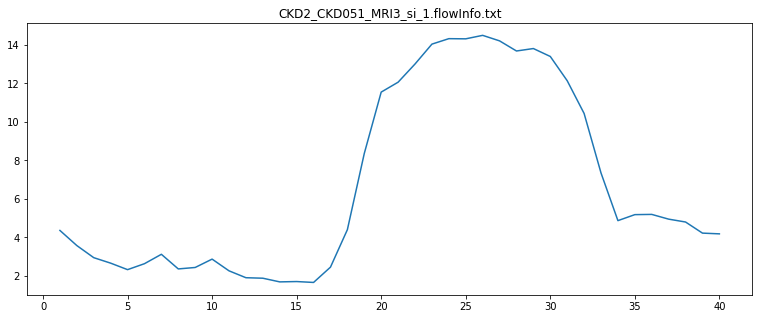

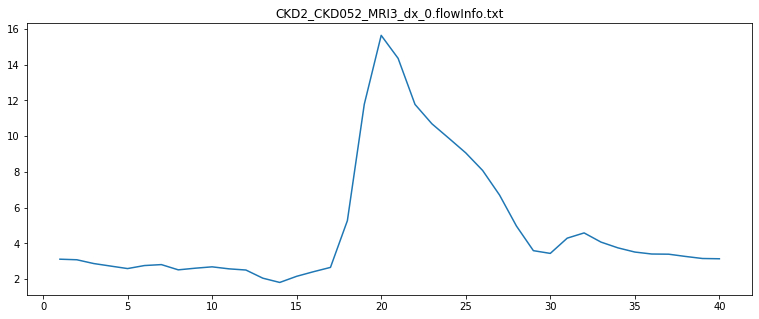

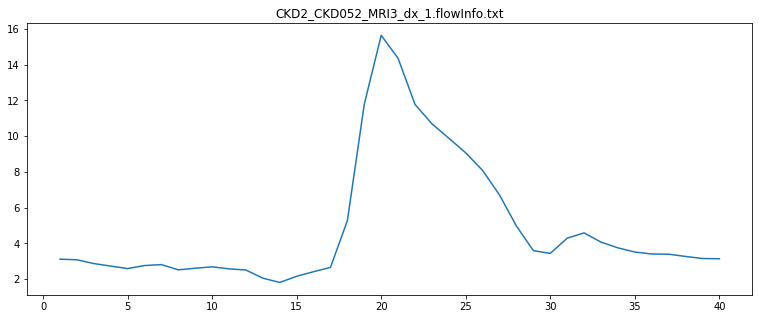

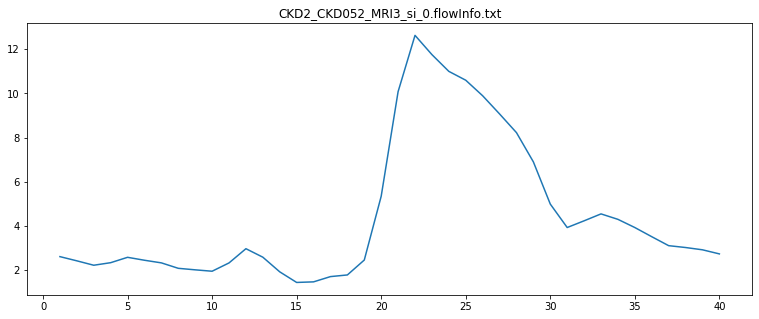

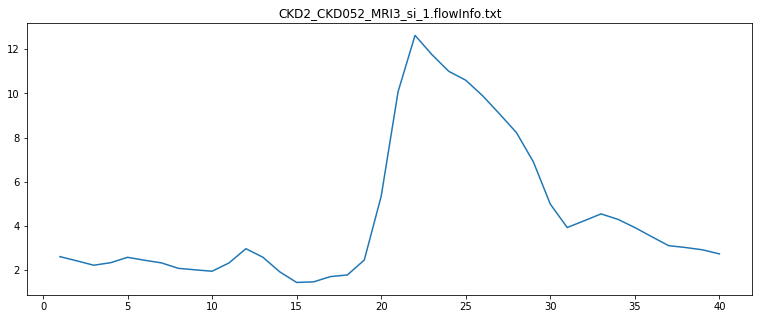

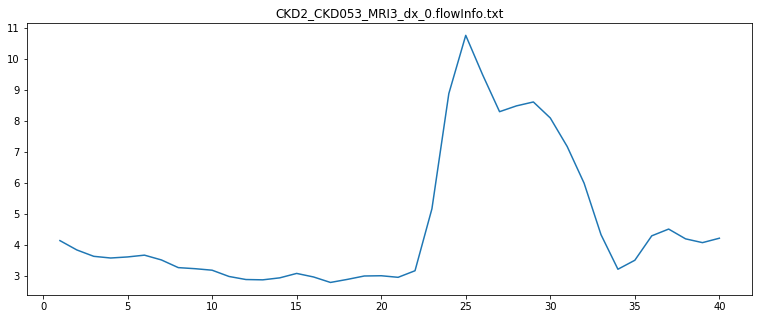

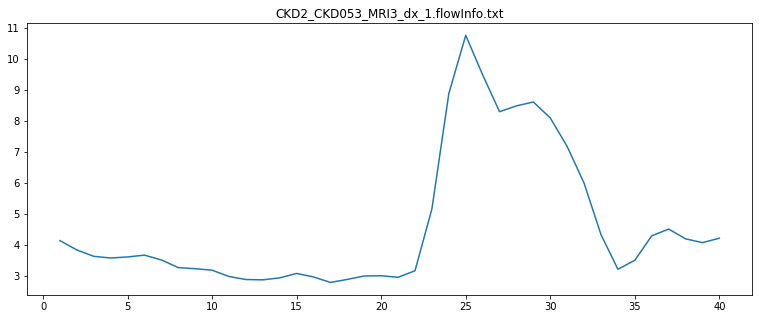

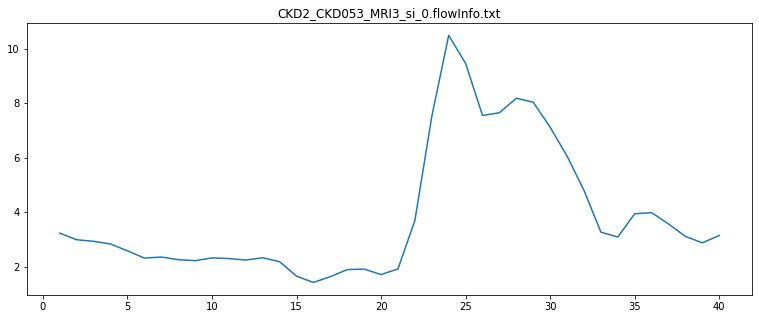

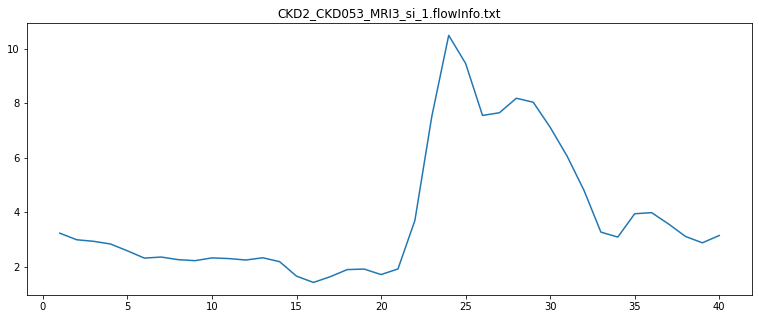

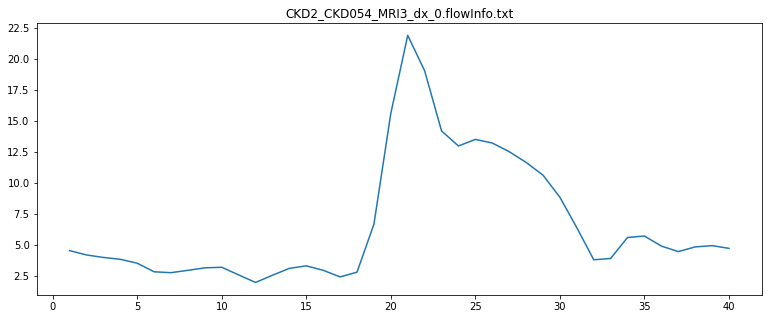

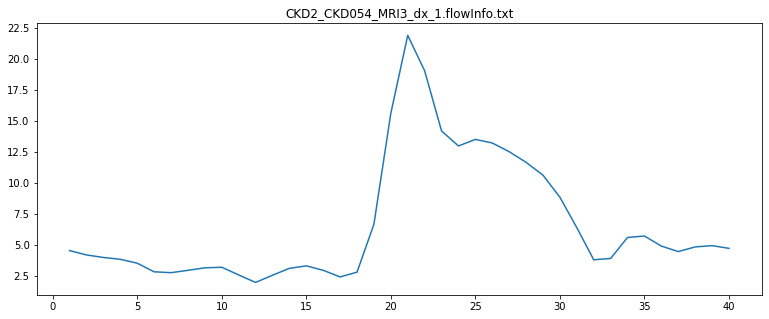

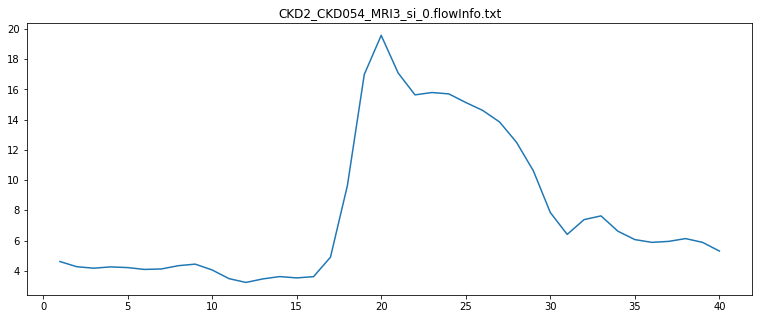

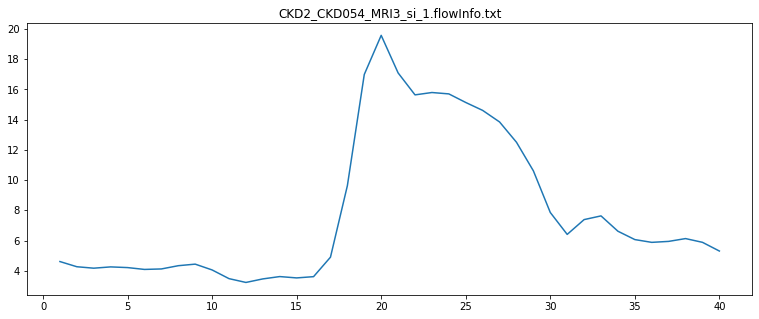

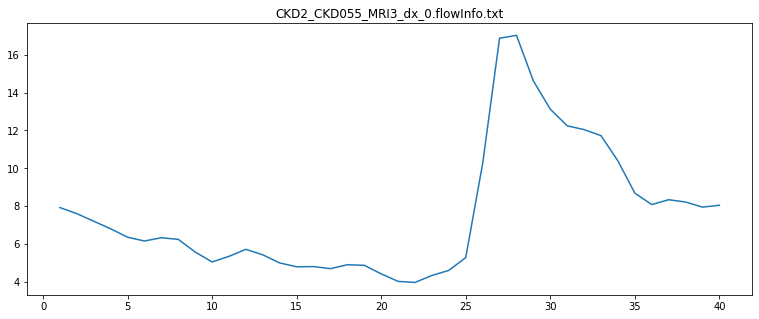

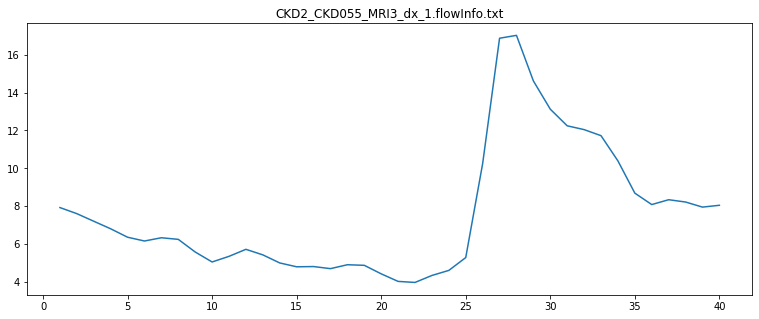

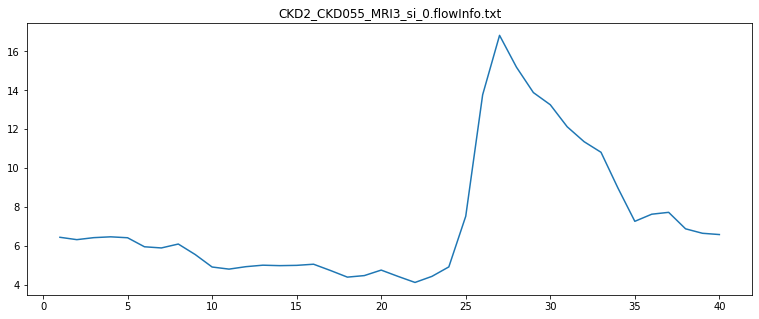

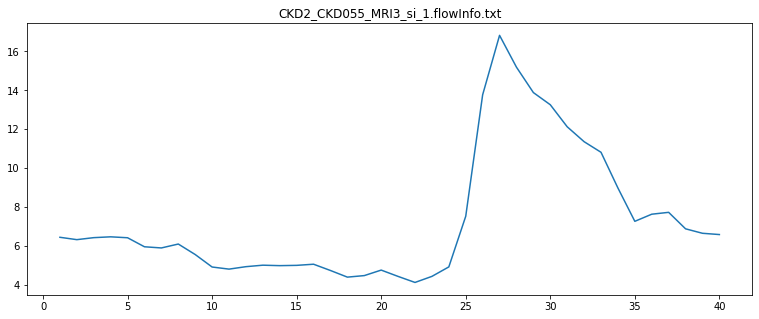

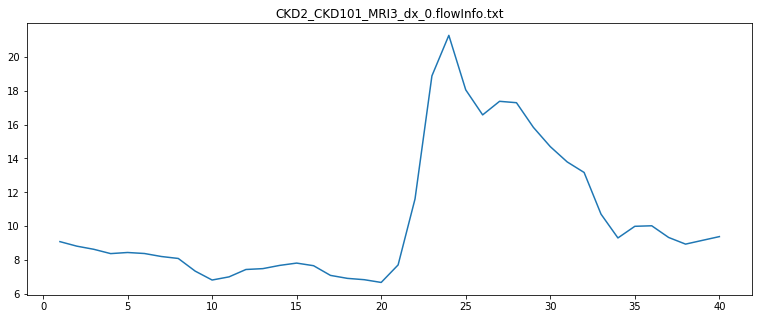

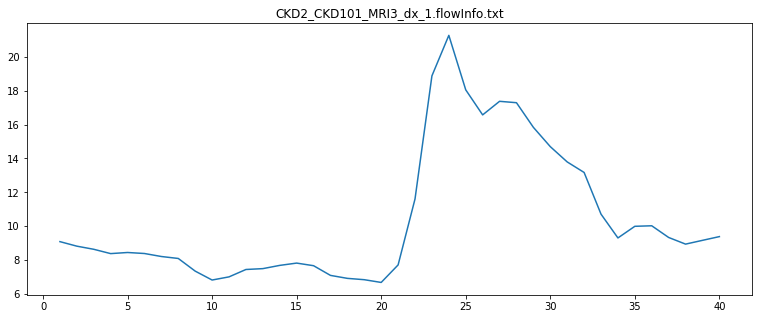

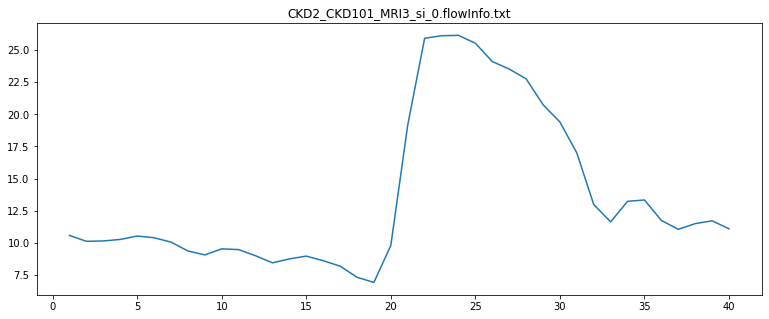

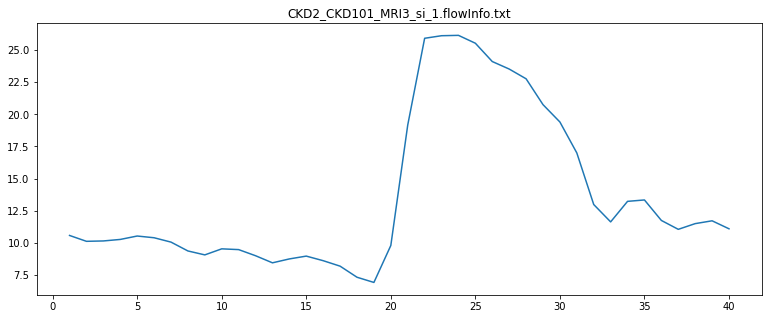

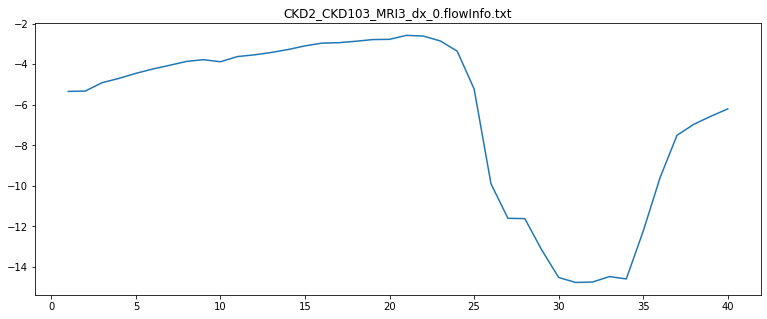

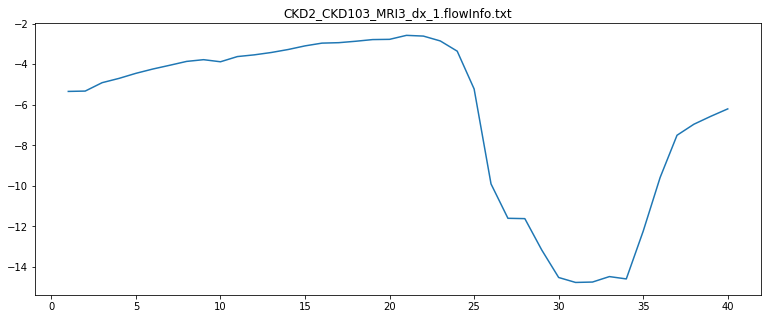

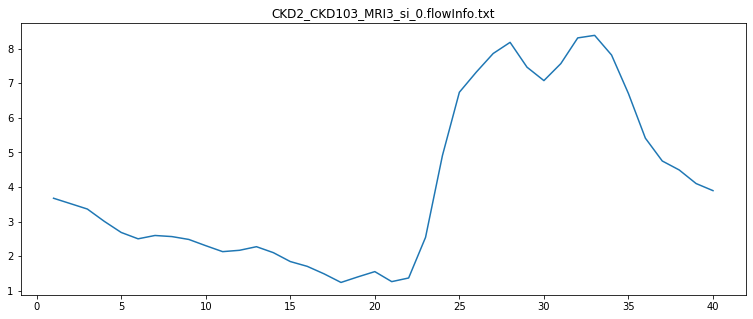

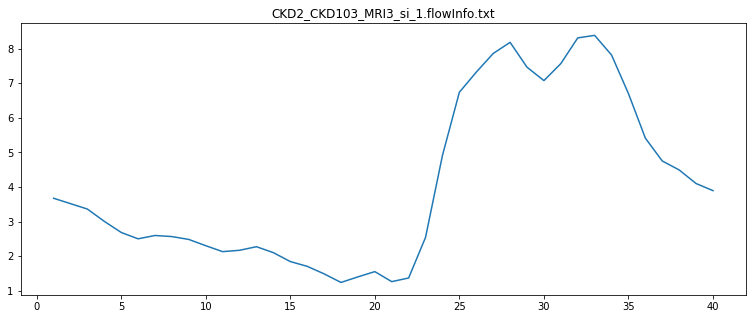

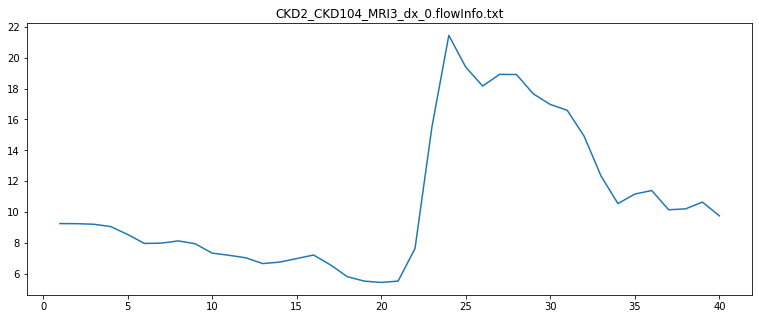

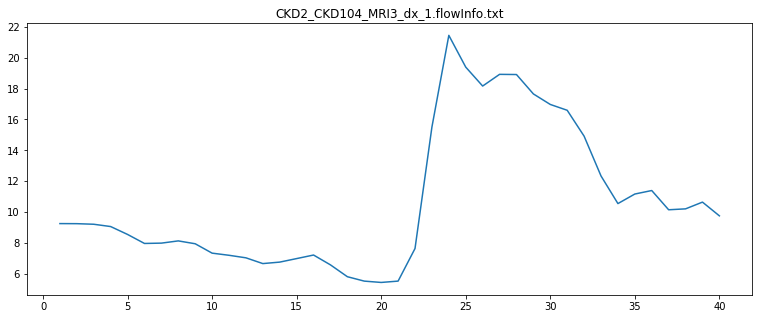

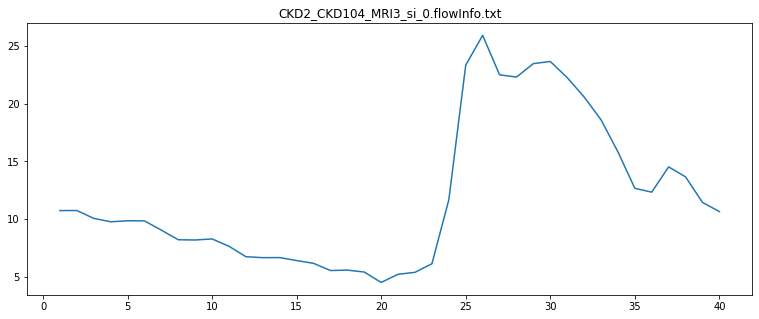

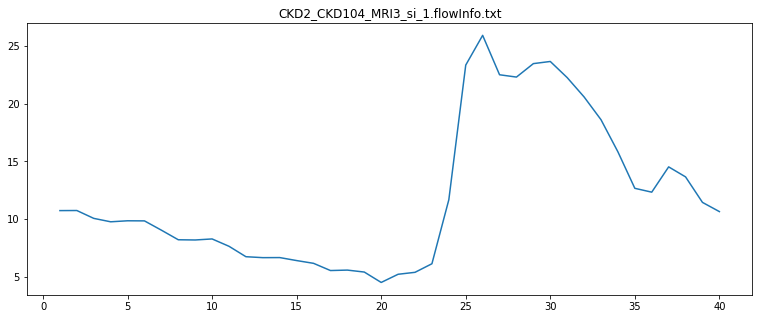

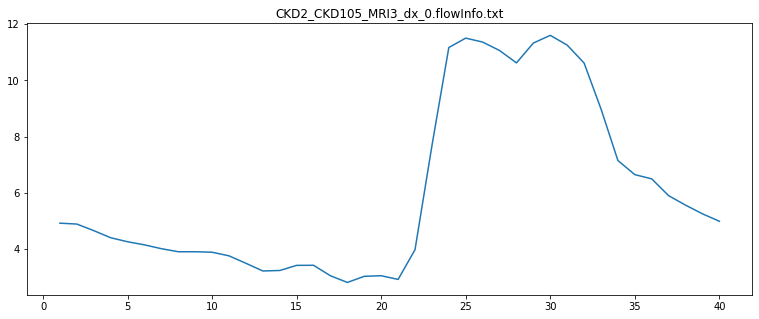

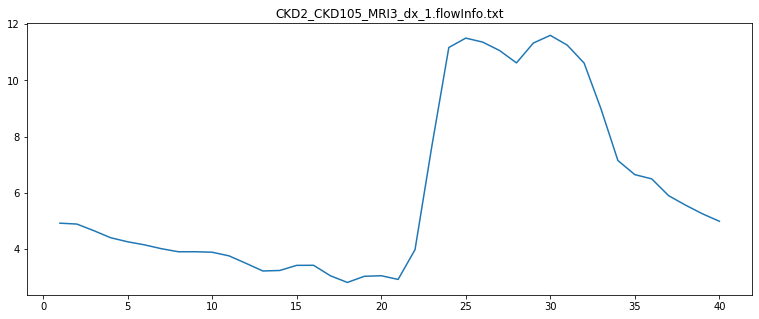

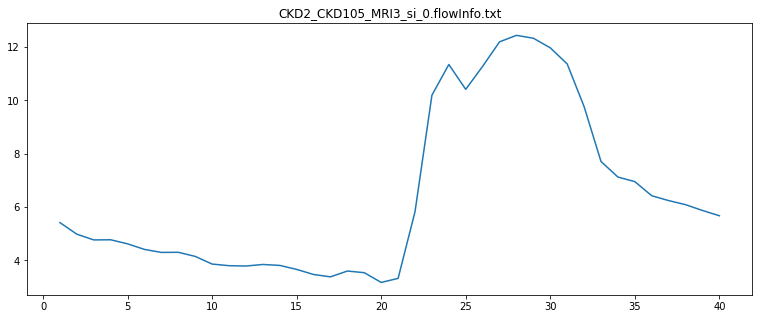

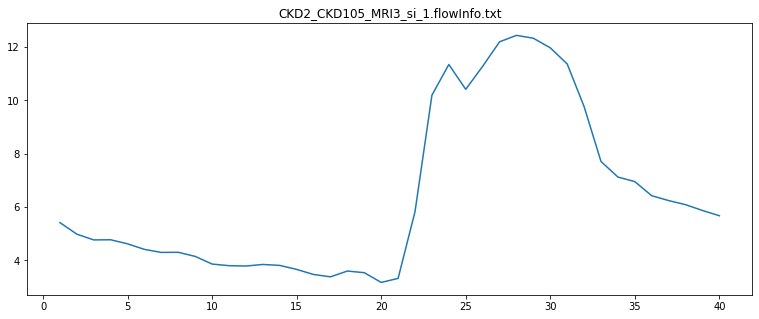

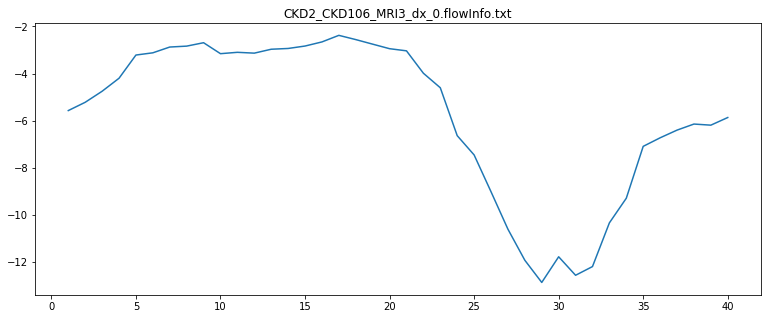

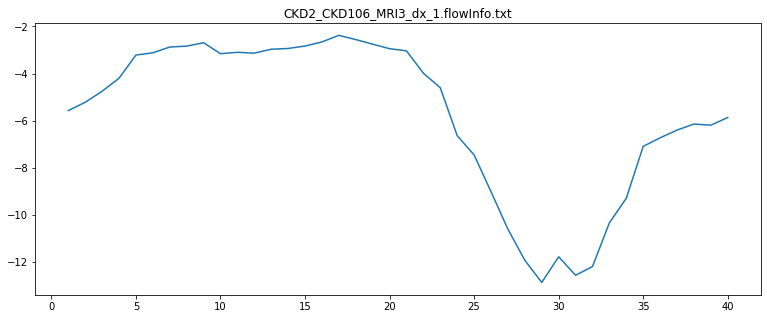

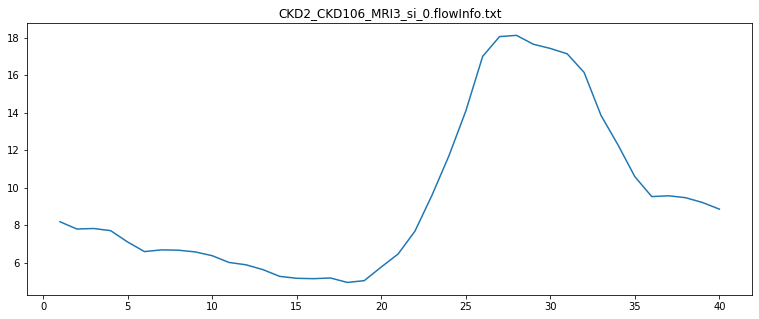

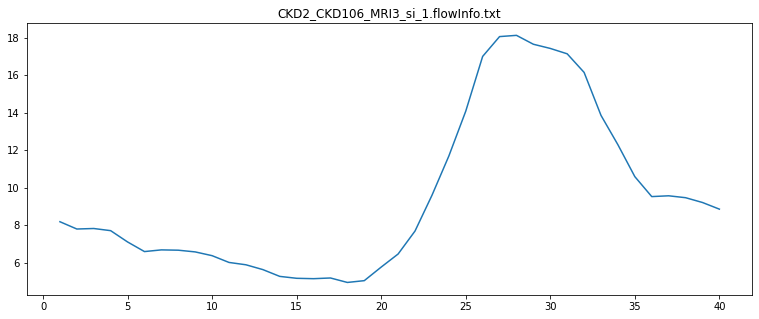

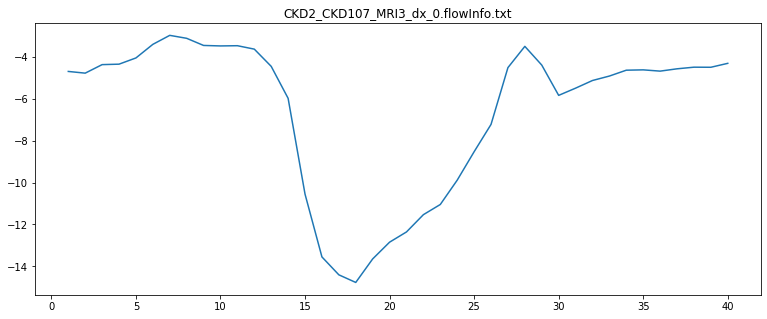

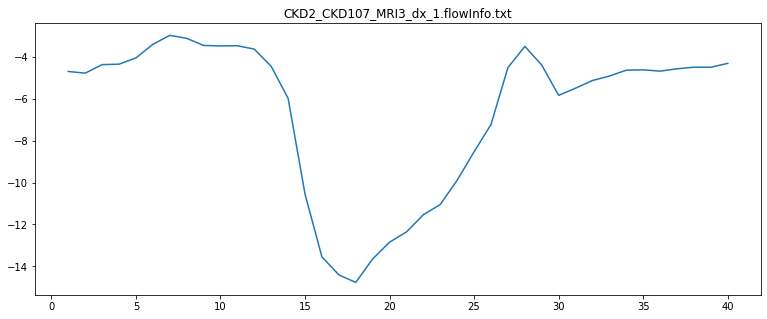

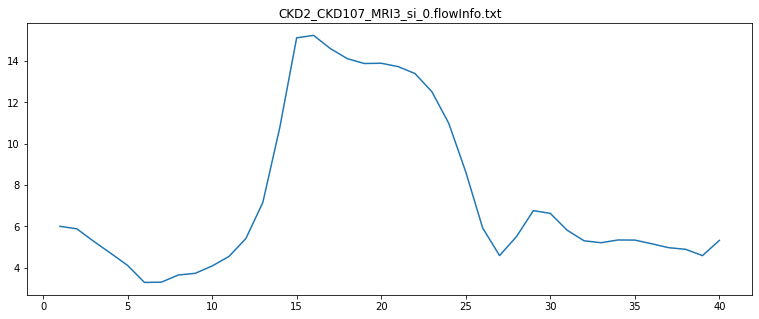

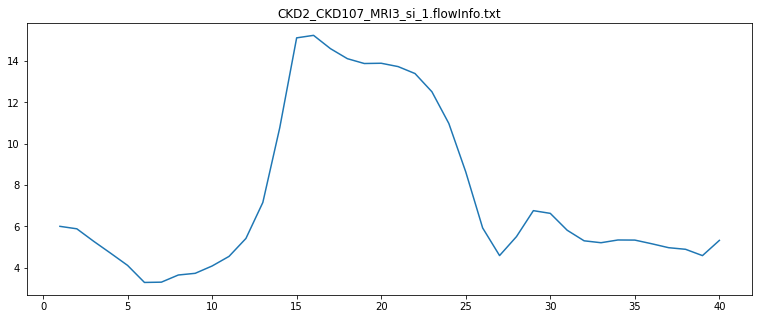

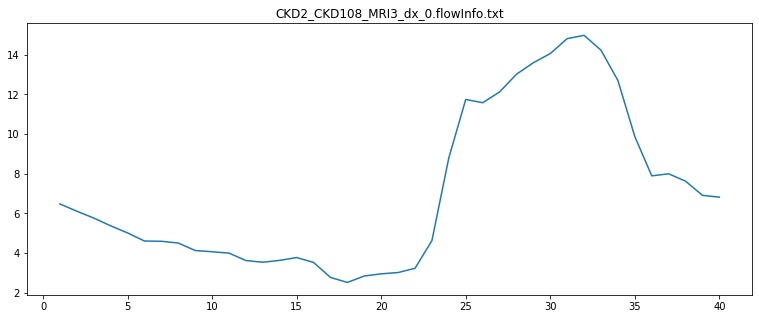

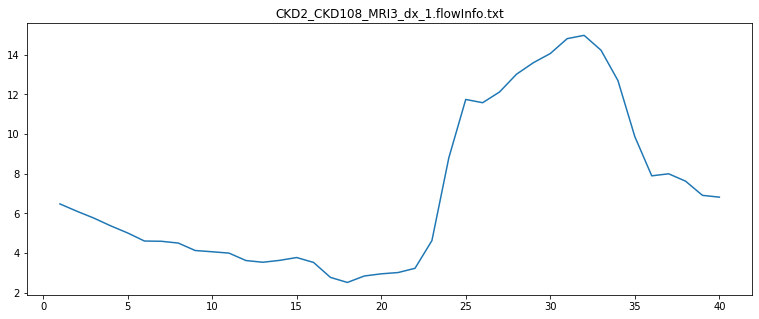

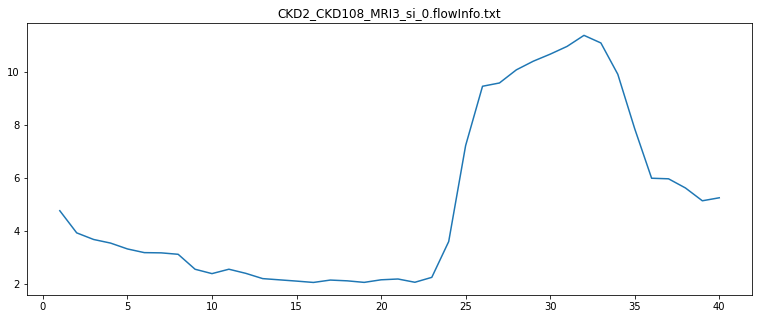

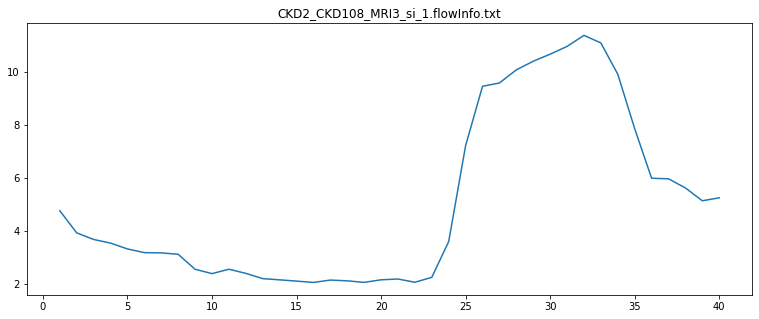

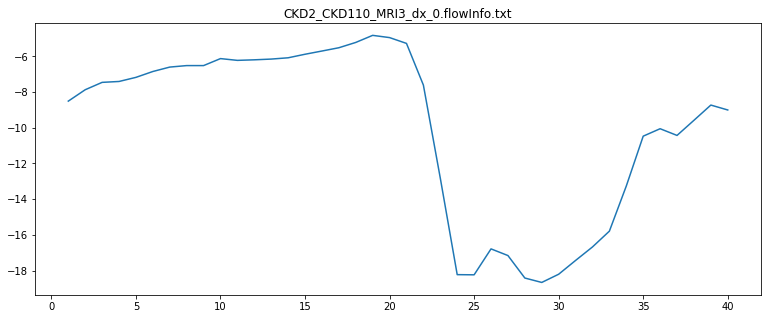

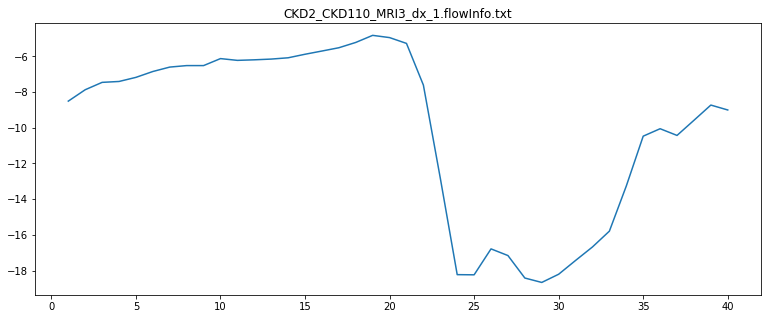

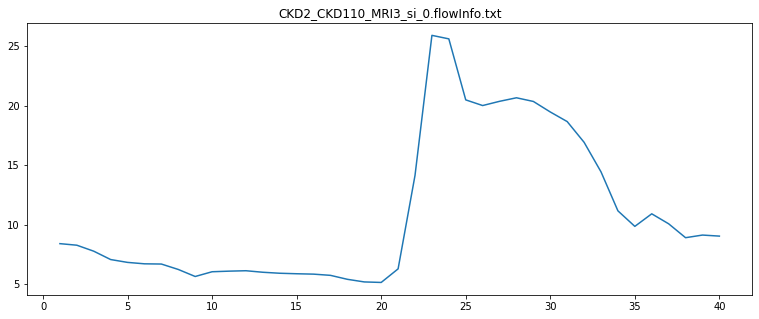

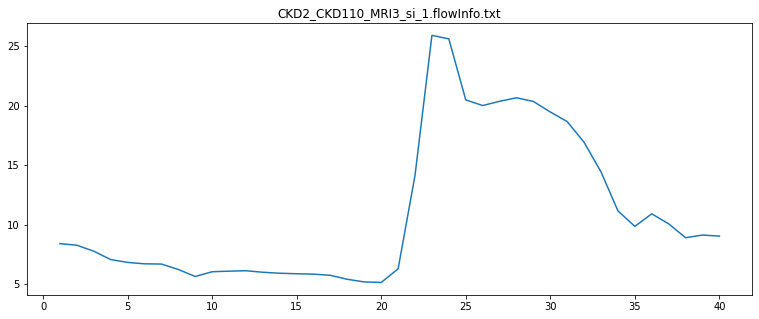

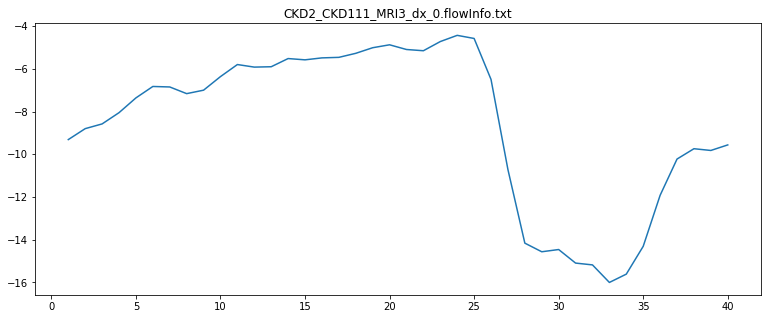

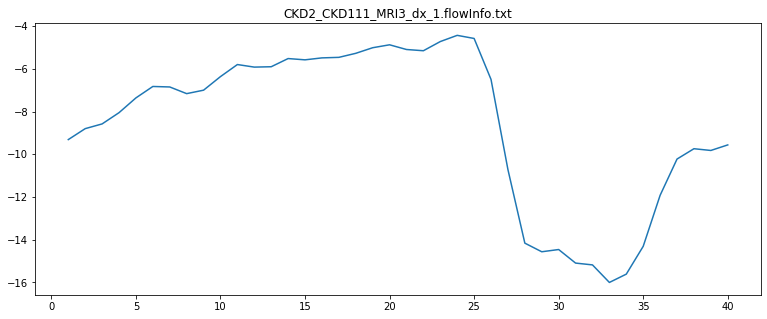

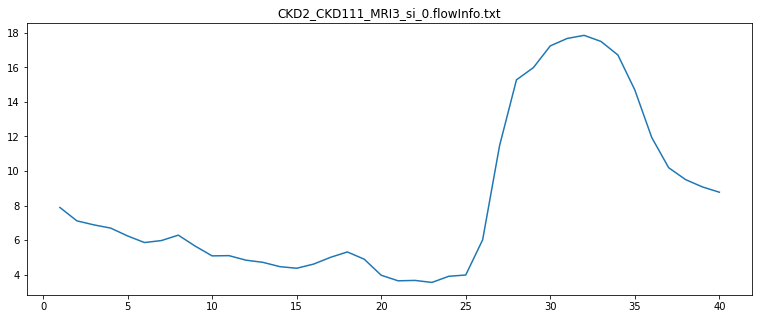

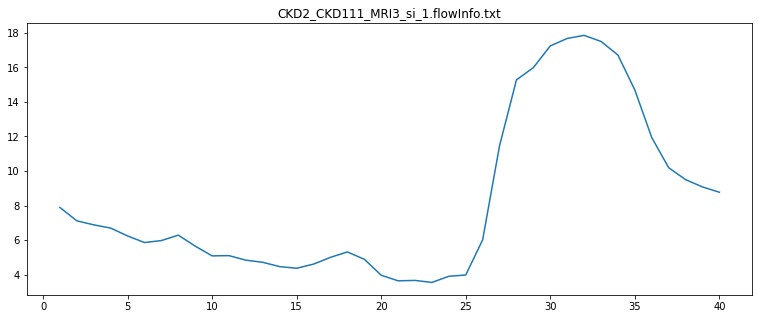

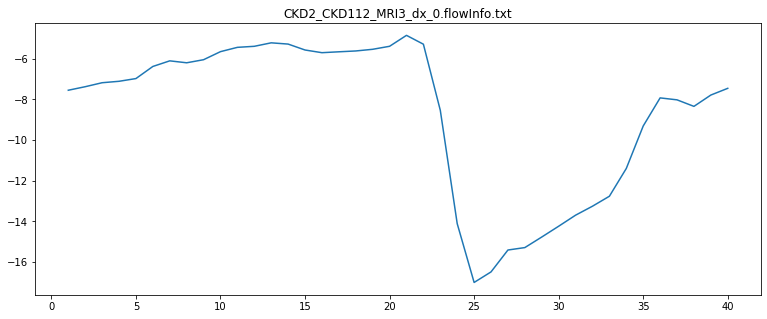

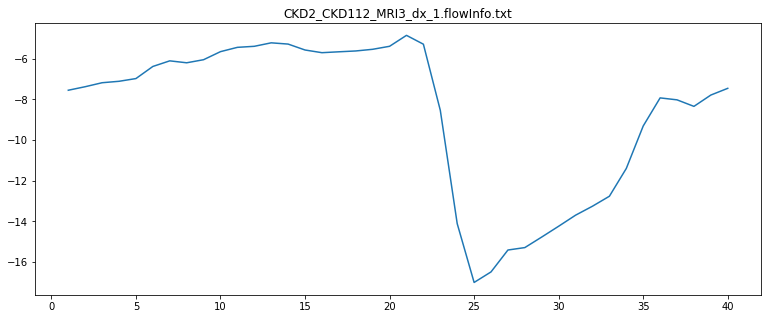

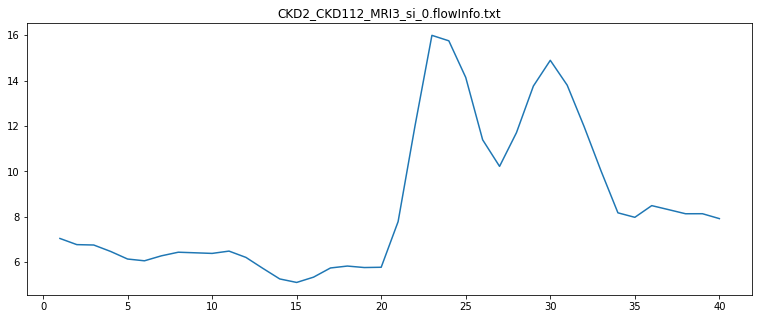

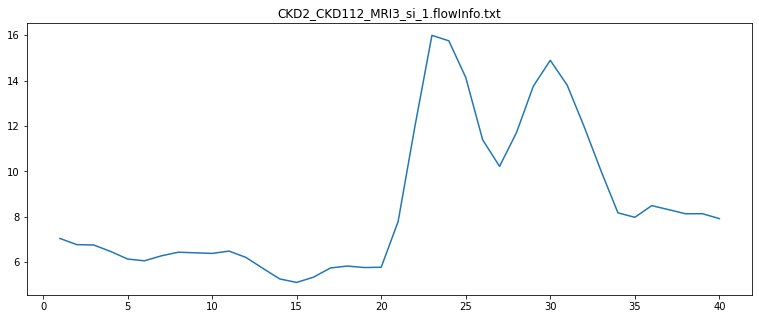

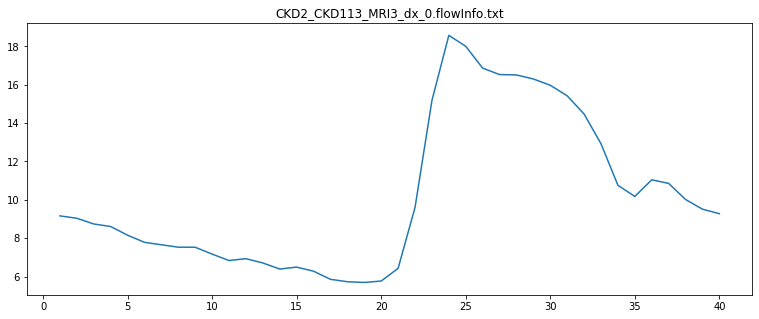

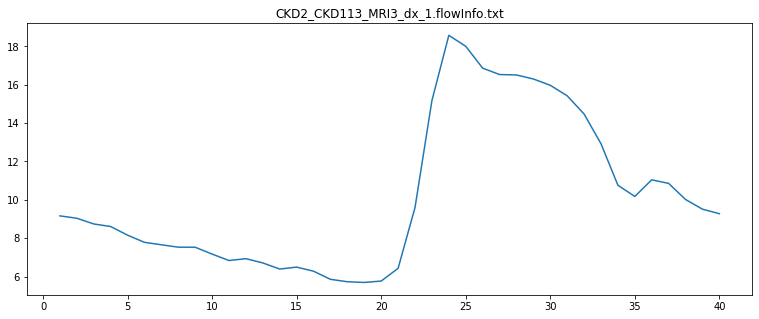

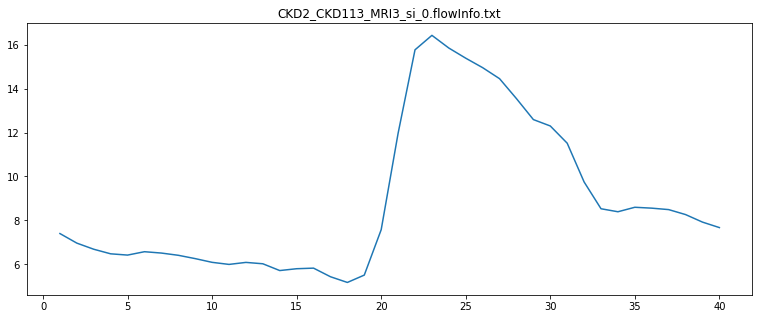

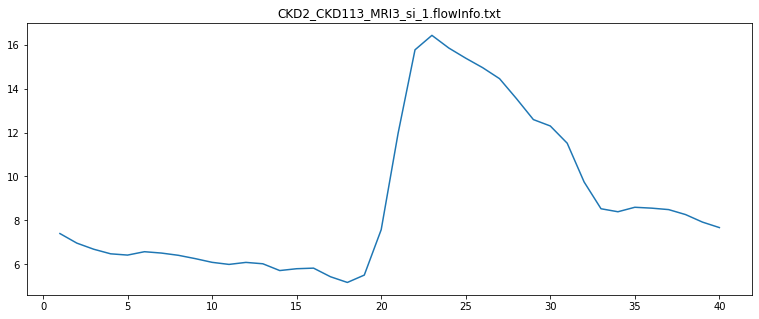

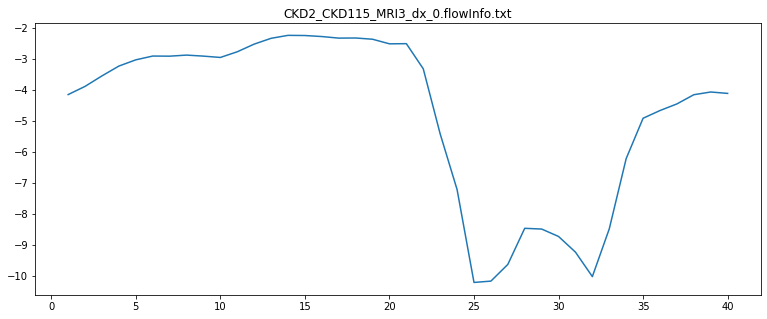

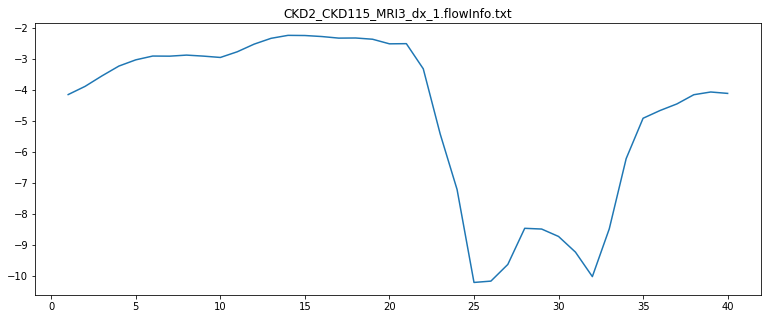

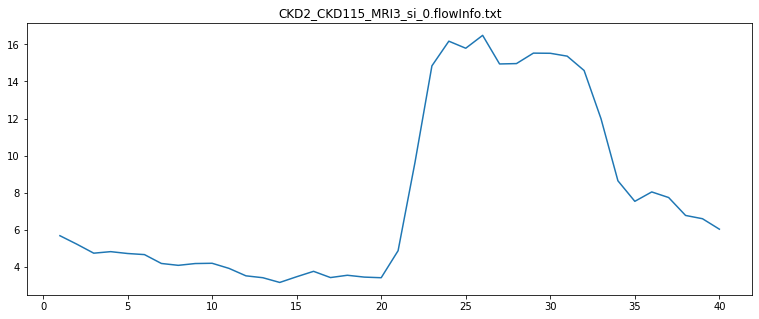

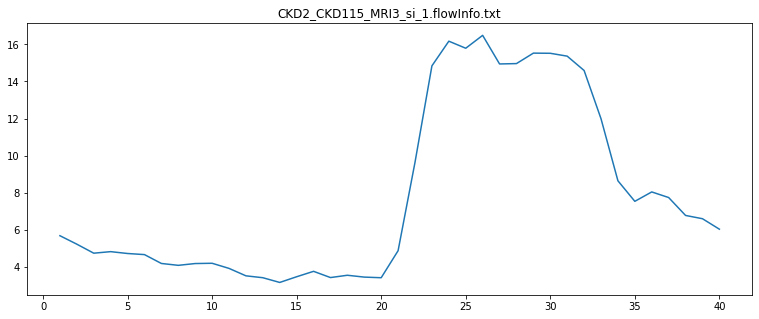

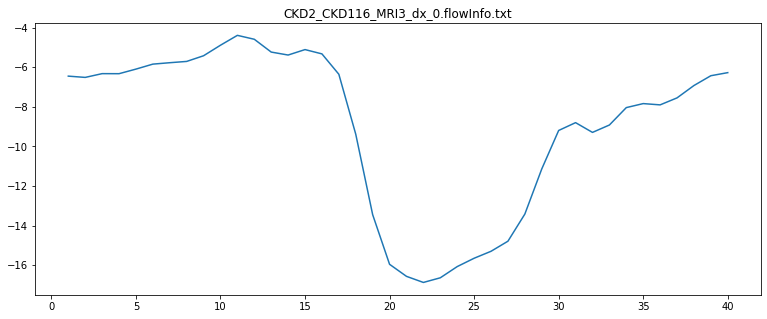

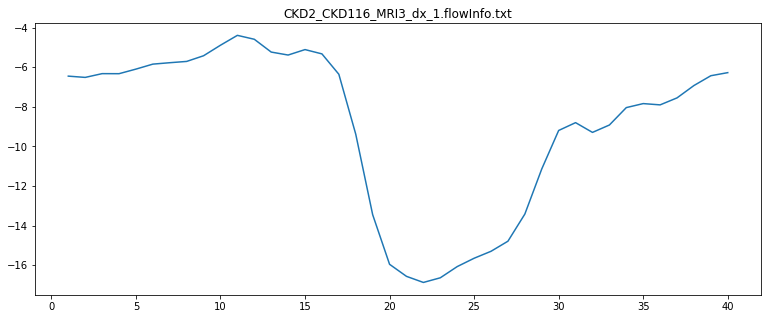

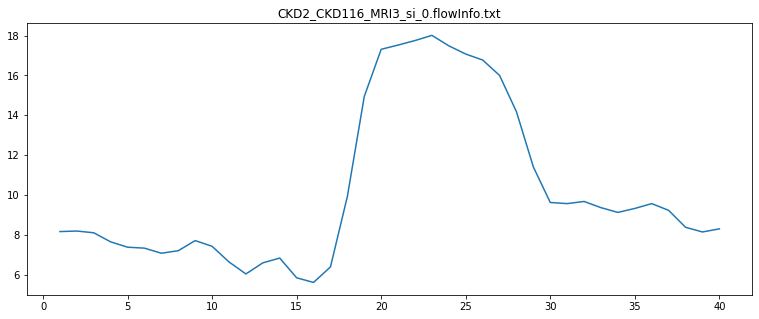

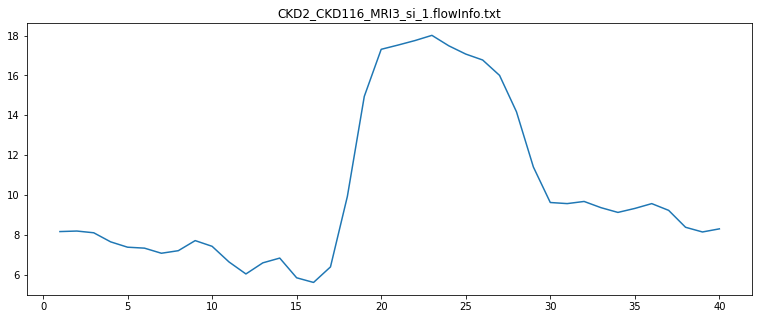

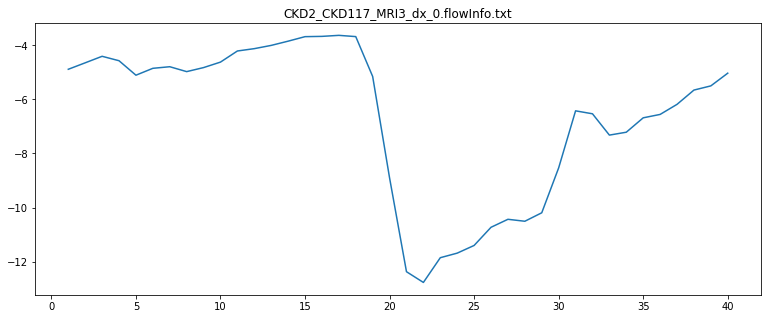

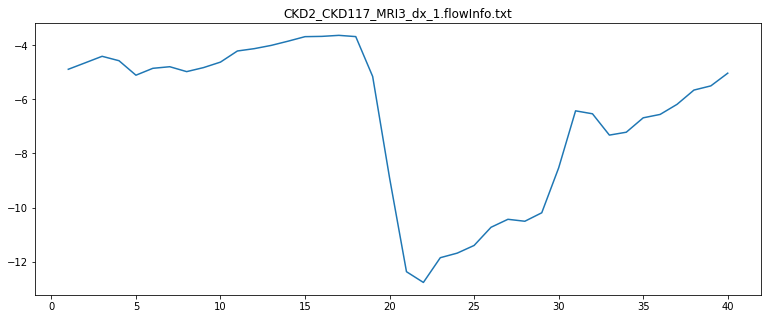

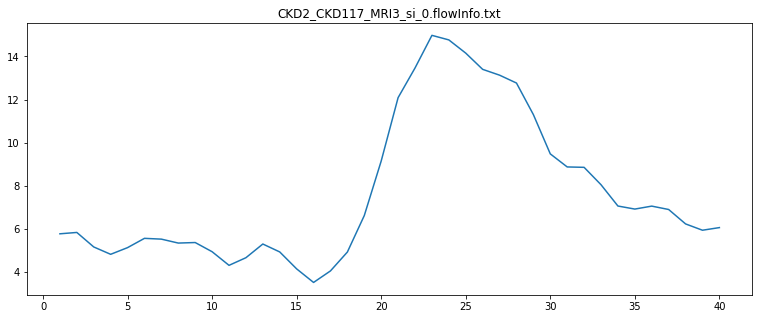

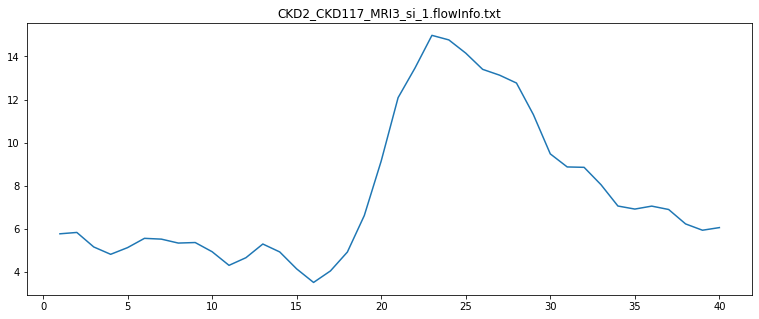

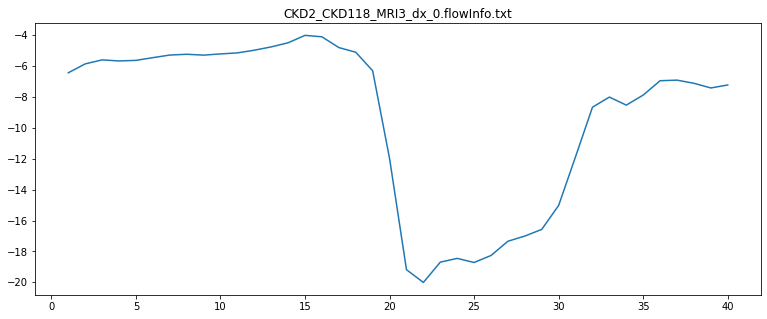

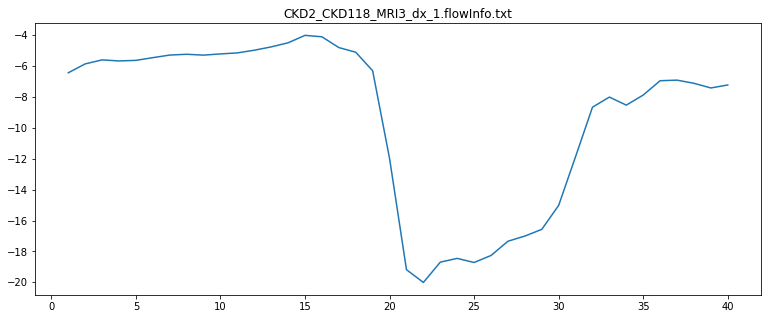

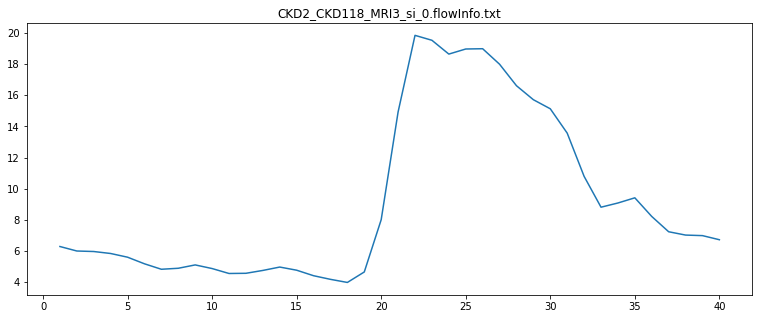

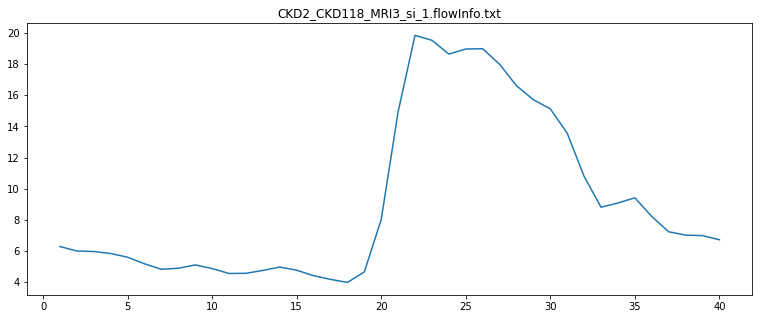

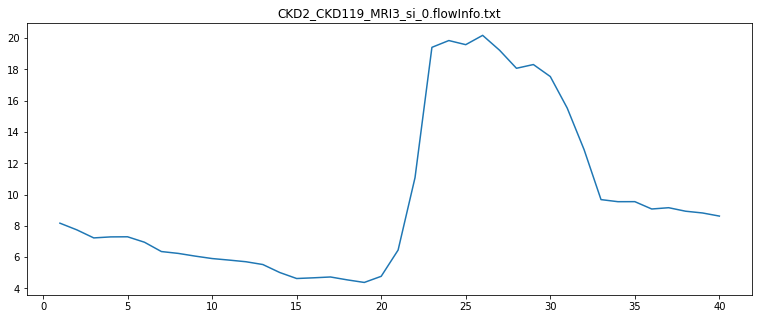

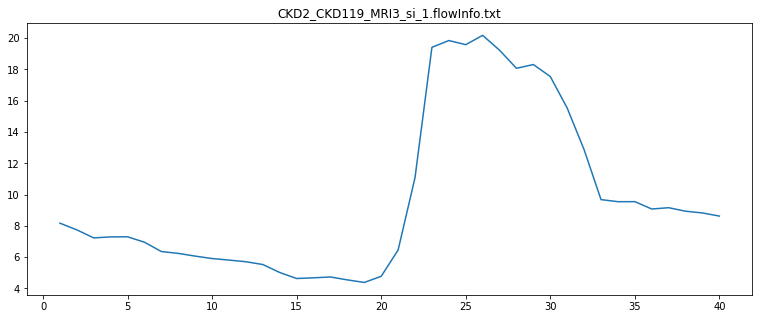

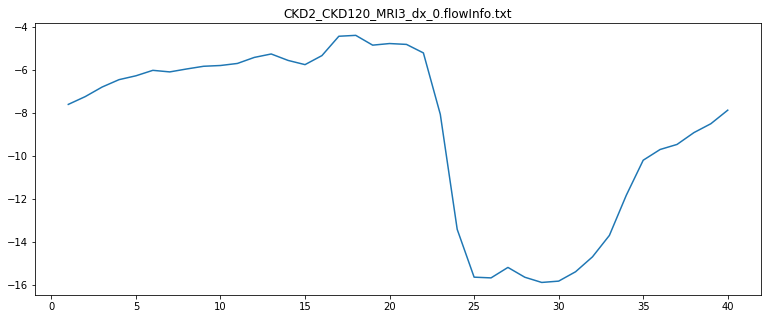

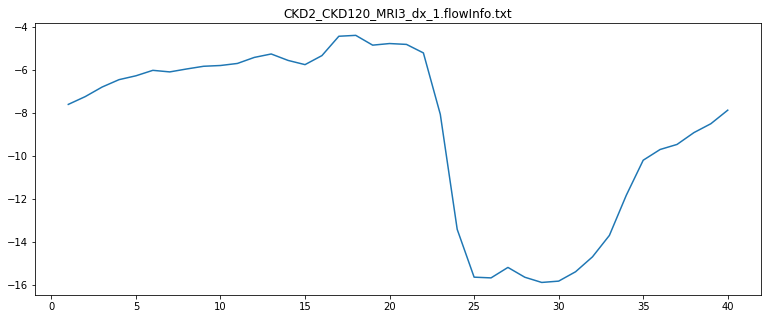

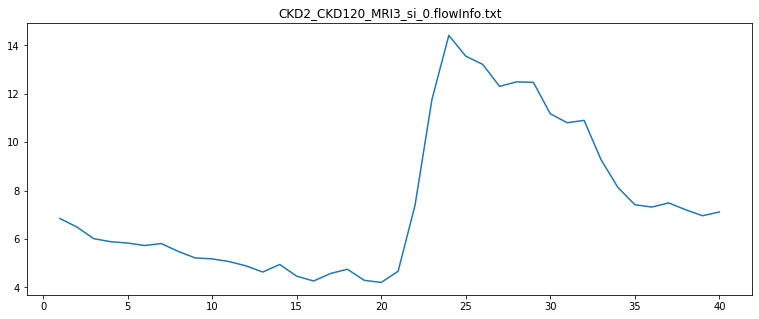

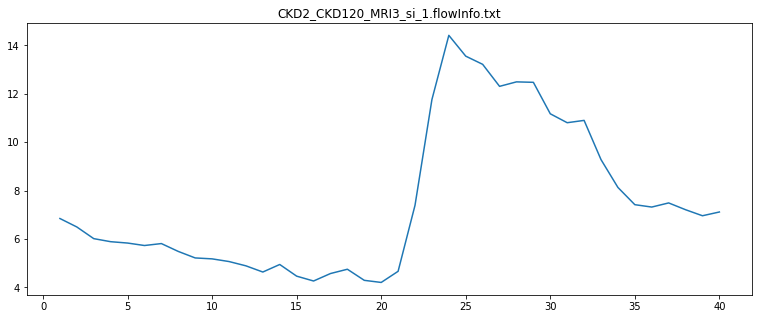

In [2]:
import matplotlib.pyplot as plt

import numpy as np

import vtk

import os

import sys

from vtk.util.numpy_support import numpy_to_vtk, vtk_to_numpy

import matplotlib.path as mplpath

from matContourToBinary import contour2mask

from flowInformation import FlowInfo


def readVTK(path, filename, order='F'):
                
    """
    Utility function to read vtk volume. 

    Params:

        - inherited from class (check at the beginning of the class)

        - path: path where VTK file is located

        - filename: VTK file name

    Returns:

        - numpy array

        - data origin

        - data spacing

    """

    reader = vtk.vtkStructuredPointsReader()

    reader.SetFileName(path + filename)

    reader.Update()

    image = reader.GetOutput()

    numpy_array = vtk_to_numpy(image.GetPointData().GetScalars())

    numpy_array = numpy_array.reshape(image.GetDimensions(),order='F')

    numpy_array = numpy_array.swapaxes(0,1)

    origin = list(image.GetOrigin())

    spacing = list(image.GetSpacing())

    return numpy_array, origin, spacing



def array2vtk(array, filename, dest_path, origin = [0,0,0], spacing = [1,1,1]):
                
    """
    Convert array into .vtk file

    - Params:

        inherited class parameters (see description at beginning of the class)

        array: array to be converted into .vtk file

        filename: filename with which to save array as VTK file

        origin: origin of coordinate system, by default (0,0,0)

        spacing: spacing of coordinate system, by default (1,1,1)

    """

    vtk_writer = vtk.vtkStructuredPointsWriter()


    # Check if destination folder exists

    #print('Checking if destination folder exists\n')

    isdir = os.path.isdir(dest_path)

    if not isdir:

        os.makedirs(dest_path)

        print('Non-existing destination path. Created\n')

    # Check if files already exist in destination folder

    exist = filename in os.listdir(dest_path)

    overwrite = 'y'

    if exist:

        overwrite = input("File is already in folder. Do you want to overwrite? [y/n]\n")

    if overwrite == 'y' or overwrite == 'Y':

        vtk_writer.SetFileName(dest_path + filename)

        vtk_im = vtk.vtkStructuredPoints()

        vtk_im.SetDimensions((array.shape[1],array.shape[0],array.shape[2]))

        vtk_im.SetOrigin(origin)

        vtk_im.SetSpacing(spacing)

        pdata = vtk_im.GetPointData()

        vtk_array = numpy_to_vtk(array.swapaxes(0,1).ravel(order='F'),deep = 1, array_type=vtk.VTK_FLOAT)

        pdata.SetScalars(vtk_array)

        vtk_writer.SetFileType(vtk.VTK_BINARY)

        vtk_writer.SetInputData(vtk_im)

        vtk_writer.Update()

        #print('VTK file saved successfully!\n')

    else:
        print('\nOperation aborted\n')
        
        
study = 'CKD2'
        
dest_path = '/home/andres/Documents/_Data/CKD_Part2/Råden_Segm/NewSegmentations/' # Folder for ground truths

gt_path = '/home/andres/Documents/_Data/CKD_Part2/Råden_Segm/QFlow/'

txt_files = sorted(os.listdir(dest_path))

for txt_file in txt_files:
    
    if 'txt' in txt_file:
        
        load_info_mat = FlowInfo(study, dest_path, None, None, 'load', True, txt_file)

        mean_v, std_v, max_v, min_v, energy, area, net_flow, pos_flow, neg_flow = load_info_mat.__main__()
        
        plt.figure(figsize = (13,5))
        
        plt.plot(np.arange(1,len(net_flow) + 1), net_flow), plt.title(txt_file)

/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


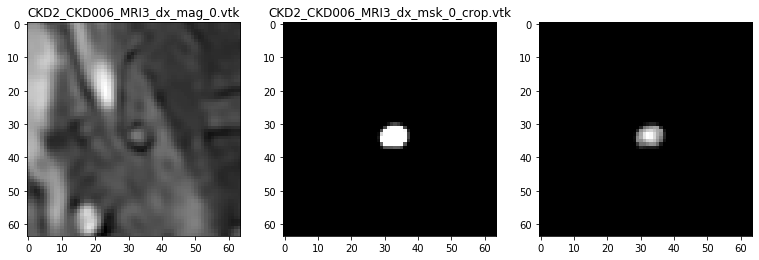

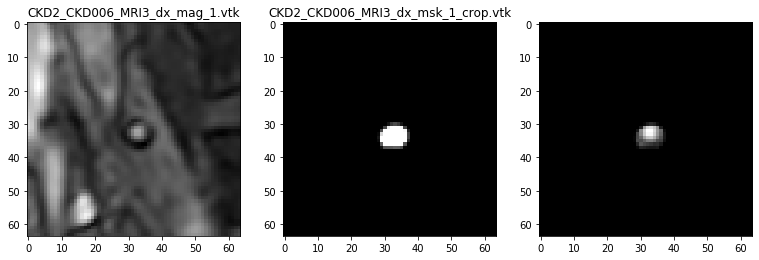

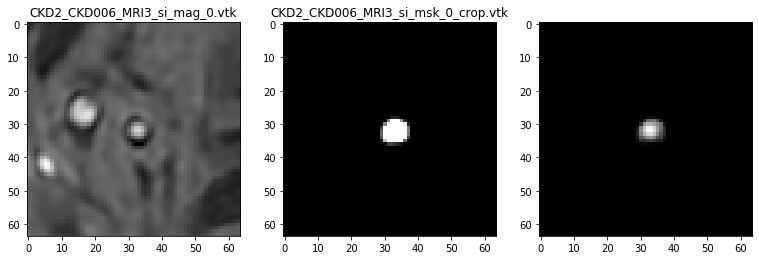

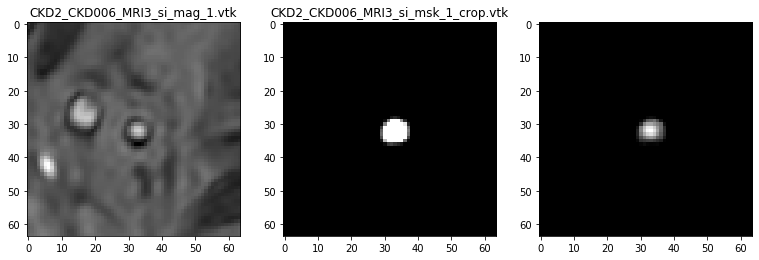

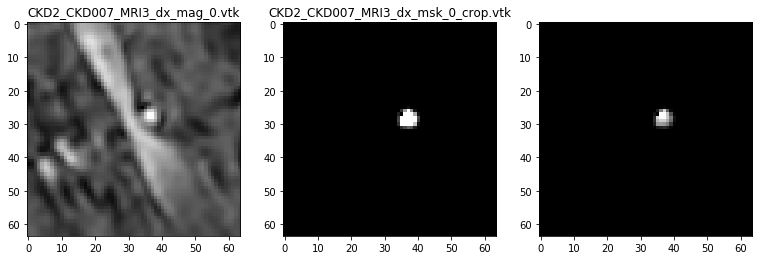

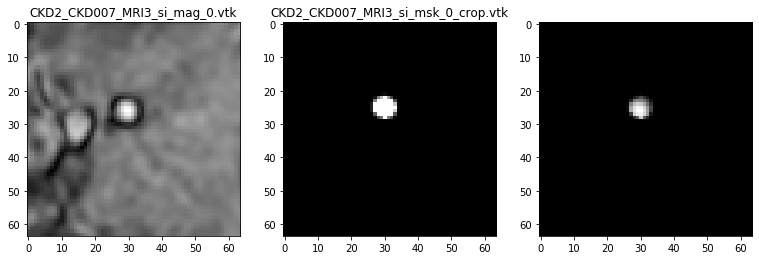

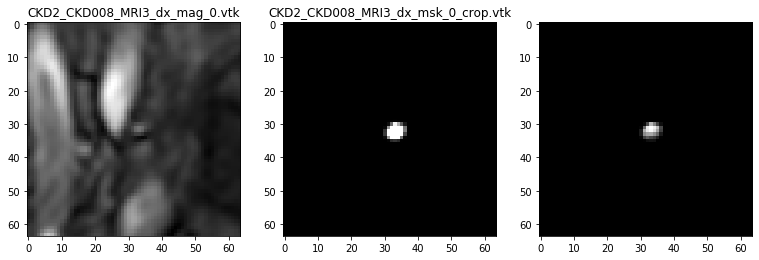

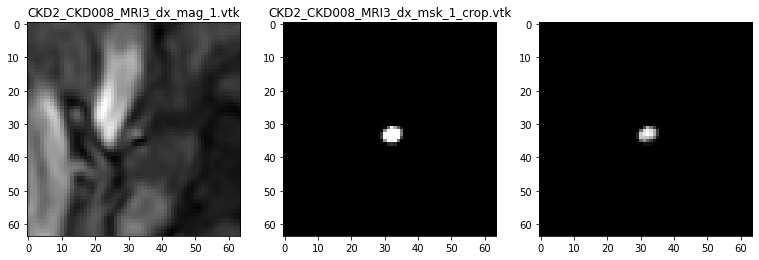

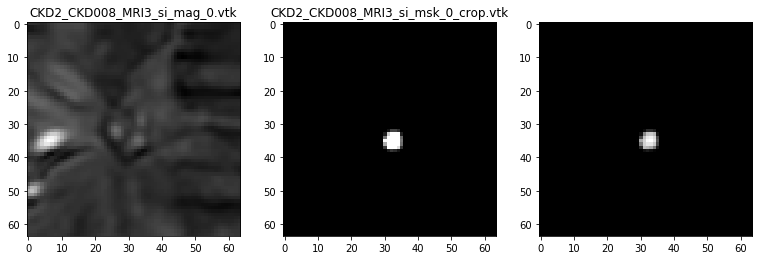

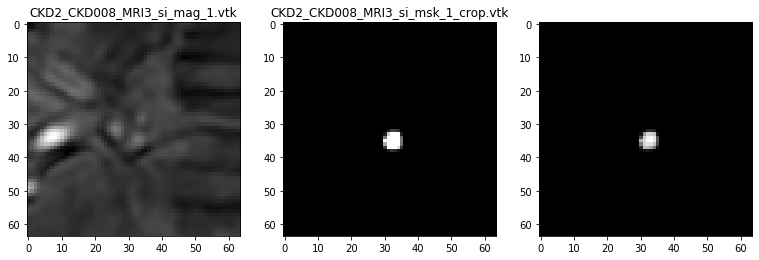

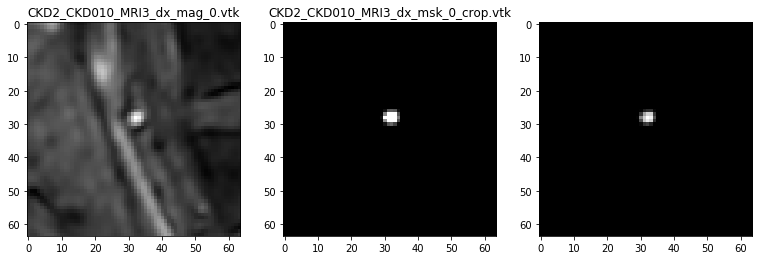

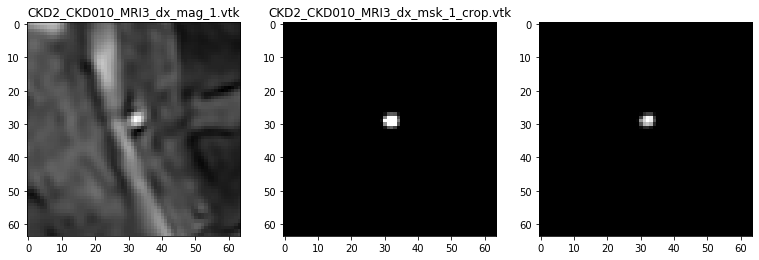

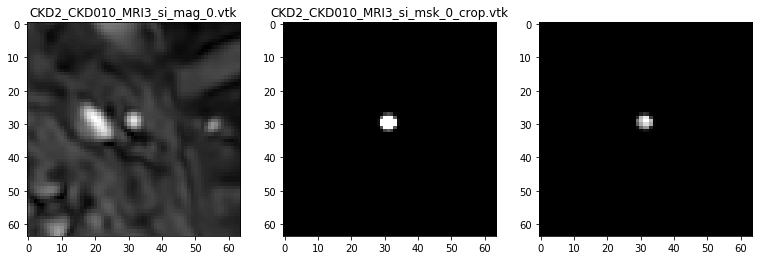

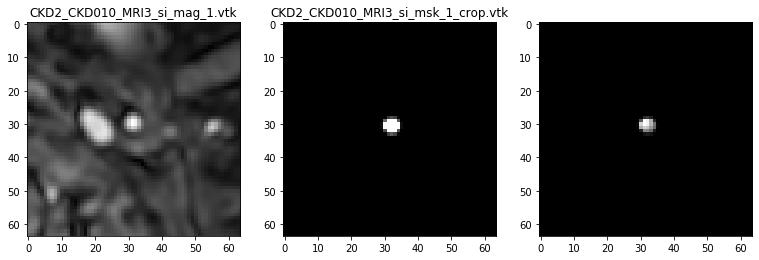

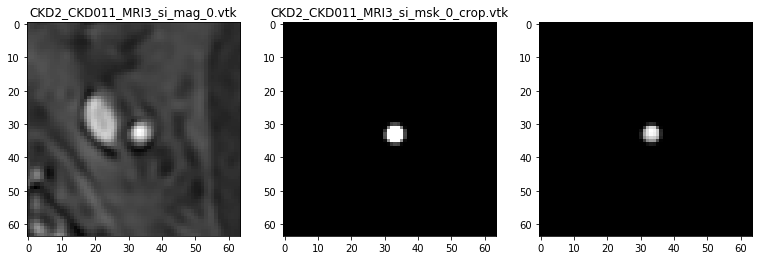

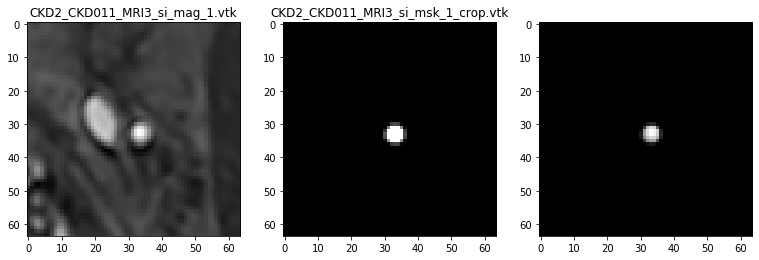

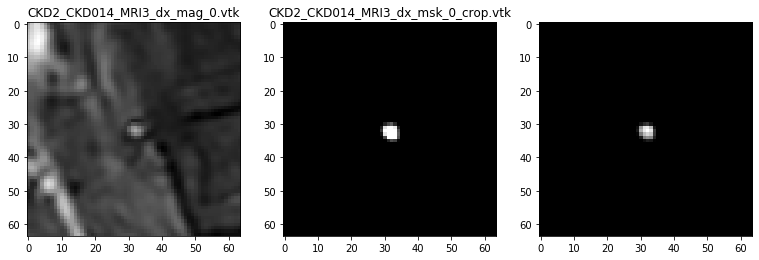

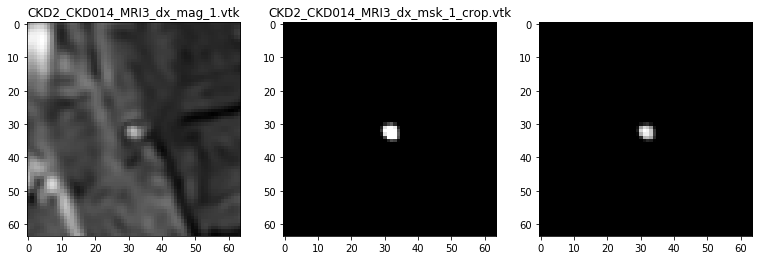

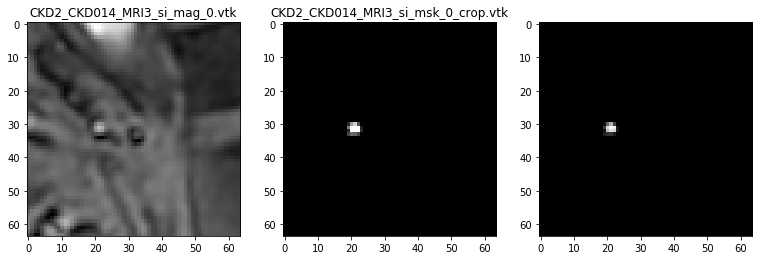

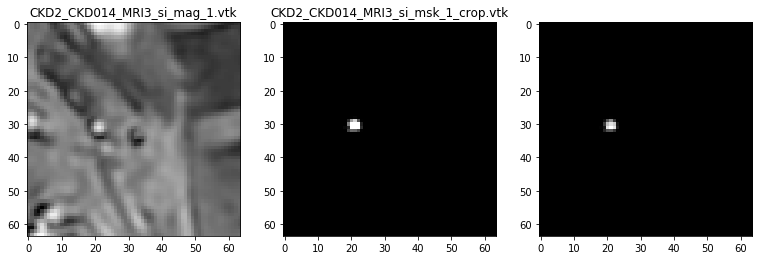

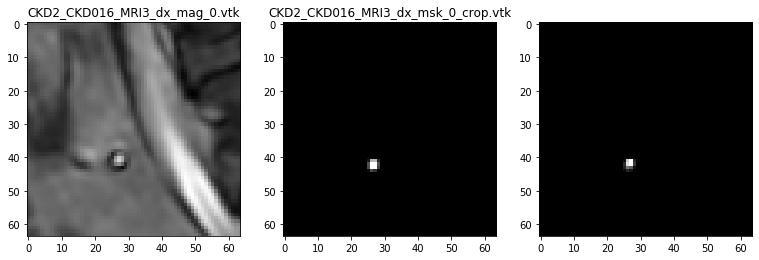

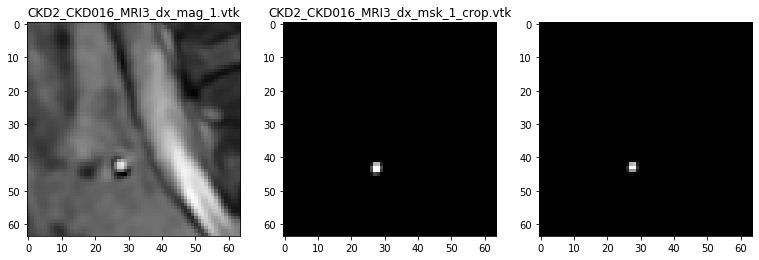

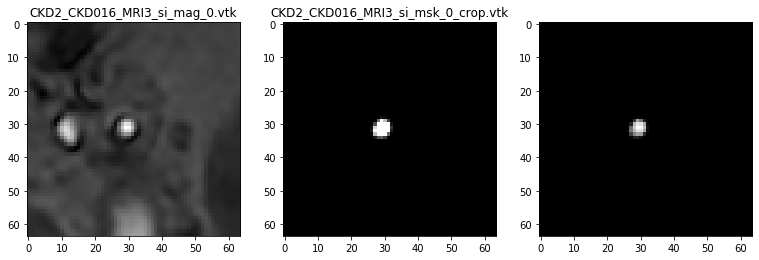

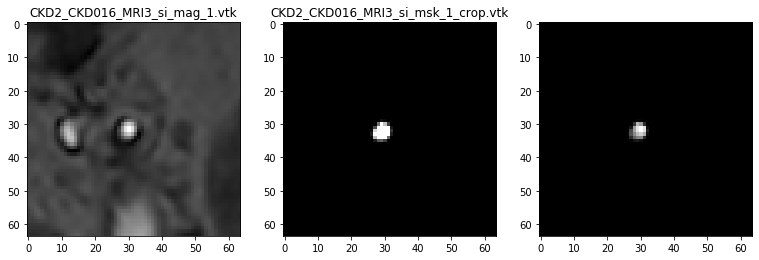

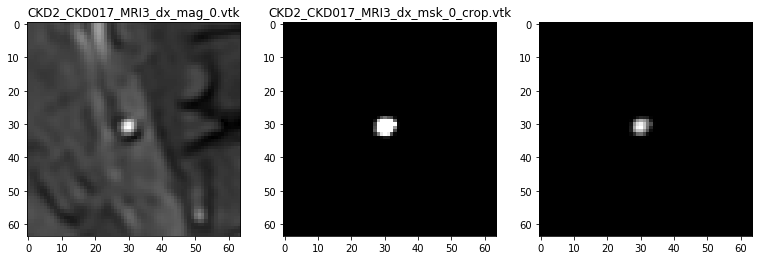

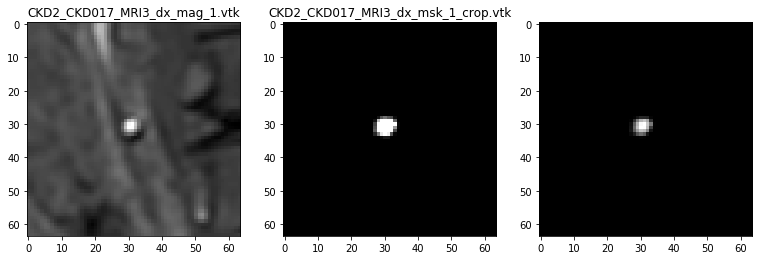

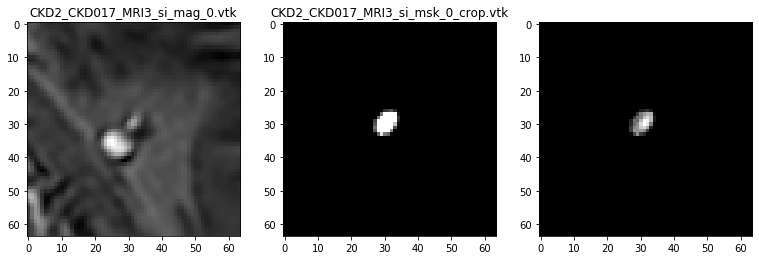

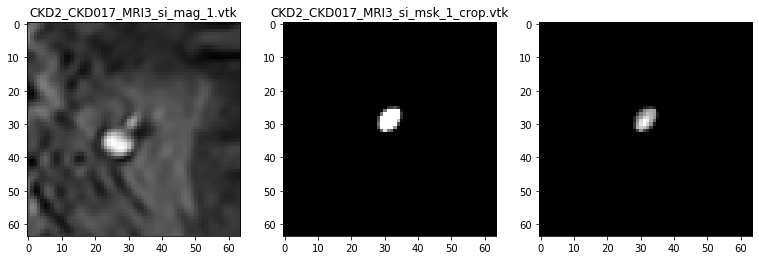

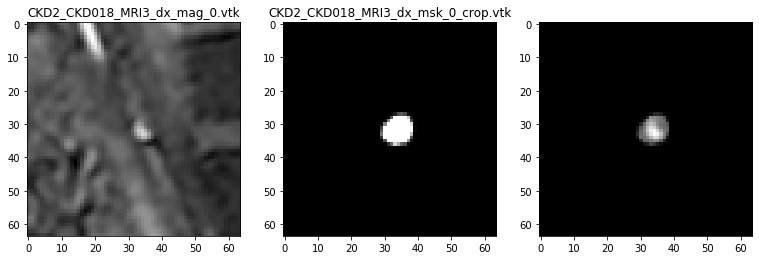

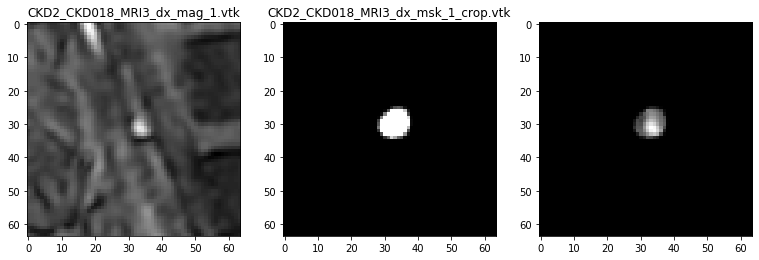

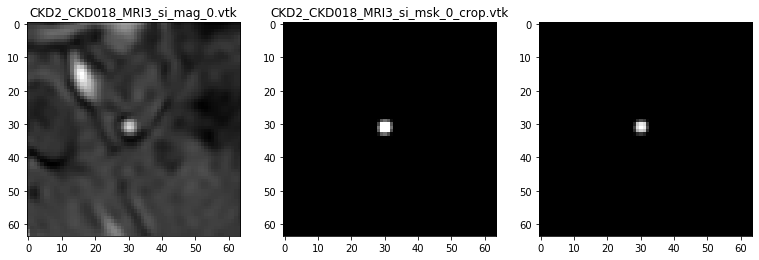

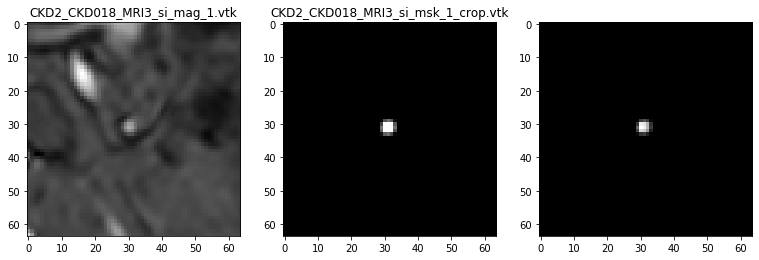

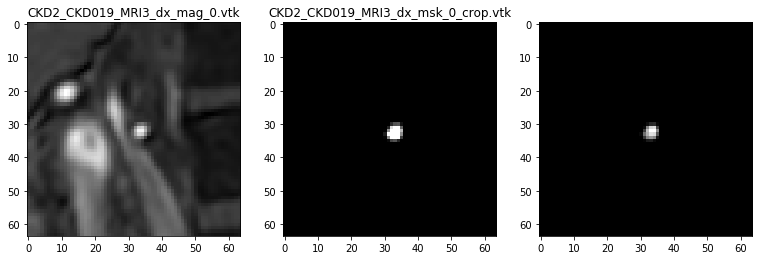

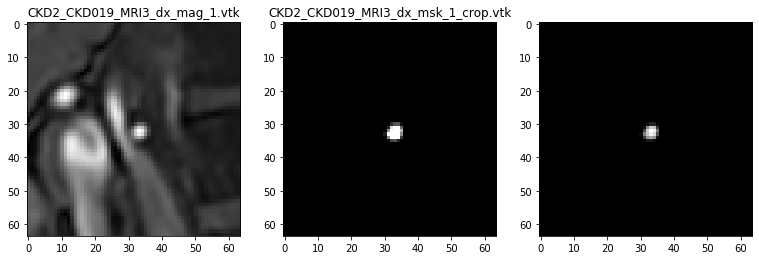

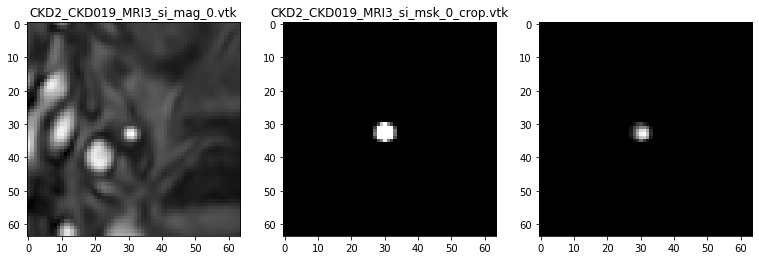

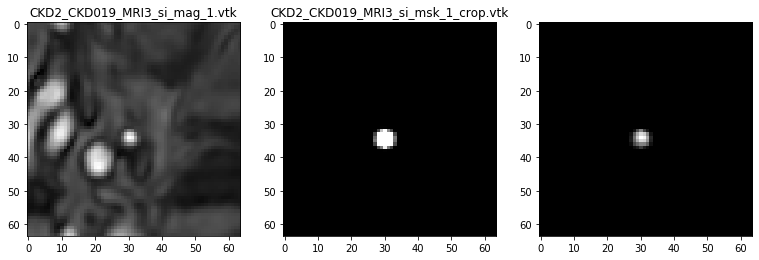

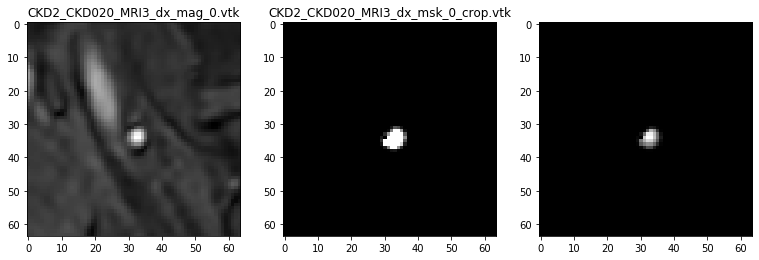

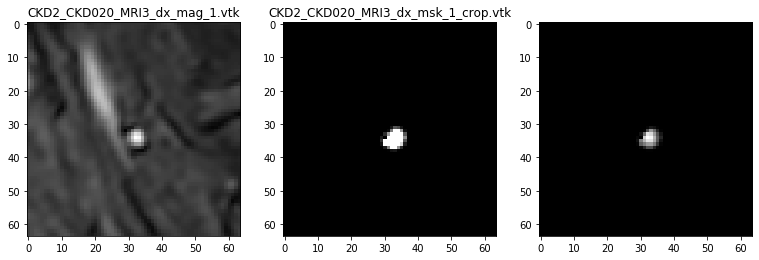

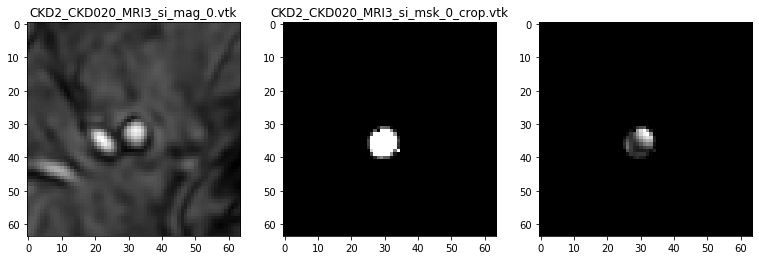

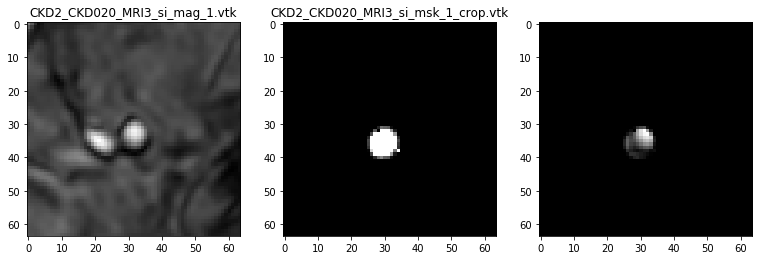

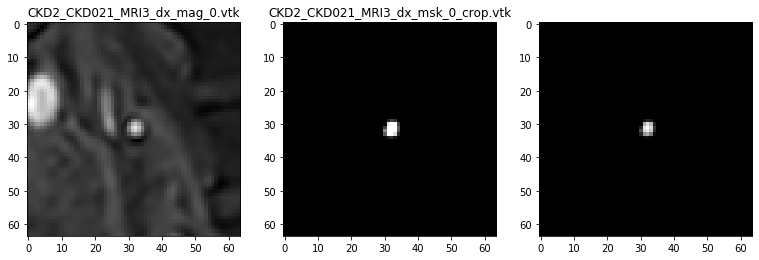

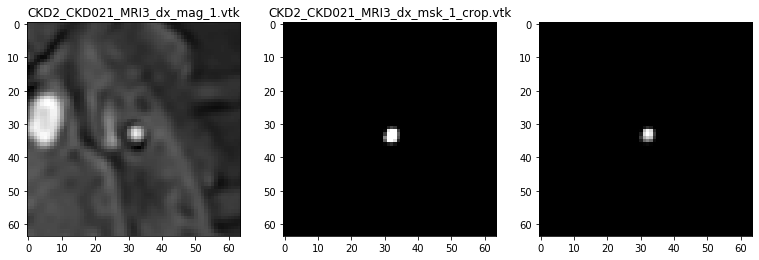

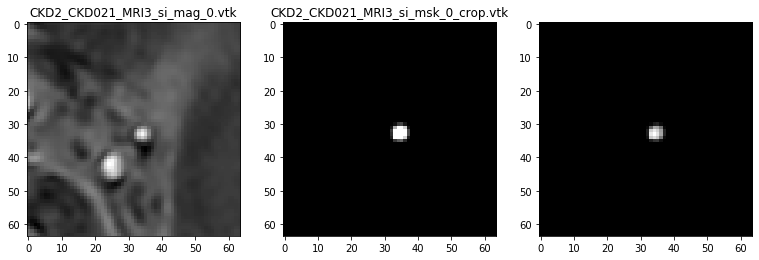

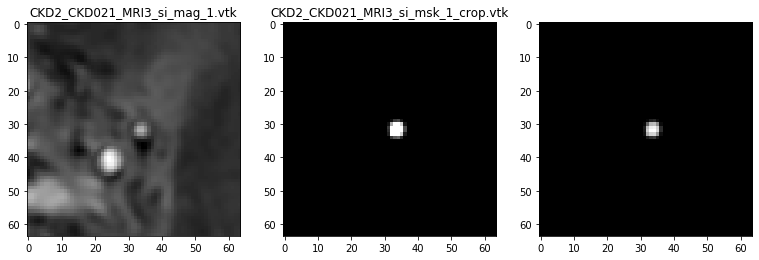

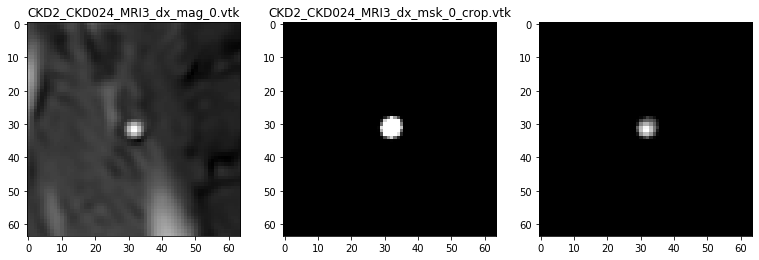

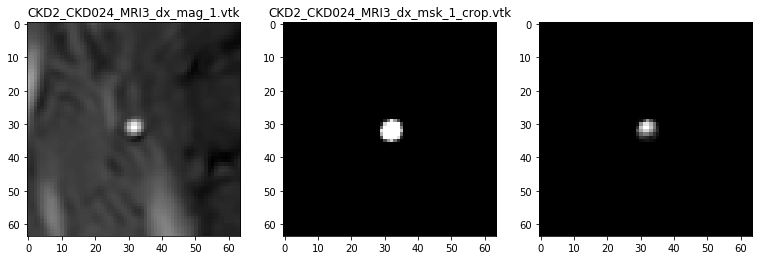

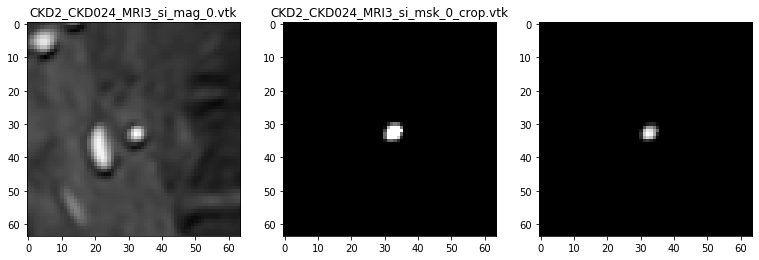

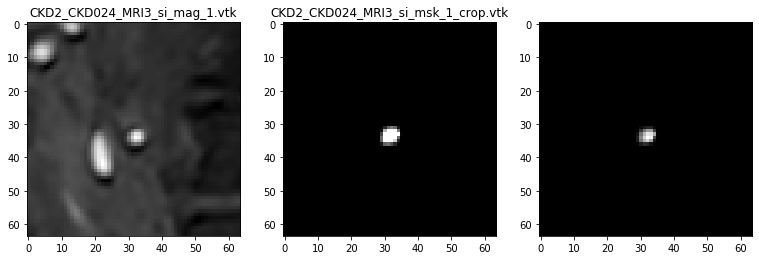

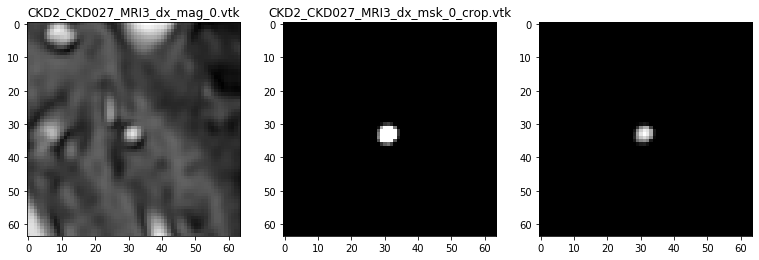

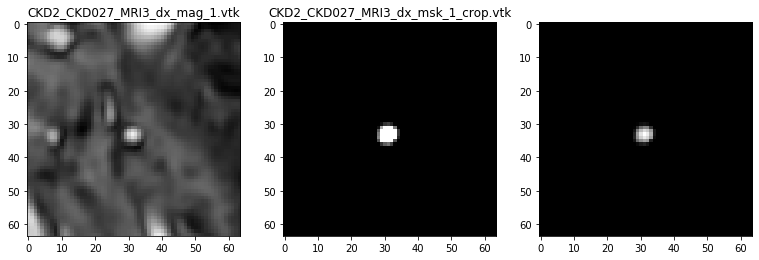

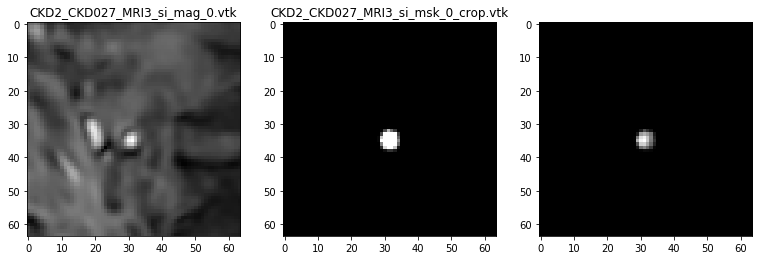

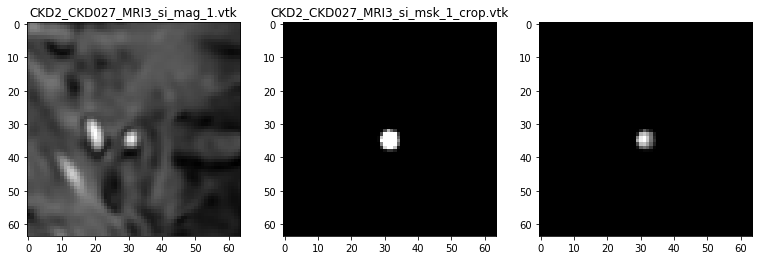

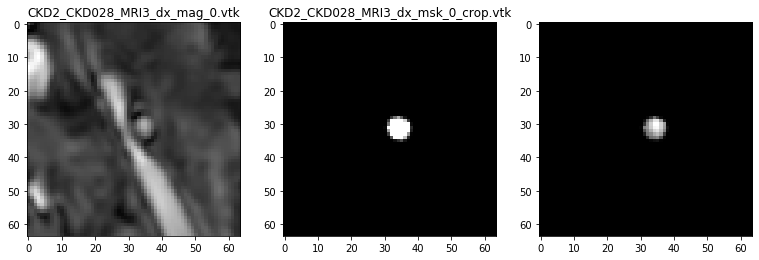

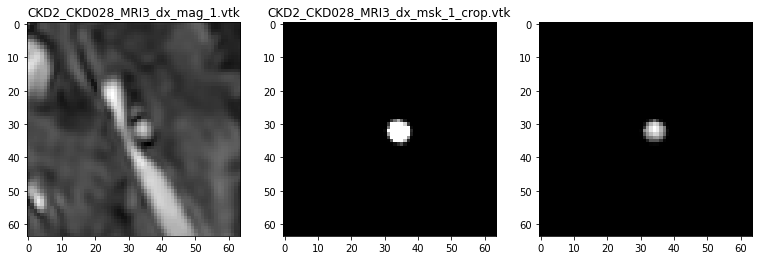

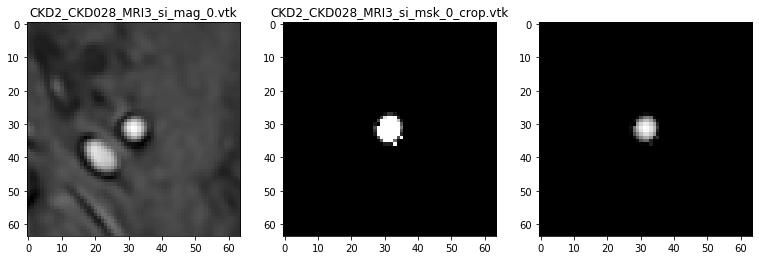

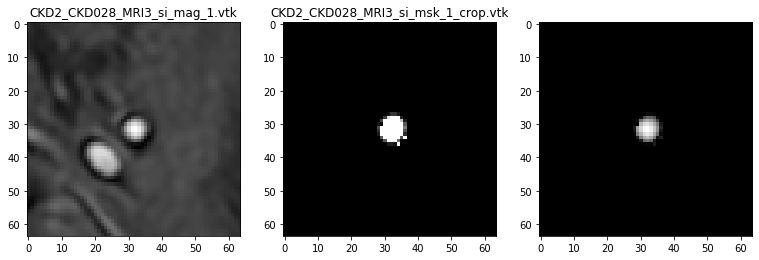

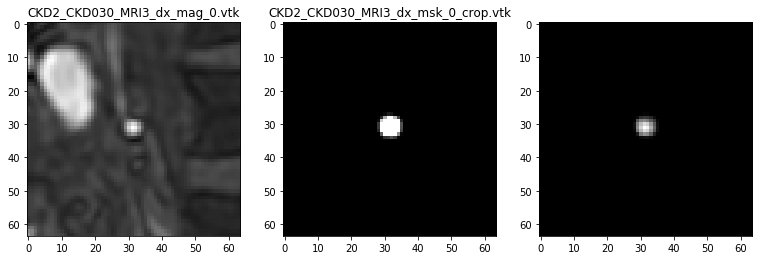

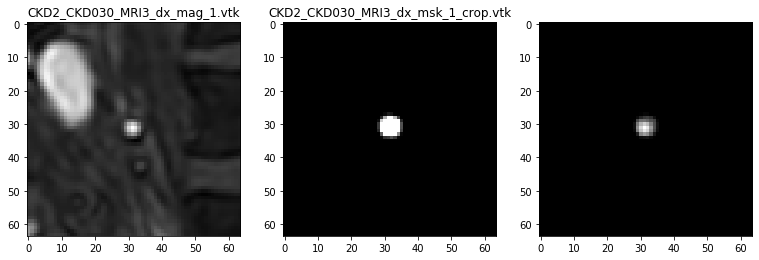

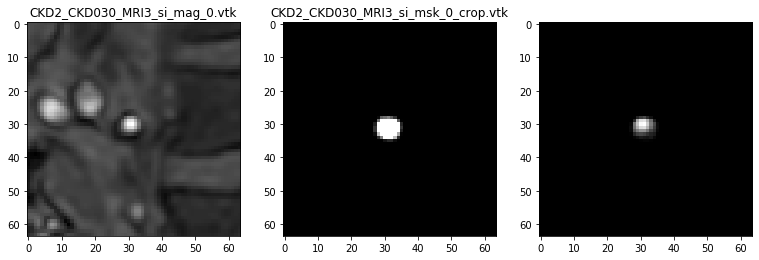

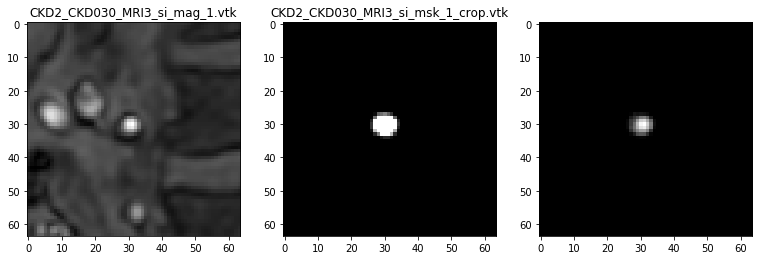

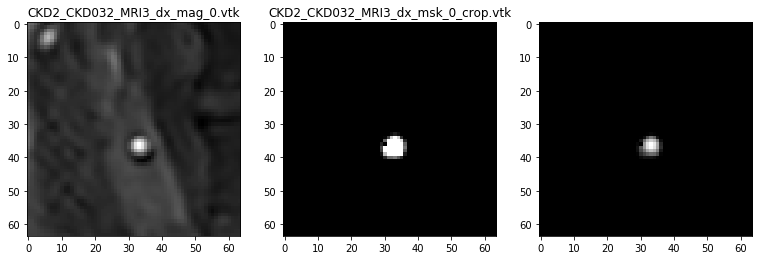

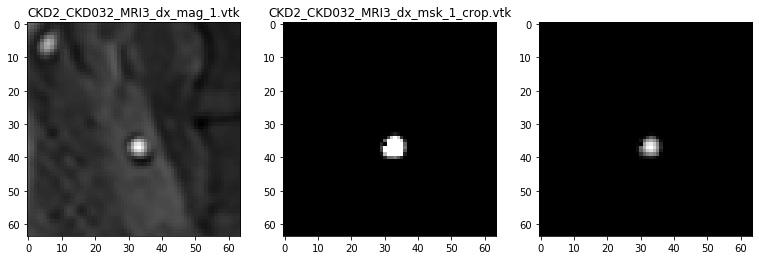

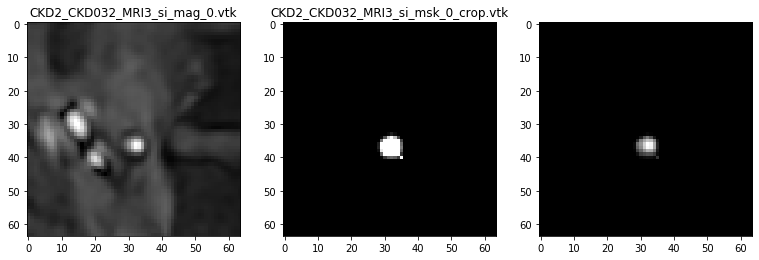

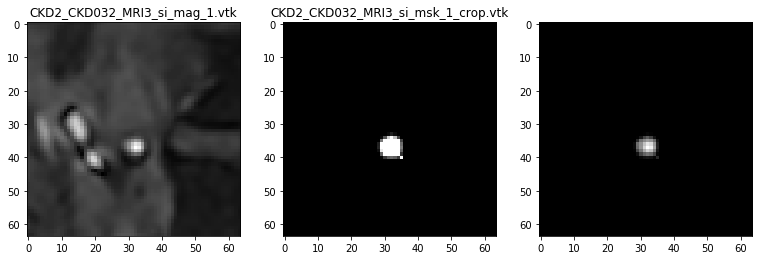

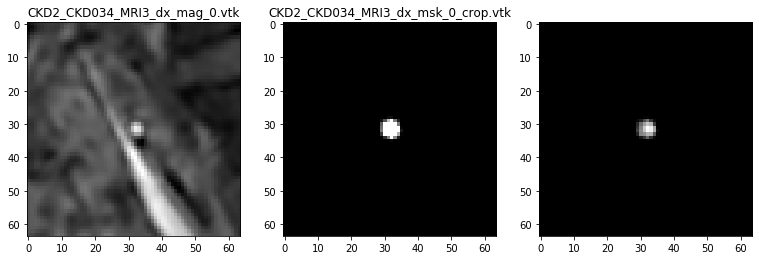

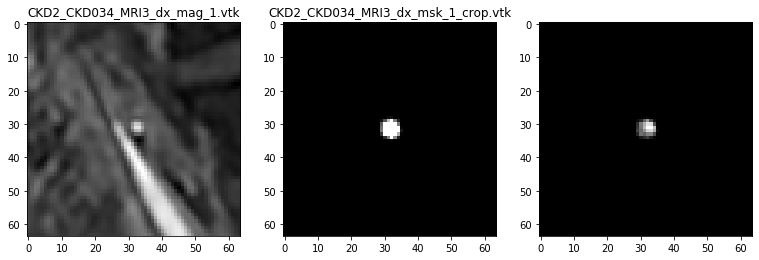

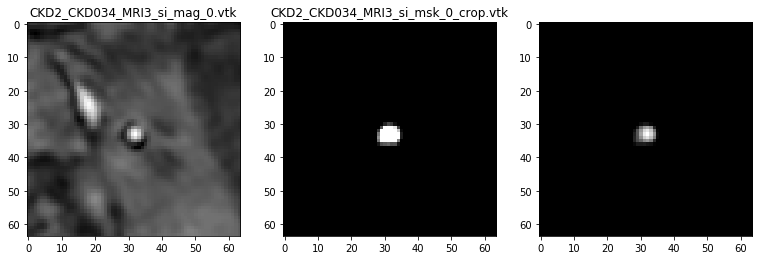

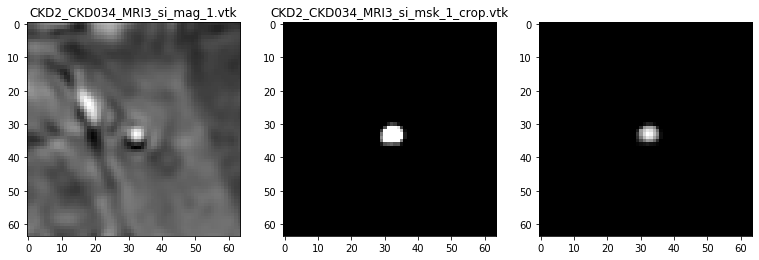

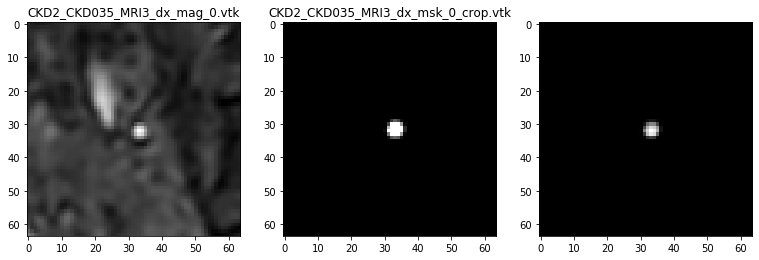

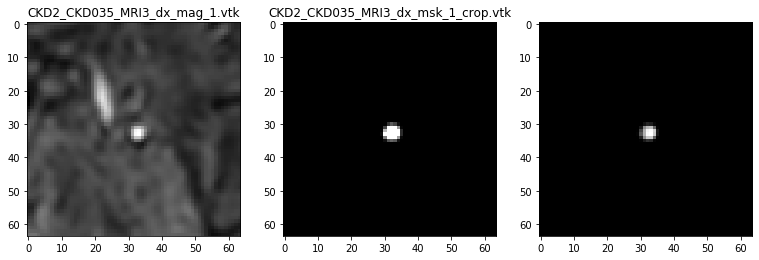

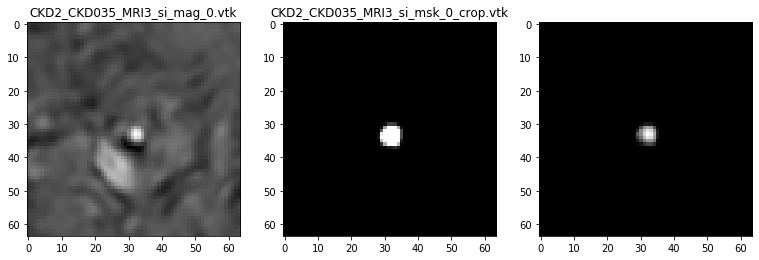

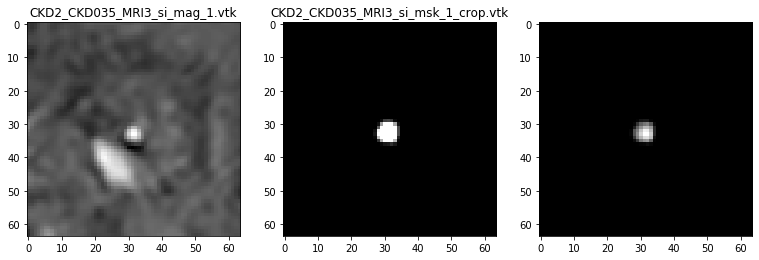

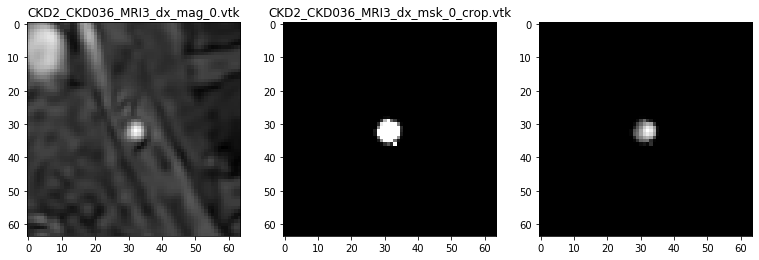

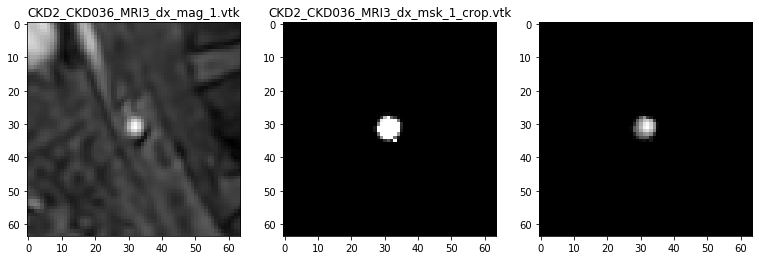

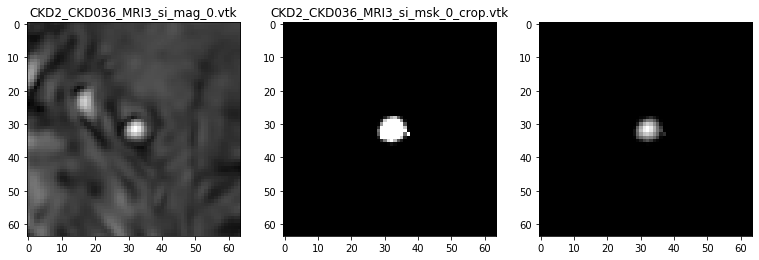

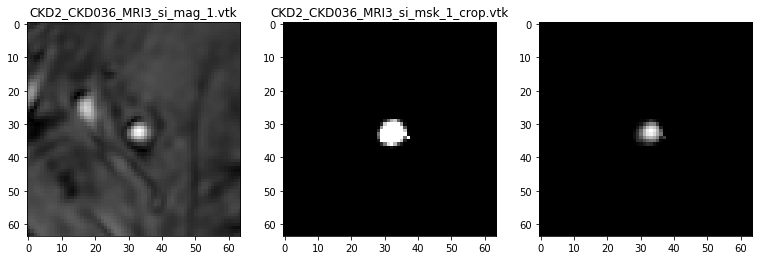

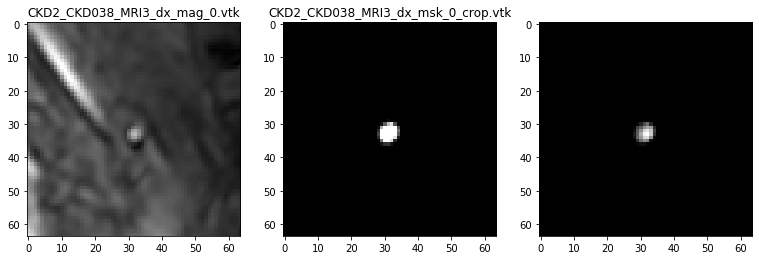

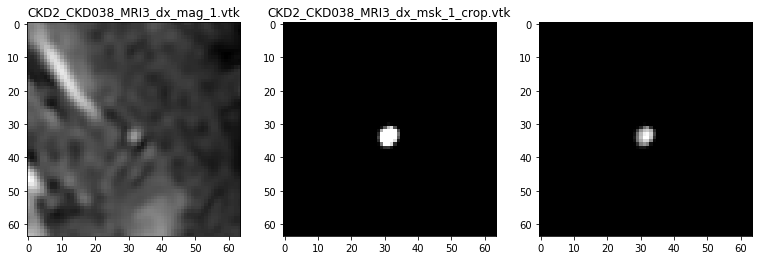

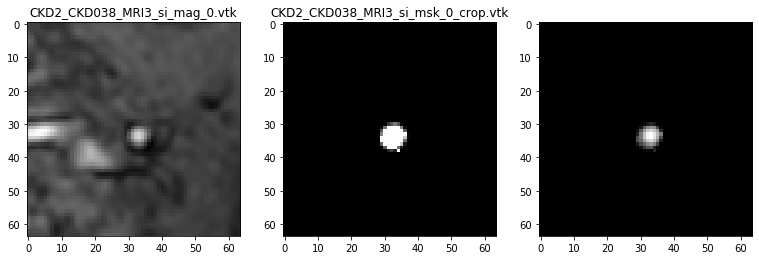

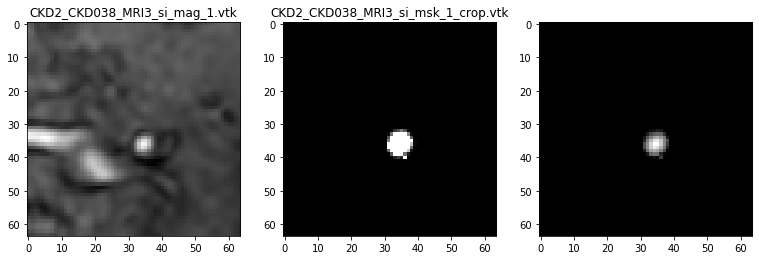

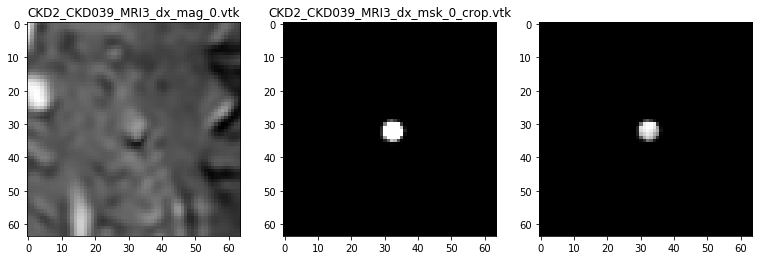

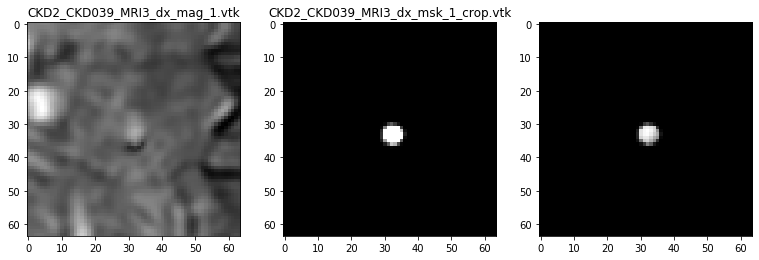

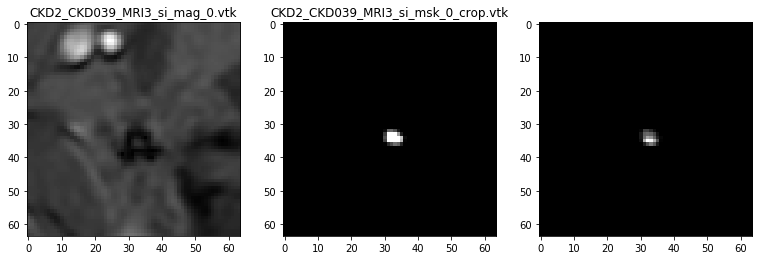

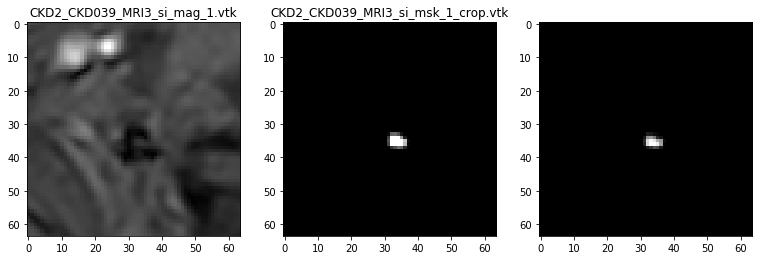

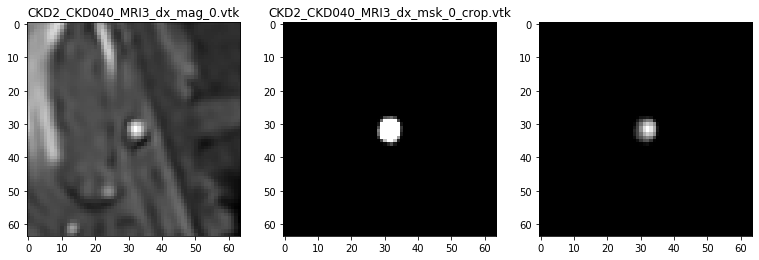

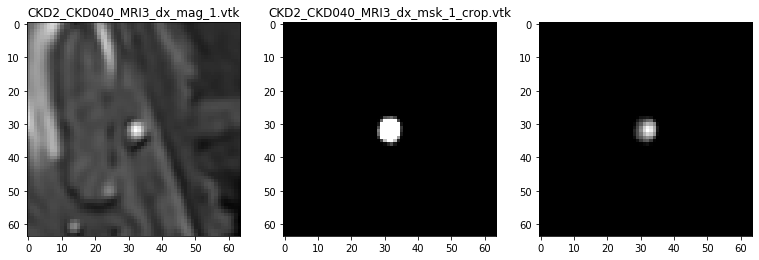

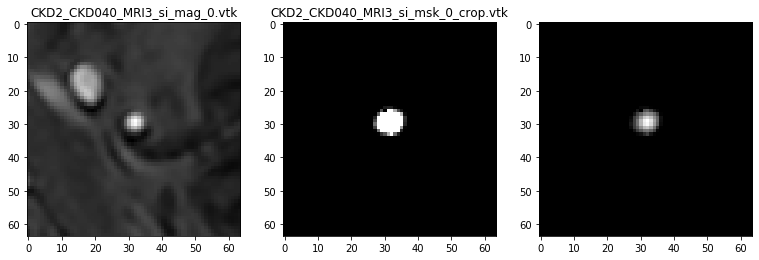

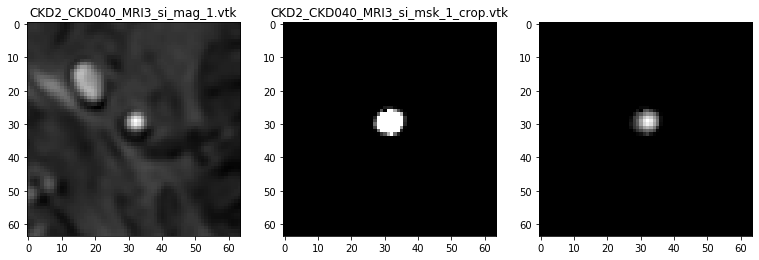

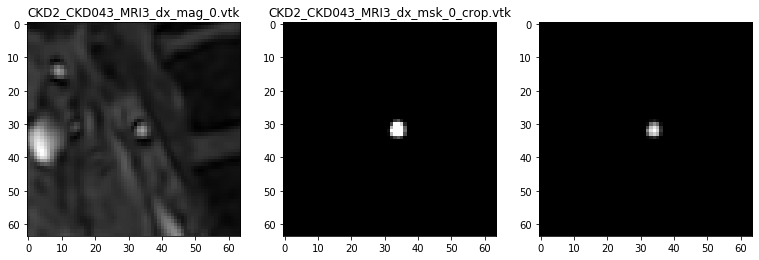

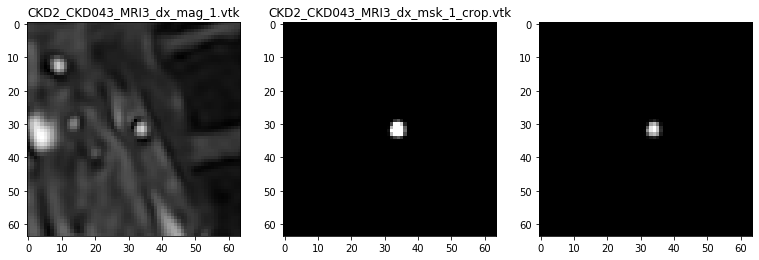

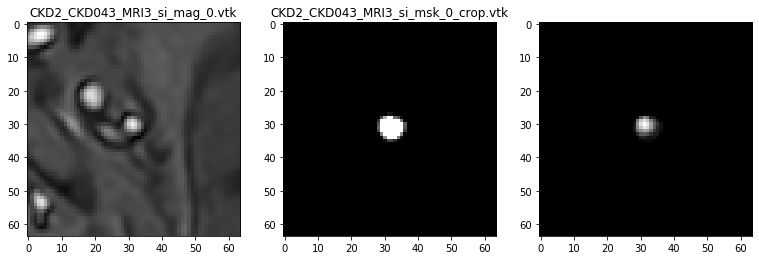

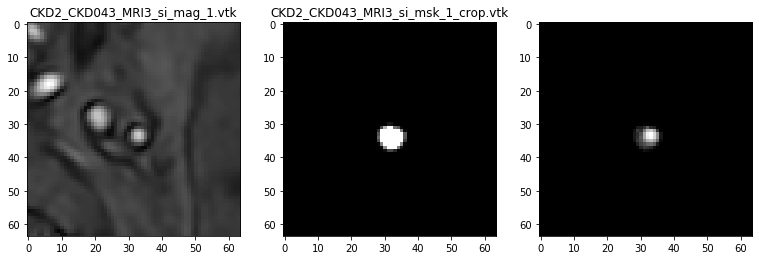

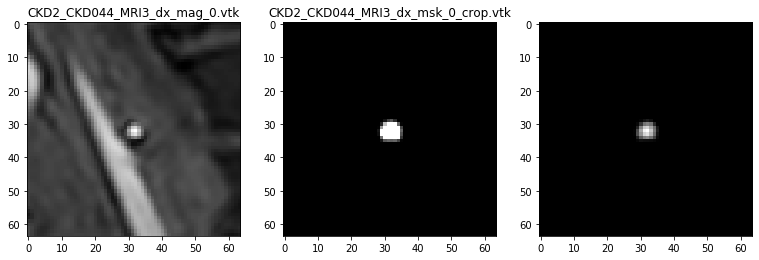

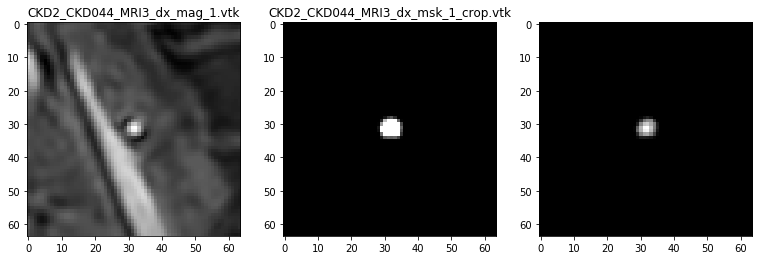

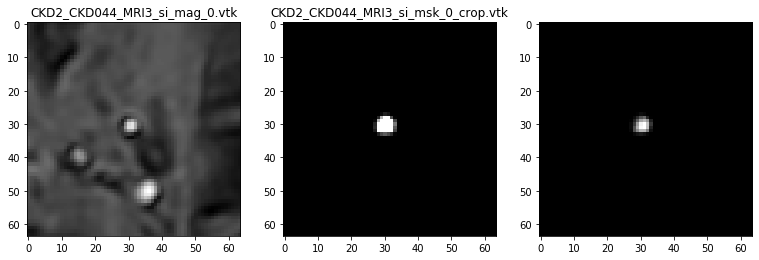

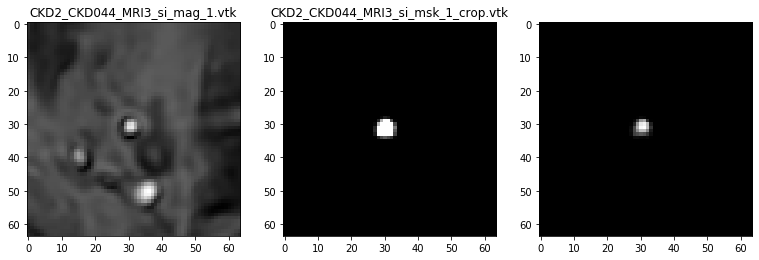

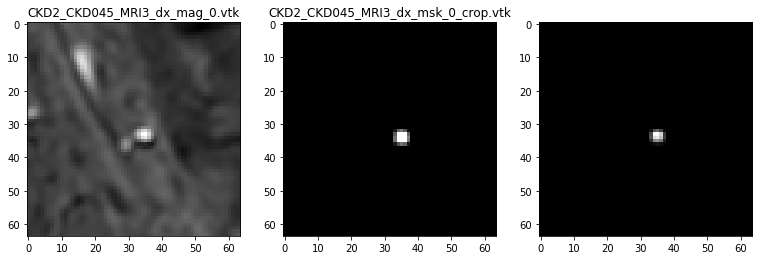

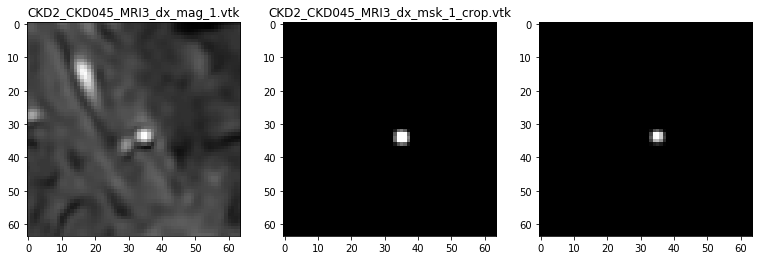

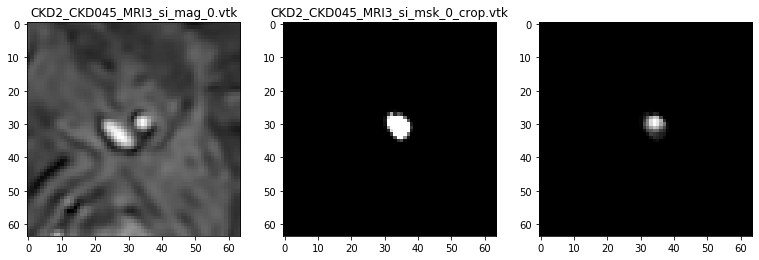

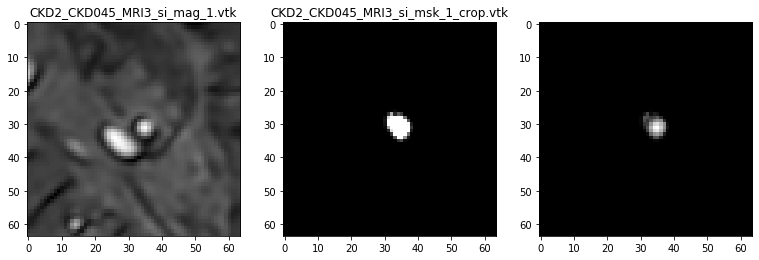

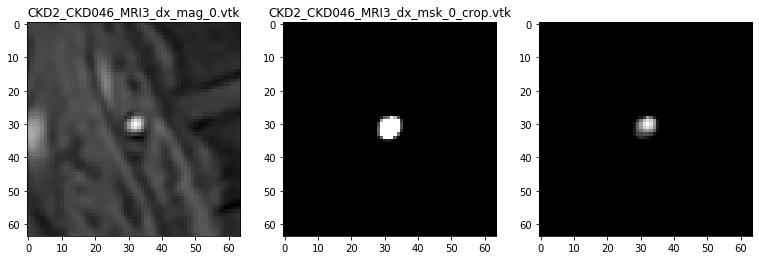

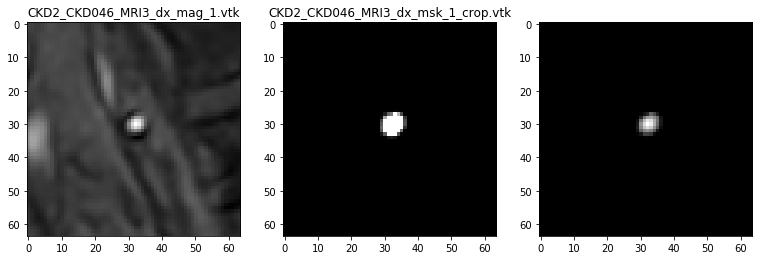

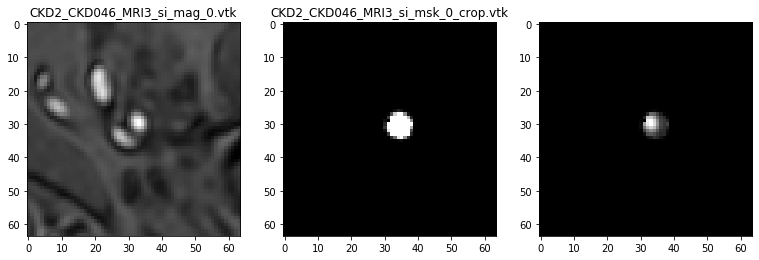

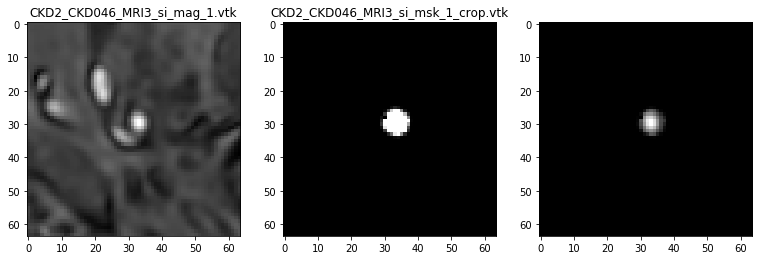

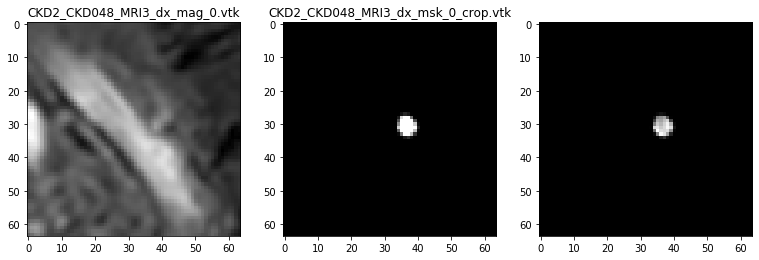

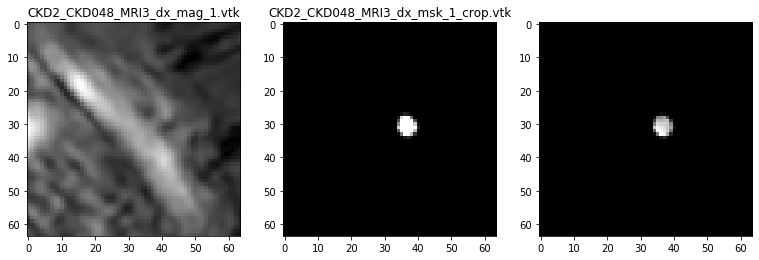

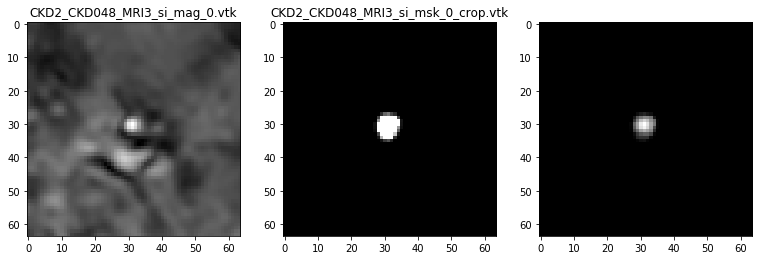

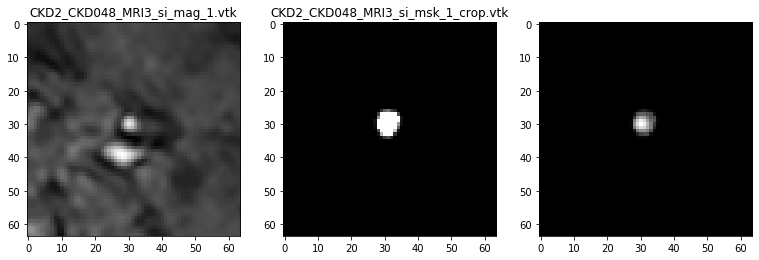

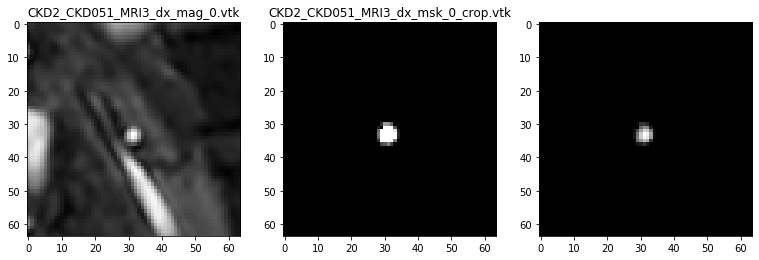

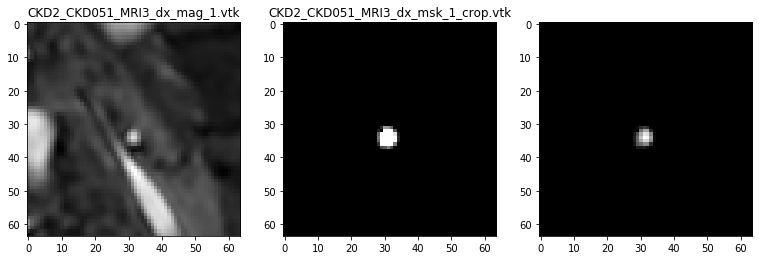

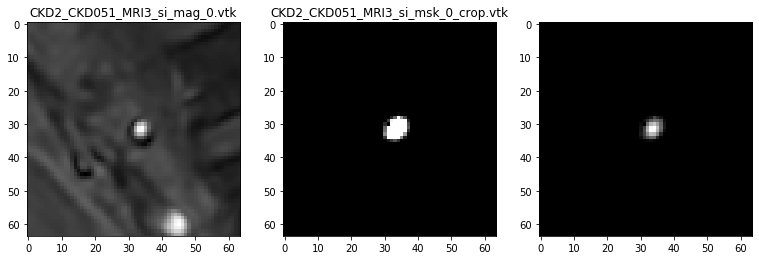

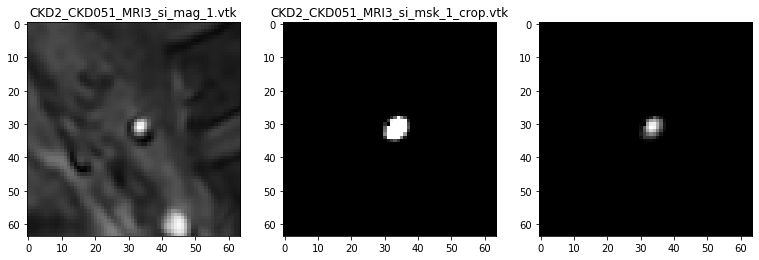

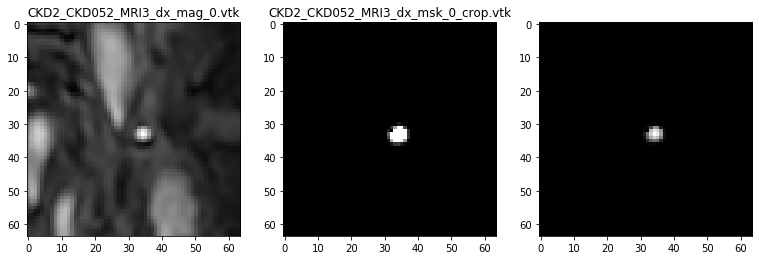

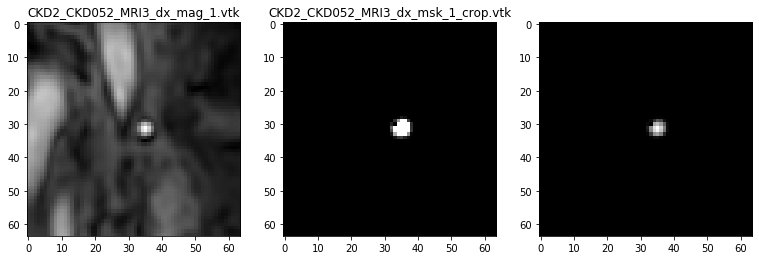

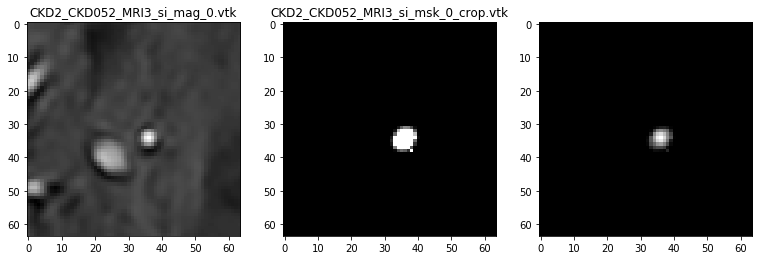

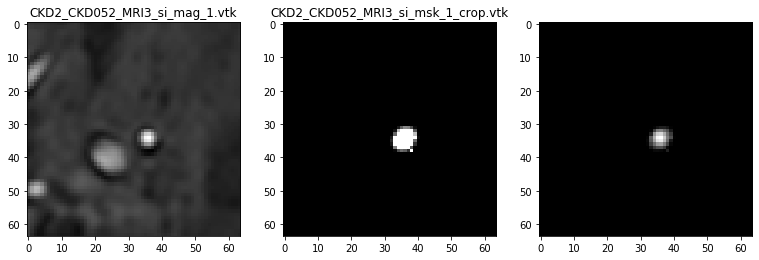

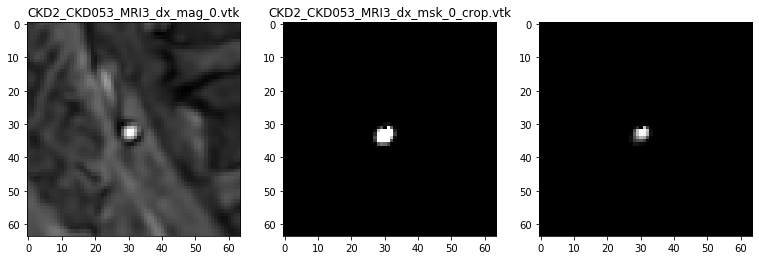

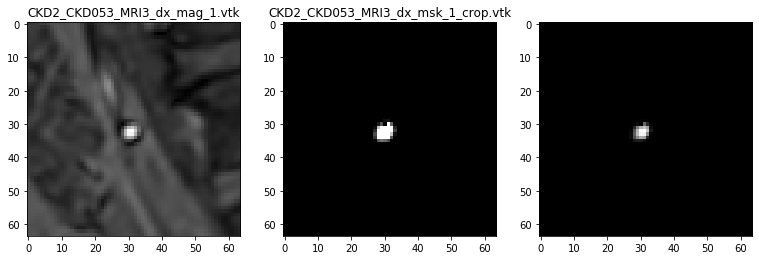

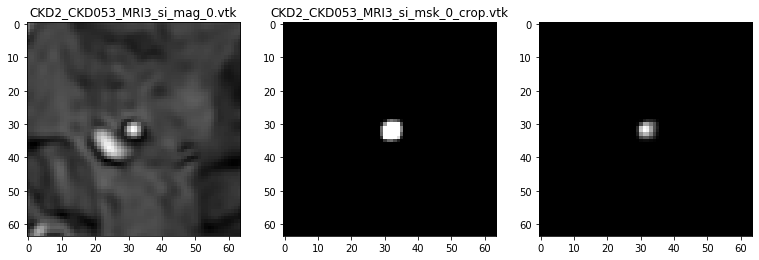

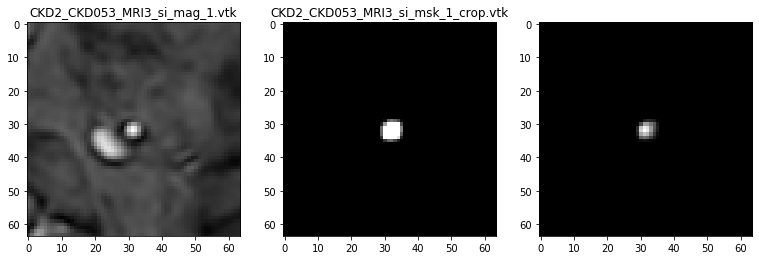

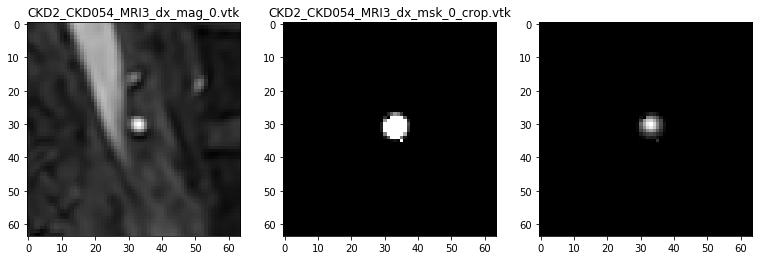

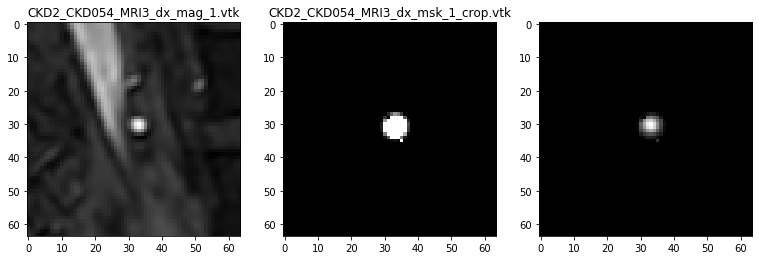

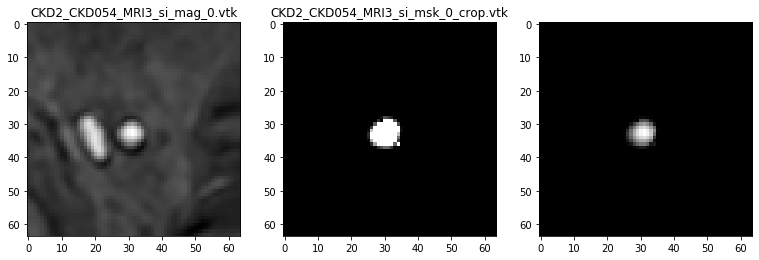

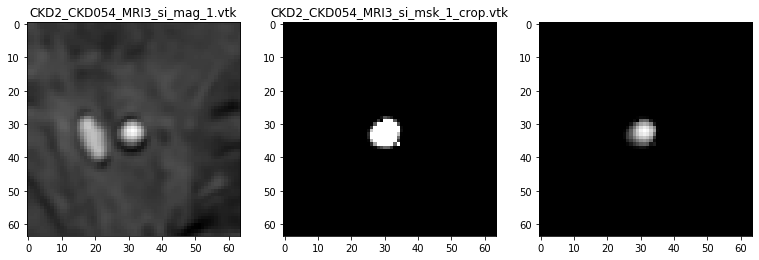

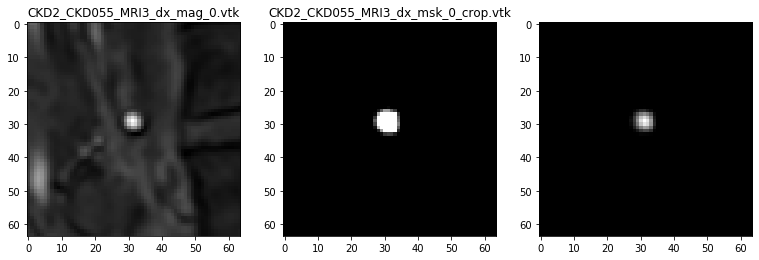

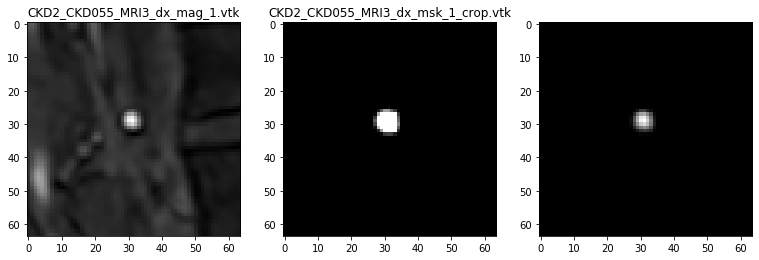

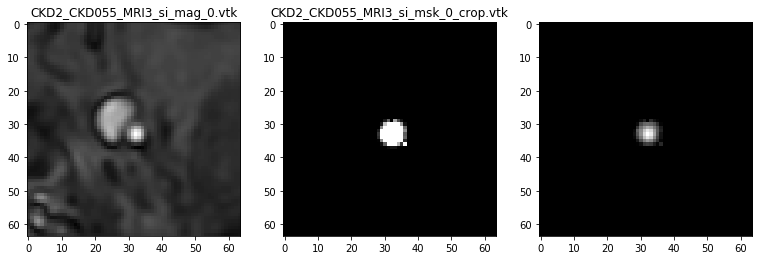

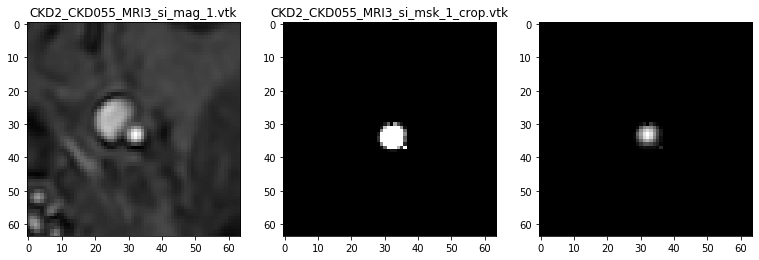

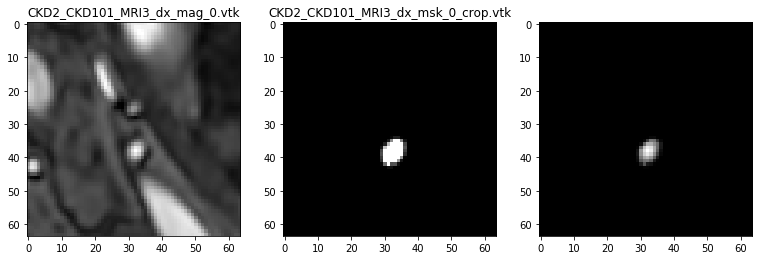

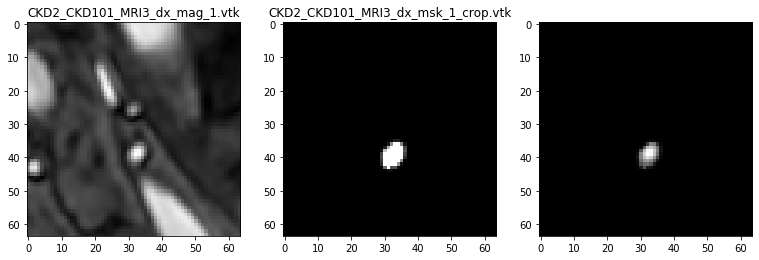

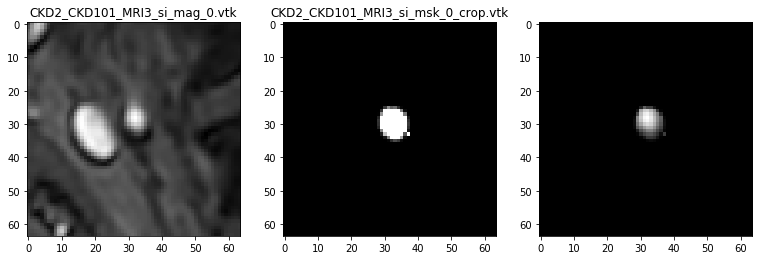

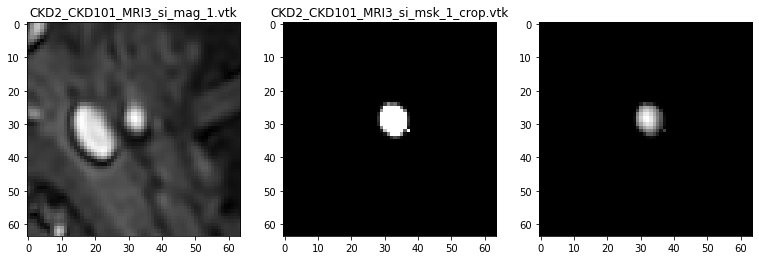

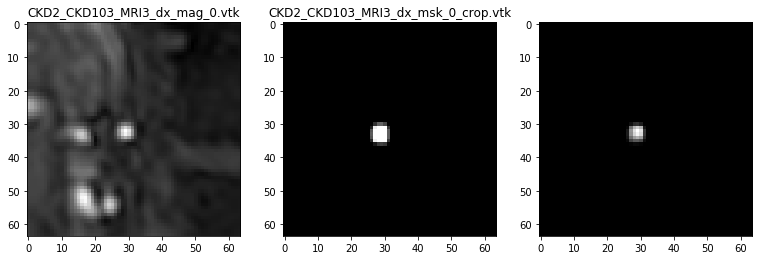

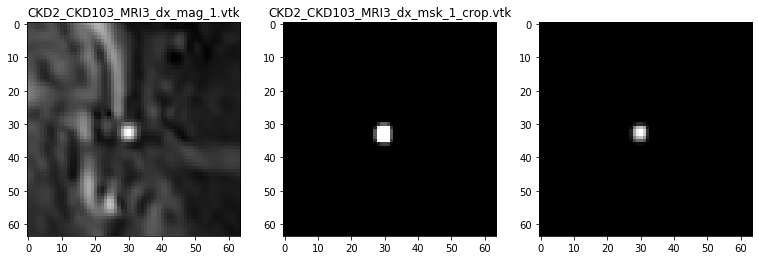

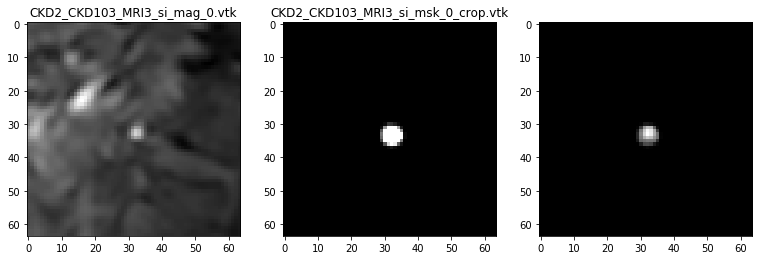

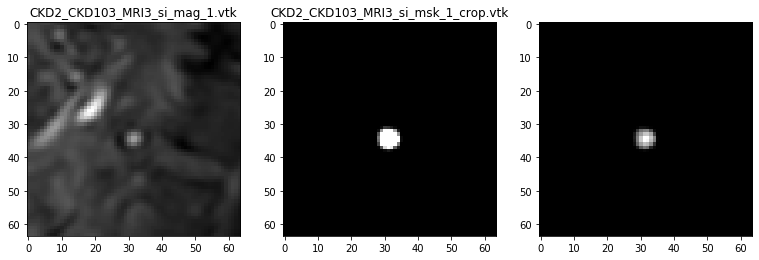

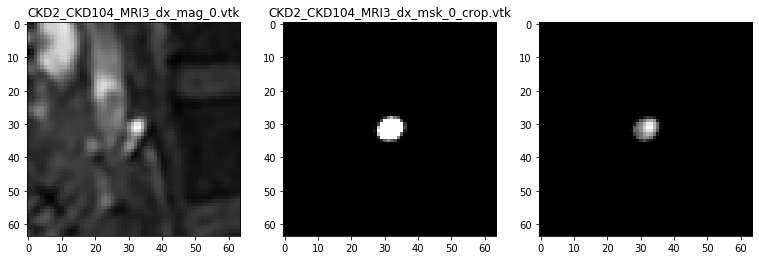

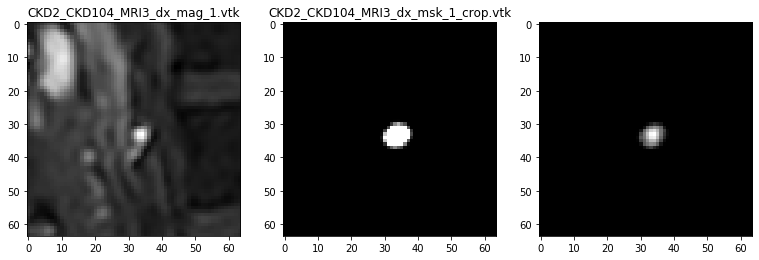

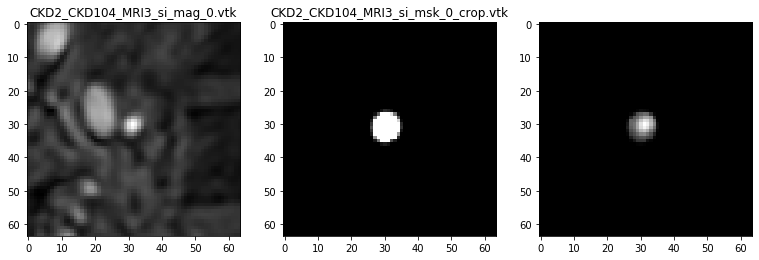

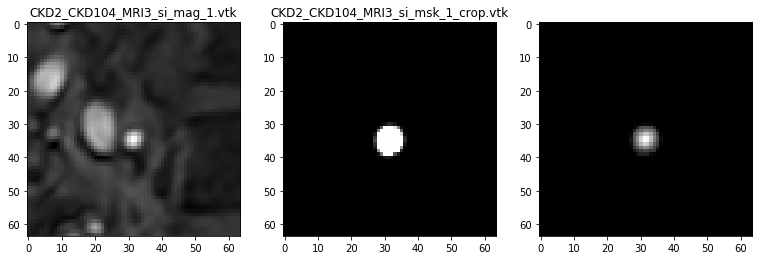

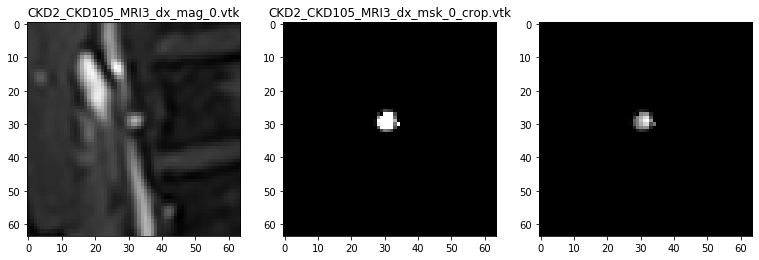

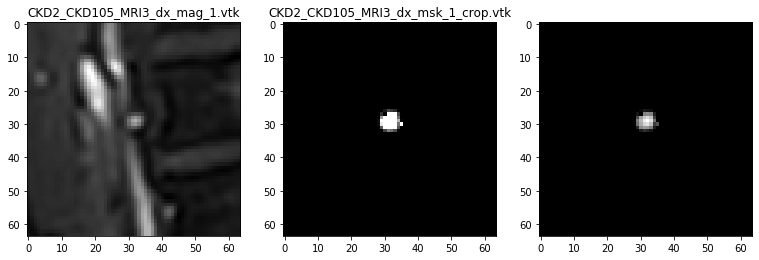

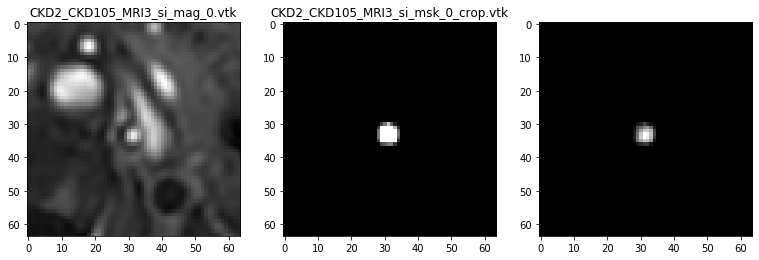

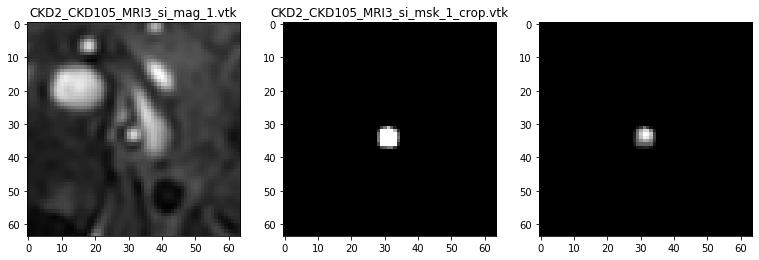

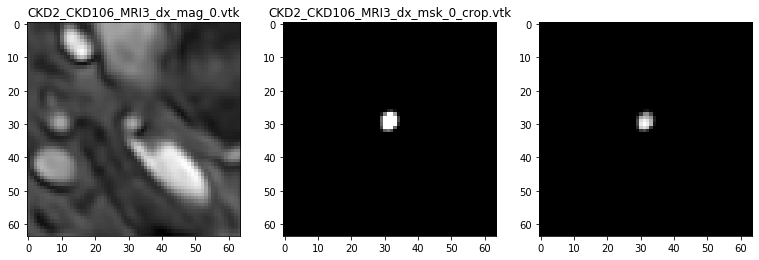

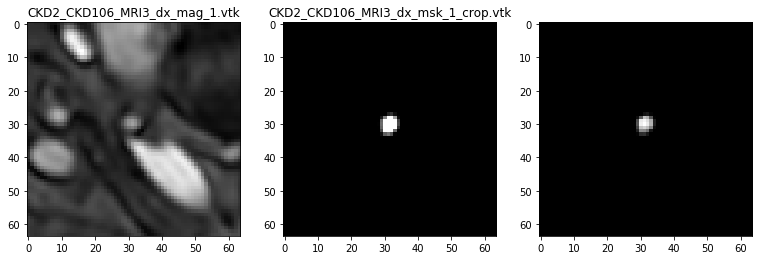

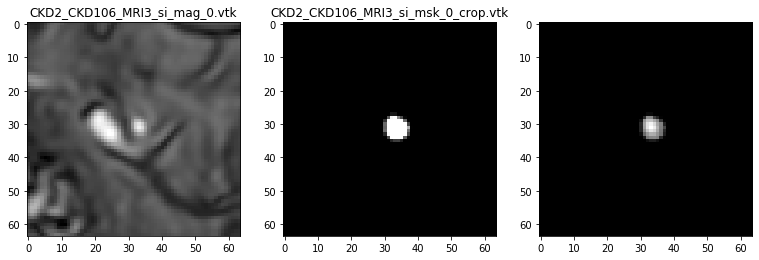

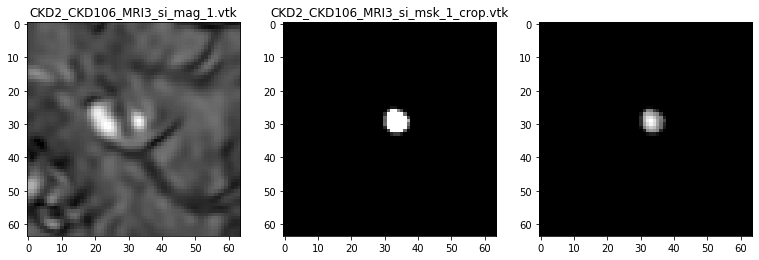

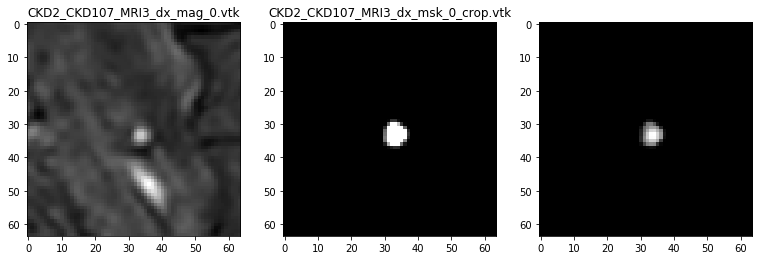

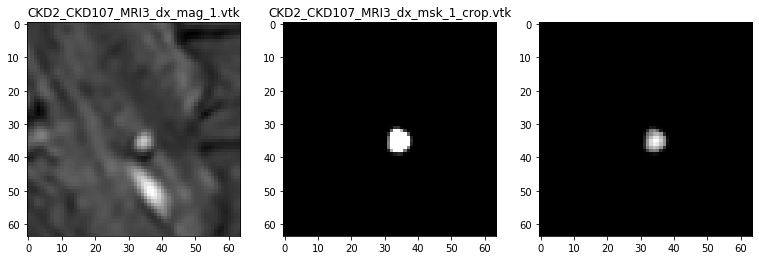

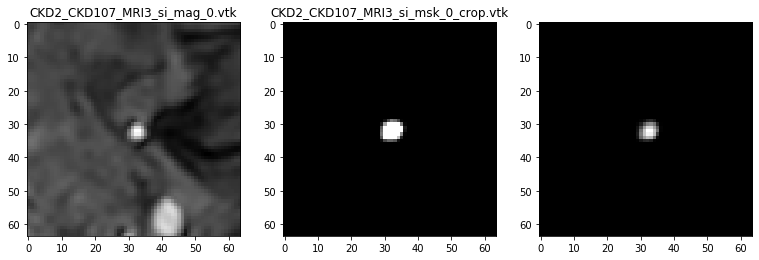

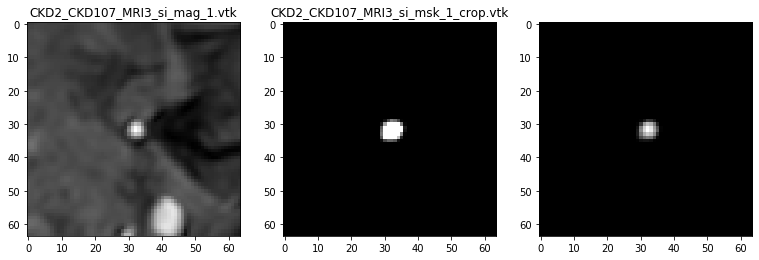

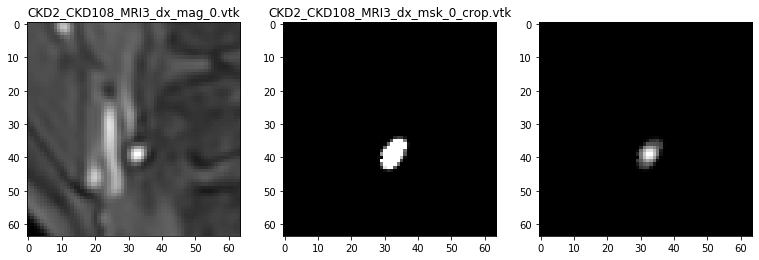

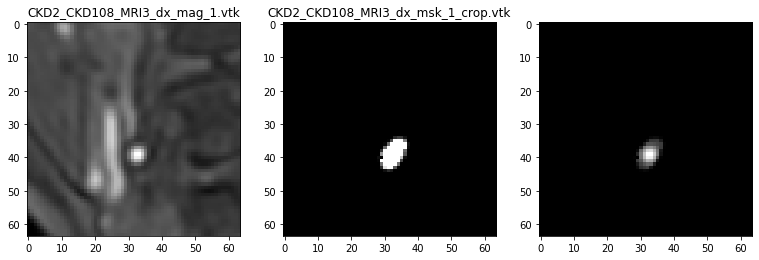

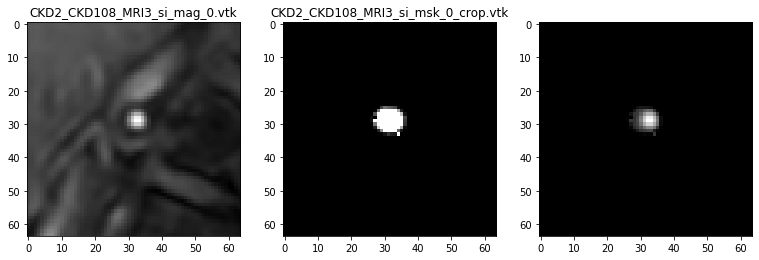

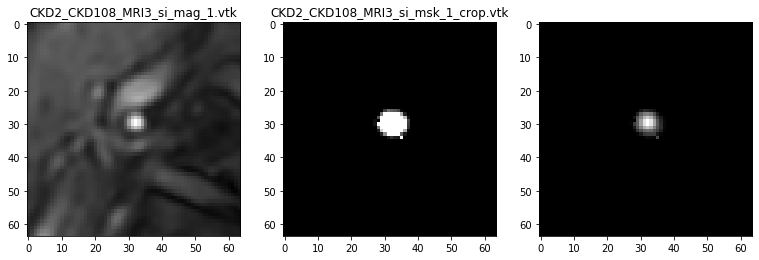

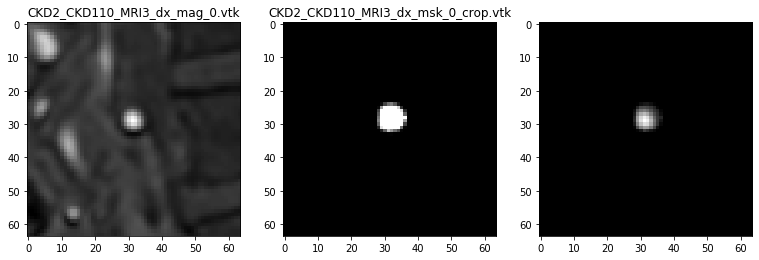

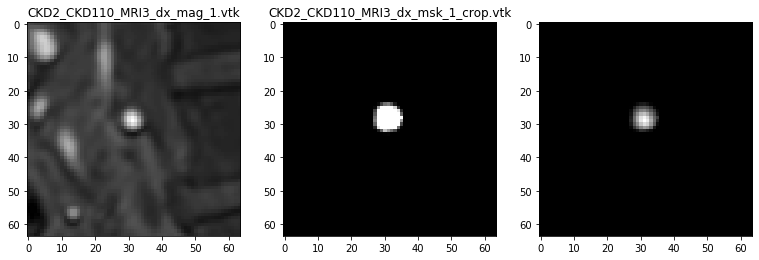

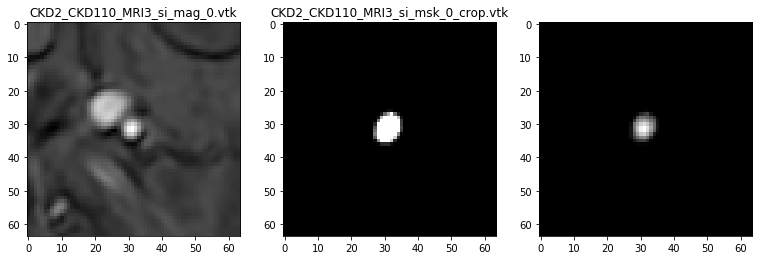

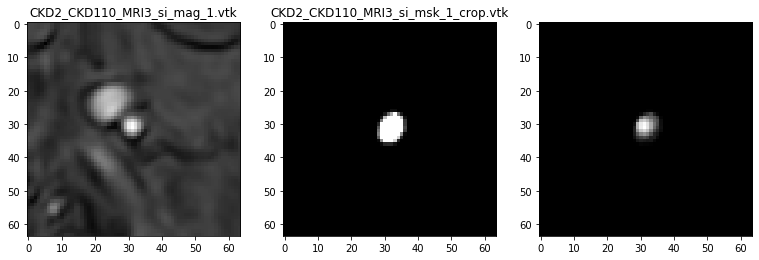

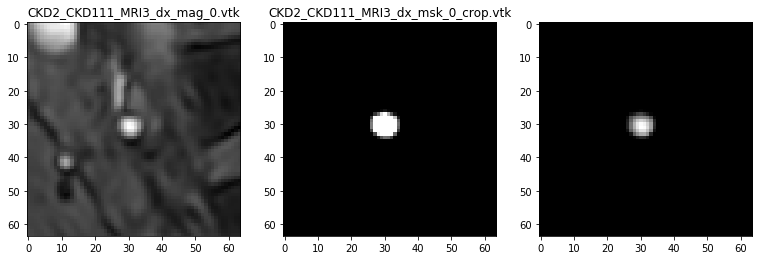

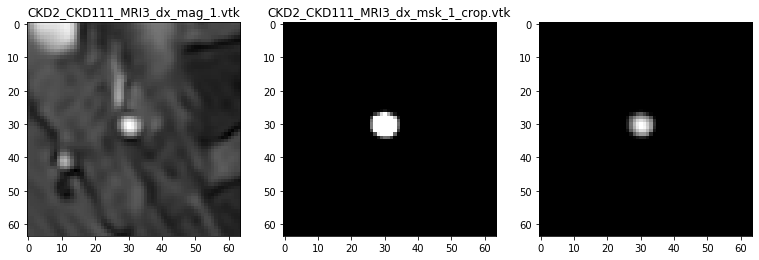

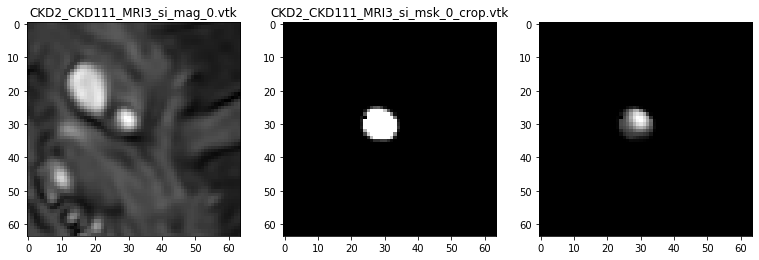

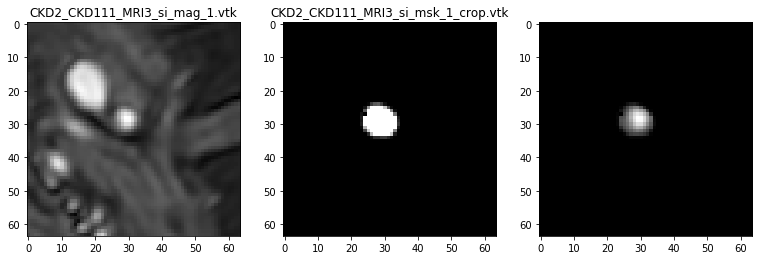

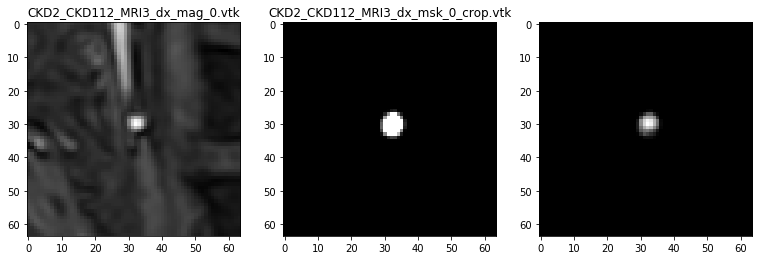

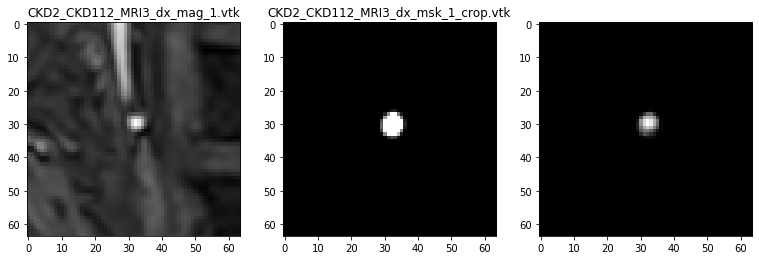

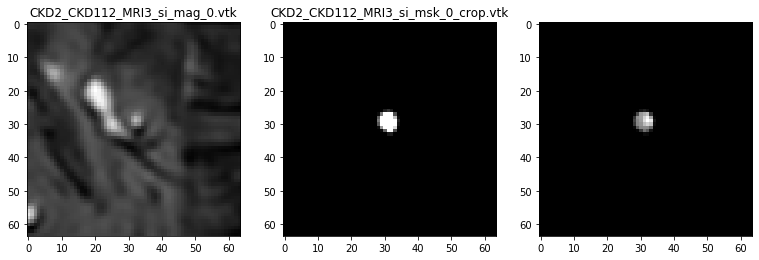

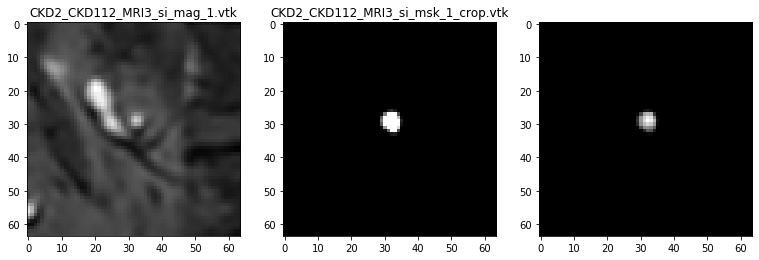

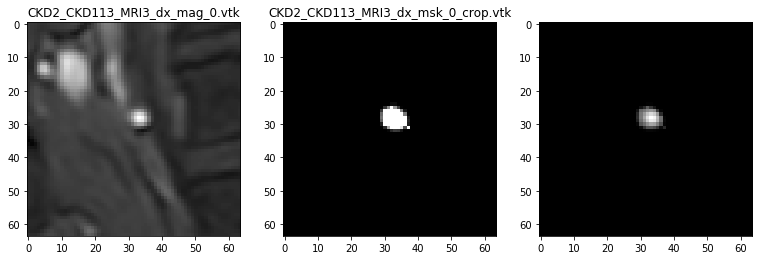

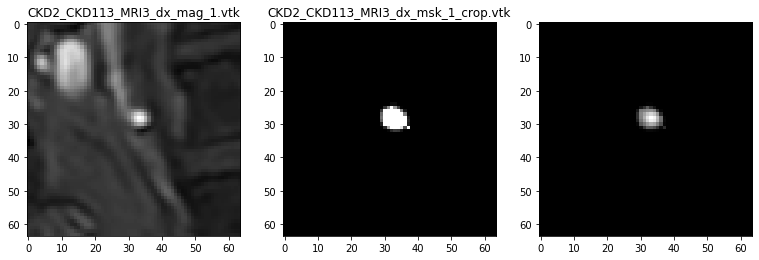

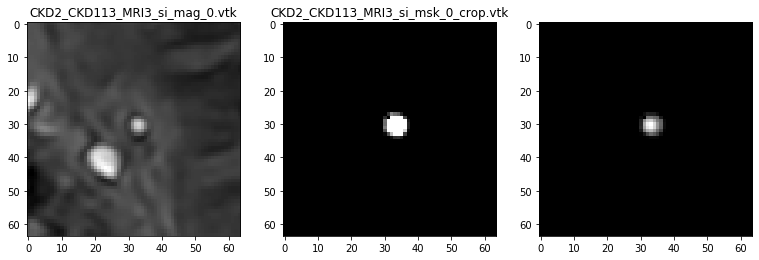

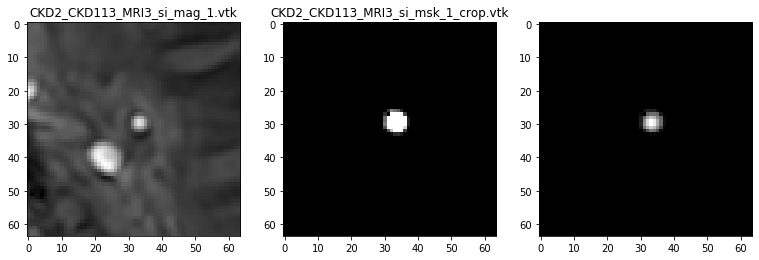

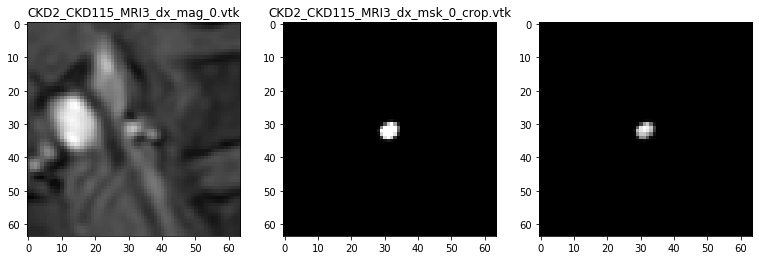

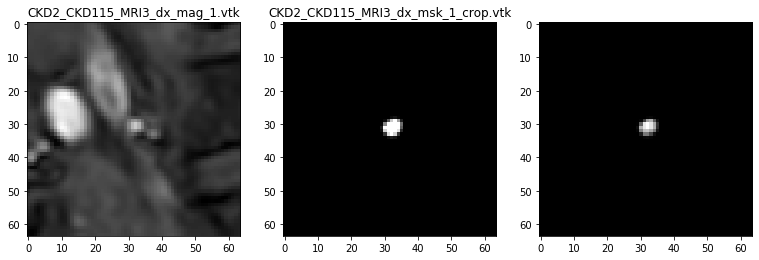

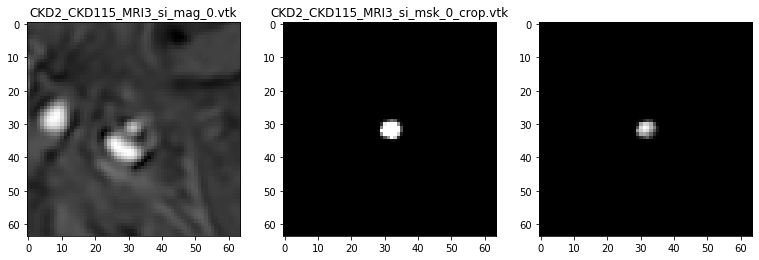

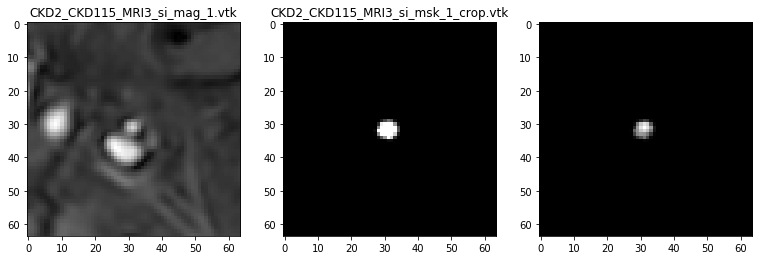

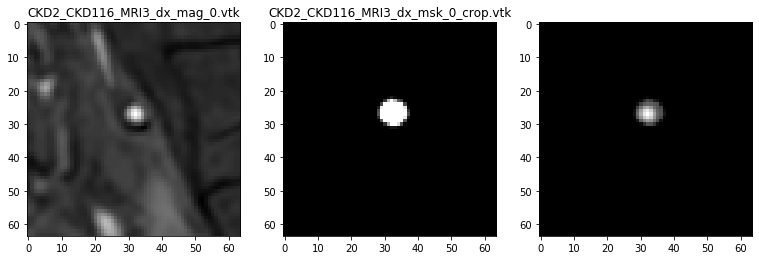

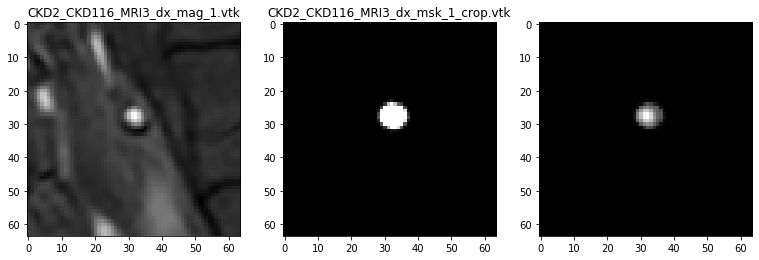

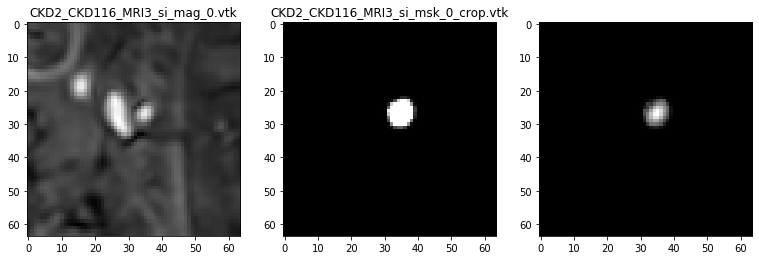

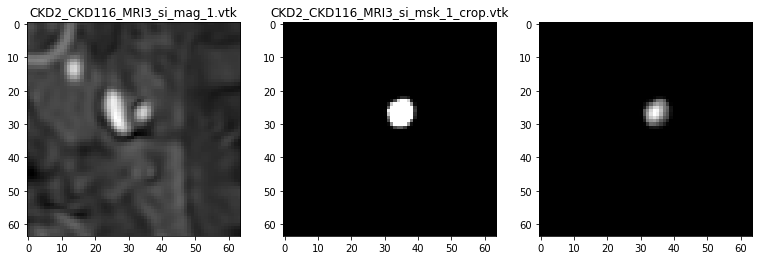

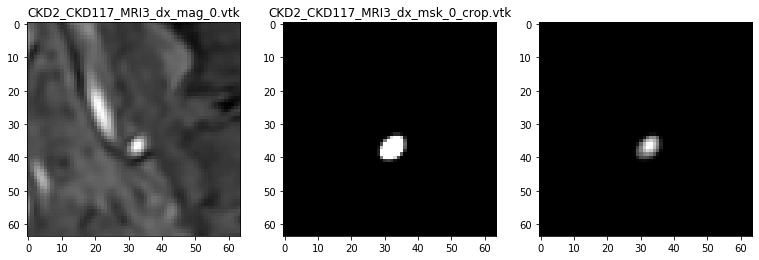

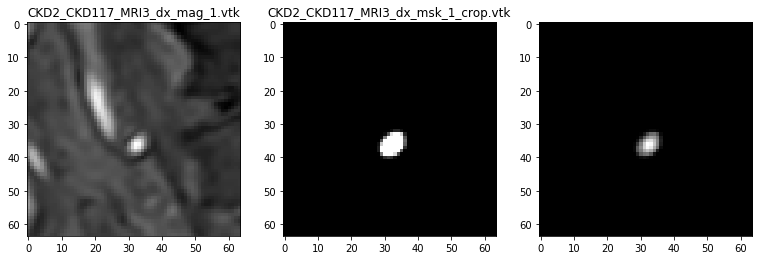

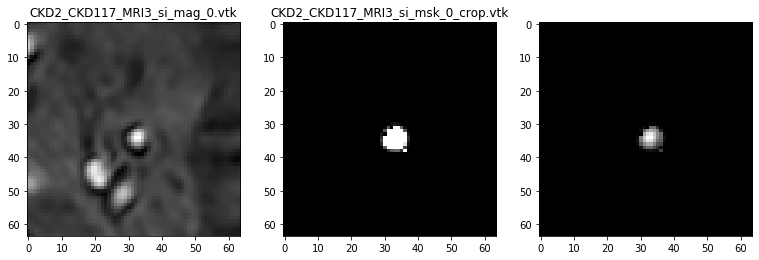

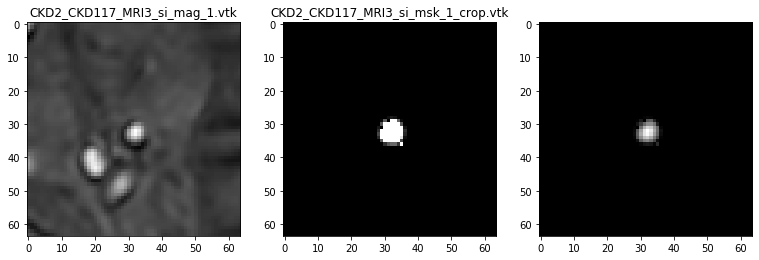

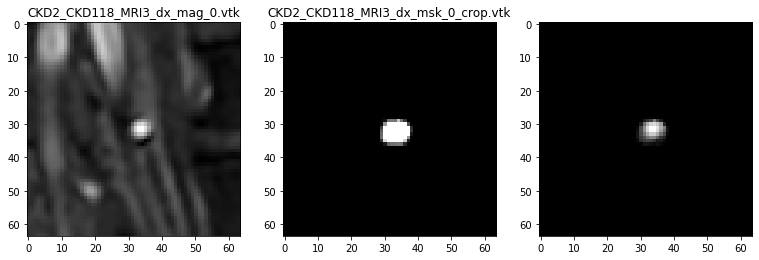

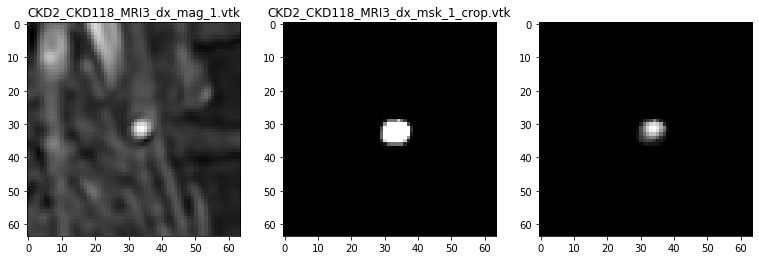

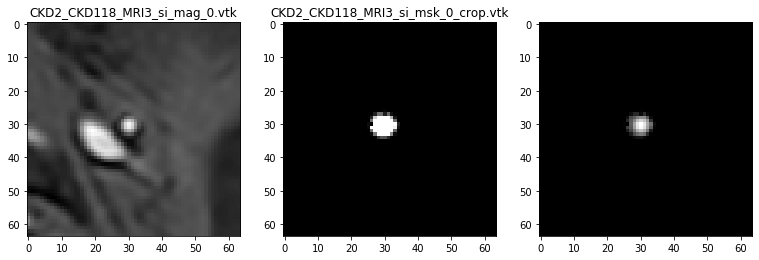

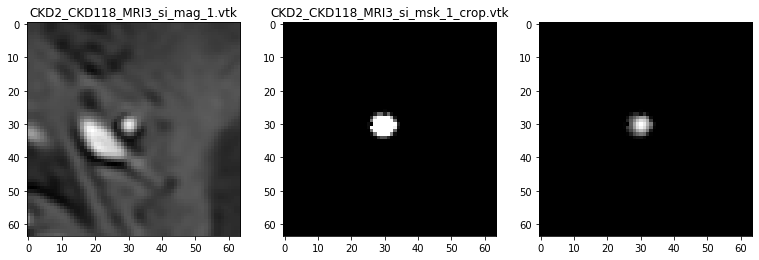

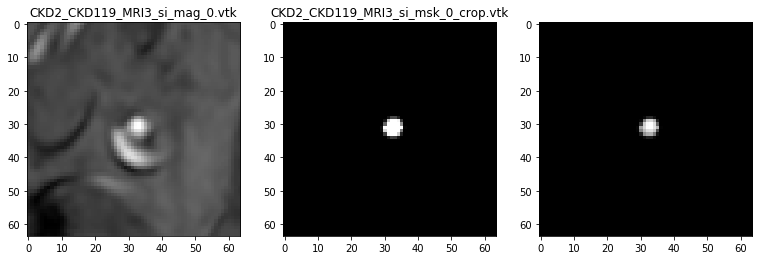

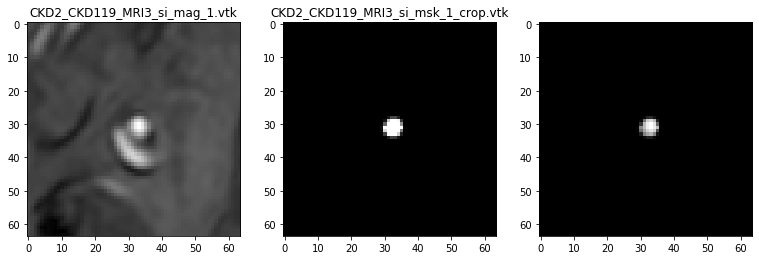

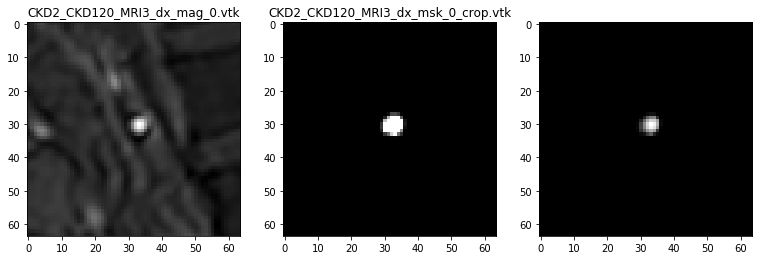

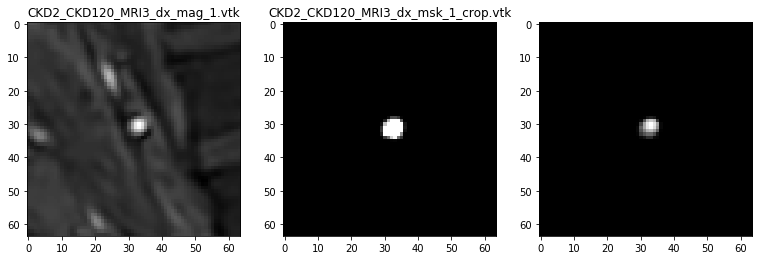

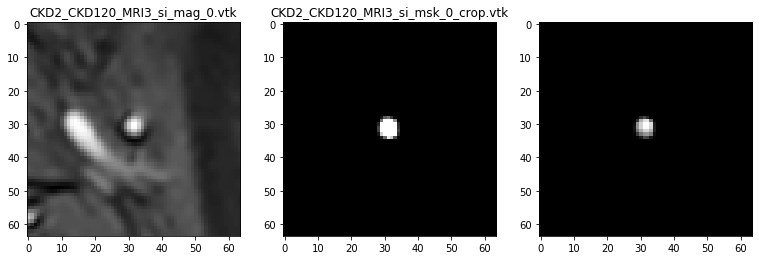

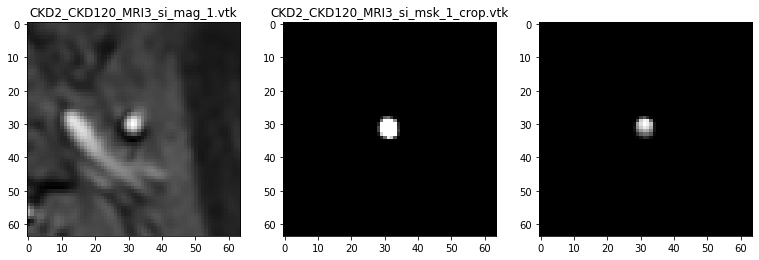

In [11]:
import matplotlib.pyplot as plt

import numpy as np

import vtk

import os

import sys

from vtk.util.numpy_support import numpy_to_vtk, vtk_to_numpy

import matplotlib.path as mplpath

from matContourToBinary import contour2mask

from flowInformation import FlowInfo


def readVTK(path, filename, order='F'):
                
    """
    Utility function to read vtk volume. 

    Params:

        - inherited from class (check at the beginning of the class)

        - path: path where VTK file is located

        - filename: VTK file name

    Returns:

        - numpy array

        - data origin

        - data spacing

    """

    reader = vtk.vtkStructuredPointsReader()

    reader.SetFileName(path + filename)

    reader.Update()

    image = reader.GetOutput()

    numpy_array = vtk_to_numpy(image.GetPointData().GetScalars())

    numpy_array = numpy_array.reshape(image.GetDimensions(),order='F')

    numpy_array = numpy_array.swapaxes(0,1)

    origin = list(image.GetOrigin())

    spacing = list(image.GetSpacing())

    return numpy_array, origin, spacing



def array2vtk(array, filename, dest_path, origin = [0,0,0], spacing = [1,1,1]):
                
    """
    Convert array into .vtk file

    - Params:

        inherited class parameters (see description at beginning of the class)

        array: array to be converted into .vtk file

        filename: filename with which to save array as VTK file

        origin: origin of coordinate system, by default (0,0,0)

        spacing: spacing of coordinate system, by default (1,1,1)

    """

    vtk_writer = vtk.vtkStructuredPointsWriter()


    # Check if destination folder exists

    #print('Checking if destination folder exists\n')

    isdir = os.path.isdir(dest_path)

    if not isdir:

        os.makedirs(dest_path)

        print('Non-existing destination path. Created\n')

    # Check if files already exist in destination folder

    exist = filename in os.listdir(dest_path)

    overwrite = 'y'

    if exist:

        overwrite = input("File is already in folder. Do you want to overwrite? [y/n]\n")

    if overwrite == 'y' or overwrite == 'Y':

        vtk_writer.SetFileName(dest_path + filename)

        vtk_im = vtk.vtkStructuredPoints()

        vtk_im.SetDimensions((array.shape[1],array.shape[0],array.shape[2]))

        vtk_im.SetOrigin(origin)

        vtk_im.SetSpacing(spacing)

        pdata = vtk_im.GetPointData()

        vtk_array = numpy_to_vtk(array.swapaxes(0,1).ravel(order='F'),deep = 1, array_type=vtk.VTK_FLOAT)

        pdata.SetScalars(vtk_array)

        vtk_writer.SetFileType(vtk.VTK_BINARY)

        vtk_writer.SetInputData(vtk_im)

        vtk_writer.Update()

        #print('VTK file saved successfully!\n')

    else:
        print('\nOperation aborted\n')
        
        
        
mask_folder = '/home/andres/Documents/_Data/CKD_Part2/Råden_Segm/NewSegmentations/'

mag_folder = '/home/andres/Documents/_Data/CKD_Part2/Råden_Segm/ReferenceMag/'


masks = sorted(os.listdir(mask_folder))


disp = [[2,0],[2,0],[3,1],[3,1],[-4,6],[-7,-2],[0,-2],[1,-3],[6,-3],[6,-3],[-2,-1],[-1,-1],[-2,-2],[-1,-1],[2,0],
        [2,0],[0,0],[0,0],[-3,-12],[-4,-12],[9,-5],[10,-4],[1,-4],[2,-4],[0,-2],[0,-2],[1,-3],[0,-2],[3,2],
        [1,1],[-1,-3],[-1,-2],[-1,0],[-1,0],[0,-2],[2,-2],[2,4],[2,4],[2,-3],[2,-3],[0,-1],[2,-1],[3,2],[2,1],
        [-3,-1],[-2,-1],[0,1],[1,0],[2,-1],[2,-1],[4,-1],[4,-1],[2,1],[3,1],[3,-3],[3,-2],[0,-1],[0,-1],[0,-1],
        [-1,-2],[4,2],[4,2],[4,1],[4,1],[0,0],[0,0],[2,-2],[2,-1],[-3,1],[-2,0],[2,-2],[1,-3],[1,0],[0,0],
        [1,-1],[2,-1],[1,-1],[2,-1],[0,0],[2,2],[-1,0],[0,0],[0,-1],[1,0],[0,0],[0,0],[-3,-2],[-3,-2],[-1,1],
        [-1,1],[0,0],[3,0],[0,-1],[-1,-1],[-1,-3],[0,-3],[3,2],[3,2],[-3,0],[-3,0],[-1,-1],[-2,0],[-2,1],
        [-3,0],[-2,4],[-2,4],[0,-2],[-1,-2],[1,-1],[2,-1],[0,0],[0,0],[0,2],[-2,3],[3,3],[3,3],[2,-3],[1,-3],
        [0,0],[0,0],[0,0],[0,0],[1,-2],[1,-2],[-3,-2],[-3,-2],[0,-1],[1,-1],[-2,1],[-1,1],[-2,-1],[-3,-1],
        [2,-2],[2,-1],[0,0],[1,-1],[2,-1],[4,1],[-1,-2],[3,-1],[-1,-4],[-1,-3],[1,-1],[2,-1],[-4,2],[-3,2],
        [-1,1],[-3,1],[1,2],[3,3],[0,0],[0,0],[6,0],[6,0],[-3,0],[-2,1],[-3,0],[-3,-1],[-2,-3],[-2,-2],[-1,-2],
        [-1,-2],[-3,-3],[-4,-3],[-3,2],[-3,2],[-2,-2],[-2,-1],[-2,1],[-2,1],[0,2],[-1,2],[1,3],[0,4],[0,0],
        [0,-1],[-6,2],[-5,2],[-5,2],[-5,2],[4,1],[3,1],[2,1],[0,0],[0,0],[0,0],[-1,-3],[-1,-3],[-1,-1],
        [-1,-1],[-1,-1],[0,-1],[0,0],[0,0]]


cont_mask = 0

for mask_file in masks:
    
    mask_array, origin, spacing = readVTK(mask_folder, mask_file)
    
    mag_file = mask_file.replace('msk','mag')
    
    mag_array, origin, spacing = readVTK(mag_folder, mag_file)
    
    new_mask = np.roll(mask_array, disp[cont_mask], (0,1))
    
    center = np.array(mask_array.shape)//2
    
    cropped_mask = new_mask[(center[0]-32):(center[0]+32), (center[1]-32):(center[1]+32),:]
    
    filename = mask_file.replace('.vtk','_crop.vtk')
    
    #array2vtk(cropped_mask, filename, mask_folder, origin, spacing)
    
    plt.figure(figsize = (13,5))
    
    plt.subplot(131)
    
    plt.imshow(mag_array[(center[0]-32):(center[0]+32), (center[1]-32):(center[1]+32),center[2]], cmap = 'gray'), plt.title(mag_file)
    
    plt.subplot(132)
    
    plt.imshow(cropped_mask[:,:,center[2]], cmap = 'gray'), plt.title(filename)
    
    plt.subplot(133)
    
    plt.imshow(cropped_mask[:,:,center[2]]*mag_array[(center[0]-32):(center[0]+32), (center[1]-32):(center[1]+32),center[2]], cmap = 'gray')
    
    cont_mask += 1
    